In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly
%matplotlib inline
import statsmodels.api as sm
import pylab
%matplotlib inline

In [2]:
delimiter = ','
max_columns = max(open('all.csv', 'r'), key = lambda x: x.count(delimiter)).count(delimiter)
y=pd.read_csv('all.csv', header = None, skiprows = 0, names = list(range(0,max_columns)))
y.columns=y.iloc[0]
y=y[1:]
y

0            Customer POS NO           PO NO Standard Destination  \
1      A.M.R INDUSTRY     62      SK2016/002      ECE    THAILAND   
2      A.M.R INDUSTRY     35    SK2016/001.1      ECE    THAILAND   
3      A.M.R INDUSTRY     35    SK2016/001.1      ECE    THAILAND   
4      A.M.R INDUSTRY     35    SK2016/001.1      ECE    THAILAND   
5      A.M.R INDUSTRY     35    SK2016/001.1      ECE    THAILAND   
...               ...    ...             ...      ...         ...   
10221   WINNER-MOTORS    039  01/2018 REV 02    E2205      BRAZIL   
10222   WINNER-MOTORS    039  01/2018 REV 02    E2205      BRAZIL   
10223   WINNER-MOTORS    039  01/2018 REV 02    E2205      BRAZIL   
10224   WINNER-MOTORS    039  01/2018 REV 02    E2205      BRAZIL   
10225   WINNER-MOTORS    039         01/2018    E2205      BRAZIL   

0               POS Receive Date POS Delivery Date Model/Type  \
1       Wednesday, 30 March 2016     08 April 2016     VANDAL   
2          Friday, 04 March 2016              ASAP       APEX   
3          Friday, 04 March 2016              ASAP       APEX   
4          Friday, 04 March 2016              ASAP       HALO   
5          Friday, 04 March 2016              ASAP       HALO   
...                          ...               ...        ...   
10221    Monday, 01 October 2018              ASAP        KIT   
10222    Monday, 01 October 2018              ASAP        KIT   
10223    Monday, 01 October 2018              ASAP        KIT   
10224    Monday, 01 October 2018              ASAP        KIT   
10225  Tuesday, 27 February 2018     01 March 2018        KIT   

0                           Description  XXS XS (48) XS/S S(50) M(52) L(54)  \
1                           SOLID WHITE  NaN     NaN  NaN     6     8     4   
2                       ROLLING THUNDER  NaN     NaN  NaN     1     3     2   
3                                   SAM  NaN     NaN  NaN     1     3     2   
4                          DRIFT YELLOW  NaN     NaN  NaN     2     3     2   
5                             DRIFT RED  NaN     NaN  NaN     2     3     2   
...                                 ...  ...     ...  ...   ...   ...   ...   
10221             SPEEDSTAR VISOR CLEAR  NaN     NaN  NaN   NaN   NaN   NaN   
10222               STELLAR VISOR CLEAR  NaN     NaN  NaN   NaN   NaN   NaN   
10223               STELLAR VISOR CLEAR  NaN     NaN  NaN   NaN   NaN   NaN   
10224             SPEEDSTAR VISOR CLEAR  NaN     NaN  NaN   NaN   NaN   NaN   
10225  SR SPORT VISOR RACING DARK SMOKE  NaN     NaN  NaN   NaN   NaN   NaN   

0     XL(56)  XXL  3XL  4XL  S/M L/XL Other  NaN  NaN  
1        NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  
2          1    1    1  NaN  NaN  NaN   NaN  NaN  NaN  
3          1    1    1  NaN  NaN  NaN   NaN  NaN  NaN  
4          1    1  NaN  NaN  NaN  NaN   NaN  NaN  NaN  
5          1    1  NaN  NaN  NaN  NaN   NaN  NaN  NaN  
...      ...  ...  ...  ...  ...  ...   ...  ...  ...  
10221    NaN  NaN  NaN  NaN  NaN  NaN    20  NaN  NaN  
10222    NaN  NaN  NaN  NaN  NaN  NaN    20  NaN  NaN  
10223    NaN  NaN  NaN  NaN  NaN  NaN    20  NaN  NaN  
10224    NaN  NaN  NaN  NaN  NaN  NaN    30  NaN  NaN  
10225    NaN  NaN  NaN  NaN  NaN  NaN    36  NaN  NaN  

[10225 rows x 24 columns]

In [3]:
y.columns

Index([         'Customer',            'POS NO',             'PO NO',
                'Standard',       'Destination',  'POS Receive Date',
       'POS Delivery Date',        'Model/Type',       'Description',
                     'XXS',           'XS (48)',              'XS/S',
                   'S(50)',             'M(52)',             'L(54)',
                  'XL(56)',               'XXL',               '3XL',
                     '4XL',               'S/M',              'L/XL',
                   'Other',                 nan,                 nan],
      dtype='object', name=0)

In [4]:
y.dropna(how='all',inplace=True)
y.dropna(how='all', axis=1,inplace=True)
y = y.reset_index(drop=True)
y.drop(['POS NO', 'PO NO', 'Description'], axis=1,inplace=True)

In [5]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10225 entries, 0 to 10224
Data columns (total 19 columns):
Customer             10225 non-null object
Standard             10096 non-null object
Destination          10225 non-null object
POS Receive Date     10225 non-null object
POS Delivery Date    10224 non-null object
Model/Type           10215 non-null object
XXS                  6 non-null object
XS (48)              1966 non-null object
XS/S                 2 non-null object
S(50)                3767 non-null object
M(52)                5493 non-null object
L(54)                6017 non-null object
XL(56)               4336 non-null object
XXL                  2477 non-null object
3XL                  86 non-null object
4XL                  13 non-null object
S/M                  254 non-null object
L/XL                 264 non-null object
Other                2965 non-null object
dtypes: object(19)
memory usage: 1.5+ MB


In [6]:
y[['XXS','XS (48)','XS/S','S(50)','M(52)','L(54)','XL(56)','XXL','3XL','4XL','S/M','L/XL','Other']]=y[['XXS','XS (48)','XS/S','S(50)','M(52)','L(54)','XL(56)','XXL','3XL','4XL','S/M','L/XL','Other']].fillna(0)

In [7]:
y

0            Customer Standard Destination           POS Receive Date  \
0      A.M.R INDUSTRY      ECE    THAILAND   Wednesday, 30 March 2016   
1      A.M.R INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
2      A.M.R INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
3      A.M.R INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
4      A.M.R INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
...               ...      ...         ...                        ...   
10220   WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10221   WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10222   WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10223   WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10224   WINNER-MOTORS    E2205      BRAZIL  Tuesday, 27 February 2018   

0     POS Delivery Date Model/Type XXS XS (48) XS/S S(50) M(52) L(54) XL(56)  \
0         08 April 2016     VANDAL   0       0    0     6     8     4      0   
1                  ASAP       APEX   0       0    0     1     3     2      1   
2                  ASAP       APEX   0       0    0     1     3     2      1   
3                  ASAP       HALO   0       0    0     2     3     2      1   
4                  ASAP       HALO   0       0    0     2     3     2      1   
...                 ...        ...  ..     ...  ...   ...   ...   ...    ...   
10220              ASAP        KIT   0       0    0     0     0     0      0   
10221              ASAP        KIT   0       0    0     0     0     0      0   
10222              ASAP        KIT   0       0    0     0     0     0      0   
10223              ASAP        KIT   0       0    0     0     0     0      0   
10224     01 March 2018        KIT   0       0    0     0     0     0      0   

0     XXL 3XL 4XL S/M L/XL Other  
0       0   0   0   0    0     0  
1       1   1   0   0    0     0  
2       1   1   0   0    0     0  
3       1   0   0   0    0     0  
4       1   0   0   0    0     0  
...    ..  ..  ..  ..  ...   ...  
10220   0   0   0   0    0    20  
10221   0   0   0   0    0    20  
10222   0   0   0   0    0    20  
10223   0   0   0   0    0    30  
10224   0   0   0   0    0    36  

[10225 rows x 19 columns]

In [8]:
y['XXS'] = pd.to_numeric(y['XXS'])
y['XS (48)'] = pd.to_numeric(y['XS (48)'])
y['XS/S'] = pd.to_numeric(y['XS/S'])
y['XXS'] = pd.to_numeric(y['XXS'])
y['S(50)'] = pd.to_numeric(y['S(50)'])
y['M(52)'] = pd.to_numeric(y['M(52)'])
y['L(54)'] = pd.to_numeric(y['L(54)'])
y['XL(56)'] = pd.to_numeric(y['XL(56)'])
y['XXL'] = pd.to_numeric(y['XXL'])
y['3XL'] = pd.to_numeric(y['3XL'])
y['4XL'] = pd.to_numeric(y['4XL'])
y['S/M'] = pd.to_numeric(y['S/M'])
y['L/XL'] = pd.to_numeric(y['L/XL'])
y['Other'] = pd.to_numeric(y['Other'])
y['Total Helmet']=y['XXS']+y['XS (48)']+y['XS/S']+y['S(50)']+y['M(52)']+y['L(54)']+y['XL(56)']+y['XXL']+y['3XL']+y['4XL']+y['S/M']+y['L/XL']

pro=y[(y['Other']==0) & (y['Total Helmet']>0) ]

In [9]:
tsaDesc = []
for i in pro.columns:
    tsaDesc.append([i, pro[i].dtypes, pro[i].isna().sum(), round((((pro[i].isna().sum())/(len(pro)))*100),2), 
                    pro[i].nunique()])
pd.DataFrame(tsaDesc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique'])

dataFeatures dataType  null  nullPct  unique
0            Customer   object     0     0.00      43
1            Standard   object   121     1.66      21
2         Destination   object     0     0.00      38
3    POS Receive Date   object     0     0.00     277
4   POS Delivery Date   object     0     0.00      83
5          Model/Type   object     0     0.00     281
6                 XXS    int64     0     0.00       3
7             XS (48)    int64     0     0.00      36
8                XS/S    int64     0     0.00       1
9               S(50)    int64     0     0.00      75
10              M(52)    int64     0     0.00      99
11              L(54)    int64     0     0.00     107
12             XL(56)    int64     0     0.00      66
13                XXL    int64     0     0.00      62
14                3XL    int64     0     0.00      13
15                4XL    int64     0     0.00       5
16                S/M    int64     0     0.00      41
17               L/XL    int64     0     0.00      25
18              Other    int64     0     0.00       1
19       Total Helmet    int64     0     0.00     188

In [10]:
pro.tail()

0           Customer Standard Destination           POS Receive Date  \
10189  WINNER-MOTORS    E2205      BRAZIL  Tuesday, 27 February 2018   
10190  WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10191  WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10192  WINNER-MOTORS    E2205      BRAZIL   Tuesday, 02 October 2018   
10193  WINNER-MOTORS    E2205      BRAZIL  Tuesday, 27 February 2018   

0     POS Delivery Date Model/Type  XXS  XS (48)  XS/S  S(50)  M(52)  L(54)  \
10189     01 March 2018   SR SPORT    0        0     0      2      4      0   
10190              ASAP   SR SPORT    0        0     0      4      2      0   
10191              ASAP   SR SPORT    0        0     0      2      4      0   
10192              ASAP   SR SPORT    0        0     0      4      2      0   
10193     01 March 2018   SR SPORT    0        0     0      0      0      0   

0      XL(56)  XXL  3XL  4XL  S/M  L/XL  Other  Total Helmet  
10189       0    0    0    0    0     0      0             6  
10190       0    0    0    0    0     0      0             6  
10191       0    0    0    0    0     0      0             6  
10192       0    0    0    0    0     0      0             6  
10193       0    0    3    0    0     0      0             3

In [11]:
pro

0            Customer Standard Destination           POS Receive Date  \
0      A.M.R INDUSTRY      ECE    THAILAND   Wednesday, 30 March 2016   
1      A.M.R INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
2      A.M.R INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
3      A.M.R INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
4      A.M.R INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
...               ...      ...         ...                        ...   
10189   WINNER-MOTORS    E2205      BRAZIL  Tuesday, 27 February 2018   
10190   WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10191   WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10192   WINNER-MOTORS    E2205      BRAZIL   Tuesday, 02 October 2018   
10193   WINNER-MOTORS    E2205      BRAZIL  Tuesday, 27 February 2018   

0     POS Delivery Date Model/Type  XXS  XS (48)  XS/S  S(50)  M(52)  L(54)  \
0         08 April 2016     VANDAL    0        0     0      6      8      4   
1                  ASAP       APEX    0        0     0      1      3      2   
2                  ASAP       APEX    0        0     0      1      3      2   
3                  ASAP       HALO    0        0     0      2      3      2   
4                  ASAP       HALO    0        0     0      2      3      2   
...                 ...        ...  ...      ...   ...    ...    ...    ...   
10189     01 March 2018   SR SPORT    0        0     0      2      4      0   
10190              ASAP   SR SPORT    0        0     0      4      2      0   
10191              ASAP   SR SPORT    0        0     0      2      4      0   
10192              ASAP   SR SPORT    0        0     0      4      2      0   
10193     01 March 2018   SR SPORT    0        0     0      0      0      0   

0      XL(56)  XXL  3XL  4XL  S/M  L/XL  Other  Total Helmet  
0           0    0    0    0    0     0      0            18  
1           1    1    1    0    0     0      0             9  
2           1    1    1    0    0     0      0             9  
3           1    1    0    0    0     0      0             9  
4           1    1    0    0    0     0      0             9  
...       ...  ...  ...  ...  ...   ...    ...           ...  
10189       0    0    0    0    0     0      0             6  
10190       0    0    0    0    0     0      0             6  
10191       0    0    0    0    0     0      0             6  
10192       0    0    0    0    0     0      0             6  
10193       0    0    3    0    0     0      0             3  

[7270 rows x 20 columns]

In [12]:
def chngcus(x):
    if x['Customer']=='I & K' or x['Customer']=='I & K ':
        x['Customer']='I&K'
    return x['Customer']
pro[['Customer']].apply(print,axis=1)
pro['Customer']=pro[['Customer']].apply(chngcus,axis=1)

def chngcus2(x):
    if x['Customer']=='A.M.R INDUSTRY' or x['Customer']=='AMR INDUSTRI':
        x['Customer']='AMR INDUSTRY'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus2,axis=1)

def chngcus4(x):
    if x['Customer']=='INFINITE SERV INTERNATIONAL' or x['Customer']=='INFINITE SERV':
        x['Customer']='INFINITE'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus4,axis=1)

0
Customer    A.M.R INDUSTRY
Name: 0, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 1, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 2, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 3, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 4, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 5, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 6, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 7, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 8, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 9, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 10, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 11, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 12, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 13, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 14, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 15, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 16, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 17, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 18, dtype: object
0
C

Name: 403, dtype: object
0
Customer    AMR INDUSTRY
Name: 404, dtype: object
0
Customer    AMR INDUSTRY
Name: 405, dtype: object
0
Customer    AMR INDUSTRY
Name: 406, dtype: object
0
Customer    AMR INDUSTRY
Name: 407, dtype: object
0
Customer    AMR INDUSTRY
Name: 408, dtype: object
0
Customer    AMR INDUSTRY
Name: 409, dtype: object
0
Customer    AMR INDUSTRY
Name: 410, dtype: object
0
Customer    AMR INDUSTRY
Name: 411, dtype: object
0
Customer    AMR INDUSTRY
Name: 412, dtype: object
0
Customer    AMR INDUSTRY
Name: 413, dtype: object
0
Customer    AMR INDUSTRY
Name: 414, dtype: object
0
Customer    AMR INDUSTRY
Name: 415, dtype: object
0
Customer    AMR INDUSTRY
Name: 416, dtype: object
0
Customer    AMR INDUSTRY
Name: 417, dtype: object
0
Customer    AMR INDUSTRY
Name: 418, dtype: object
0
Customer    AMR INDUSTRY
Name: 419, dtype: object
0
Customer    AMR INDUSTRY
Name: 420, dtype: object
0
Customer    AMR INDUSTRY
Name: 421, dtype: object
0
Customer    AMR INDUSTRY
Name: 422, d

0
Customer    I & K 
Name: 884, dtype: object
0
Customer    I & K 
Name: 885, dtype: object
0
Customer    I & K 
Name: 886, dtype: object
0
Customer    I & K 
Name: 887, dtype: object
0
Customer    I & K 
Name: 888, dtype: object
0
Customer    I & K 
Name: 889, dtype: object
0
Customer    I & K 
Name: 890, dtype: object
0
Customer    I & K 
Name: 891, dtype: object
0
Customer    I & K 
Name: 892, dtype: object
0
Customer    I & K 
Name: 893, dtype: object
0
Customer    I & K 
Name: 894, dtype: object
0
Customer    I & K 
Name: 895, dtype: object
0
Customer    I & K 
Name: 896, dtype: object
0
Customer    I & K 
Name: 897, dtype: object
0
Customer    I & K 
Name: 898, dtype: object
0
Customer    I & K 
Name: 899, dtype: object
0
Customer    I & K 
Name: 900, dtype: object
0
Customer    I & K 
Name: 901, dtype: object
0
Customer    I & K 
Name: 902, dtype: object
0
Customer    I & K 
Name: 903, dtype: object
0
Customer    I & K 
Name: 904, dtype: object
0
Customer    I & K 
Name: 905, dt

0
Customer    INFINITE SERV
Name: 1419, dtype: object
0
Customer    INFINITE SERV
Name: 1420, dtype: object
0
Customer    INFINITE SERV
Name: 1421, dtype: object
0
Customer    INFINITE SERV
Name: 1422, dtype: object
0
Customer    INFINITE SERV
Name: 1423, dtype: object
0
Customer    INFINITE SERV
Name: 1424, dtype: object
0
Customer    INFINITE SERV
Name: 1425, dtype: object
0
Customer    INFINITE SERV
Name: 1426, dtype: object
0
Customer    INFINITE SERV
Name: 1427, dtype: object
0
Customer    INFINITE SERV
Name: 1428, dtype: object
0
Customer    INFINITE SERV
Name: 1429, dtype: object
0
Customer    INFINITE SERV
Name: 1430, dtype: object
0
Customer    INFINITE SERV
Name: 1431, dtype: object
0
Customer    INFINITE SERV
Name: 1432, dtype: object
0
Customer    INFINITE SERV
Name: 1433, dtype: object
0
Customer    INFINITE SERV
Name: 1434, dtype: object
0
Customer    INFINITE SERV
Name: 1435, dtype: object
0
Customer    INFINITE SERV
Name: 1436, dtype: object
0
Customer    INFINITE SERV


0
Customer    INFINITE SERV INTERNATIONAL
Name: 1836, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1837, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1838, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1839, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1840, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1841, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1842, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1843, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1844, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1845, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1846, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1847, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1848, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1849, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 

Name: 2328, dtype: object
0
Customer    KINGSTAR
Name: 2329, dtype: object
0
Customer    KINGSTAR
Name: 2330, dtype: object
0
Customer    KINGSTAR
Name: 2331, dtype: object
0
Customer    KINGSTAR
Name: 2332, dtype: object
0
Customer    KINGSTAR
Name: 2333, dtype: object
0
Customer    KINGSTAR
Name: 2334, dtype: object
0
Customer    KINGSTAR
Name: 2335, dtype: object
0
Customer    KINGSTAR
Name: 2336, dtype: object
0
Customer    KINGSTAR
Name: 2337, dtype: object
0
Customer    KINGSTAR
Name: 2338, dtype: object
0
Customer    KINGSTAR
Name: 2339, dtype: object
0
Customer    KINGSTAR
Name: 2340, dtype: object
0
Customer    KINGSTAR
Name: 2341, dtype: object
0
Customer    KINGSTAR
Name: 2342, dtype: object
0
Customer    KINGSTAR
Name: 2343, dtype: object
0
Customer    KINGSTAR
Name: 2344, dtype: object
0
Customer    KINGSTAR
Name: 2345, dtype: object
0
Customer    KINGSTAR
Name: 2346, dtype: object
0
Customer    KINGSTAR
Name: 2347, dtype: object
0
Customer    KINGSTAR
Name: 2348, dtype: o

Name: 2720, dtype: object
0
Customer    KYT AUSTRALIAA
Name: 2721, dtype: object
0
Customer    KYT AUSTRALIAA
Name: 2722, dtype: object
0
Customer    KYT AUSTRALIAA
Name: 2723, dtype: object
0
Customer    KYT AUSTRALIAA
Name: 2724, dtype: object
0
Customer    KYT AUSTRALIAA
Name: 2725, dtype: object
0
Customer    KYT AUSTRALIAA
Name: 2726, dtype: object
0
Customer    KYT AUSTRALIAA
Name: 2727, dtype: object
0
Customer    KYT JAPAN
Name: 2728, dtype: object
0
Customer    KYT JAPAN
Name: 2729, dtype: object
0
Customer    KYT JAPAN
Name: 2730, dtype: object
0
Customer    KYT JAPAN
Name: 2731, dtype: object
0
Customer    KYT JAPAN
Name: 2732, dtype: object
0
Customer    KYT JAPAN
Name: 2733, dtype: object
0
Customer    KYT JAPAN
Name: 2734, dtype: object
0
Customer    KYT JAPAN
Name: 2735, dtype: object
0
Customer    KYT JAPAN
Name: 2736, dtype: object
0
Customer    KYT JAPAN
Name: 2737, dtype: object
0
Customer    KYT JAPAN
Name: 2738, dtype: object
0
Customer    KYT JAPAN
Name: 2739, dty

Name: 3228, dtype: object
0
Customer    MINGFENG
Name: 3229, dtype: object
0
Customer    MINGFENG
Name: 3230, dtype: object
0
Customer    MINGFENG
Name: 3231, dtype: object
0
Customer    MINGFENG
Name: 3232, dtype: object
0
Customer    MINGFENG
Name: 3233, dtype: object
0
Customer    MINGFENG
Name: 3234, dtype: object
0
Customer    MINGFENG
Name: 3235, dtype: object
0
Customer    MINGFENG
Name: 3236, dtype: object
0
Customer    MINGFENG
Name: 3237, dtype: object
0
Customer    MINGFENG
Name: 3238, dtype: object
0
Customer    MINGFENG
Name: 3239, dtype: object
0
Customer    MINGFENG
Name: 3240, dtype: object
0
Customer    MINGFENG
Name: 3241, dtype: object
0
Customer    MINGFENG
Name: 3242, dtype: object
0
Customer    MINGFENG
Name: 3243, dtype: object
0
Customer    MINGFENG
Name: 3244, dtype: object
0
Customer    MINGFENG
Name: 3245, dtype: object
0
Customer    MINGFENG
Name: 3246, dtype: object
0
Customer    MINGFENG
Name: 3247, dtype: object
0
Customer    MINGFENG
Name: 3248, dtype: o

Name: 4011, dtype: object
0
Customer    MKA
Name: 4012, dtype: object
0
Customer    MKA
Name: 4013, dtype: object
0
Customer    MKA
Name: 4014, dtype: object
0
Customer    MKA
Name: 4015, dtype: object
0
Customer    MKA
Name: 4016, dtype: object
0
Customer    MKA
Name: 4017, dtype: object
0
Customer    MKA
Name: 4018, dtype: object
0
Customer    MKA
Name: 4019, dtype: object
0
Customer    MKA
Name: 4020, dtype: object
0
Customer    MKA
Name: 4021, dtype: object
0
Customer    MKA
Name: 4022, dtype: object
0
Customer    MKA
Name: 4023, dtype: object
0
Customer    MKA
Name: 4024, dtype: object
0
Customer    MKA
Name: 4025, dtype: object
0
Customer    MKA
Name: 4026, dtype: object
0
Customer    MKA
Name: 4027, dtype: object
0
Customer    MKA
Name: 4028, dtype: object
0
Customer    MKA
Name: 4029, dtype: object
0
Customer    MKA
Name: 4030, dtype: object
0
Customer    MKA
Name: 4031, dtype: object
0
Customer    MKA
Name: 4032, dtype: object
0
Customer    MKA
Name: 4033, dtype: object
0
Cust

Name: 4380, dtype: object
0
Customer    MKA
Name: 4381, dtype: object
0
Customer    MKA
Name: 4382, dtype: object
0
Customer    MKA
Name: 4383, dtype: object
0
Customer    MKA
Name: 4384, dtype: object
0
Customer    MKA
Name: 4385, dtype: object
0
Customer    MKA
Name: 4386, dtype: object
0
Customer    MKA
Name: 4387, dtype: object
0
Customer    MKA
Name: 4388, dtype: object
0
Customer    MKA
Name: 4389, dtype: object
0
Customer    MKA
Name: 4390, dtype: object
0
Customer    MKA
Name: 4391, dtype: object
0
Customer    MKA
Name: 4392, dtype: object
0
Customer    MKA
Name: 4393, dtype: object
0
Customer    MKA
Name: 4394, dtype: object
0
Customer    MKA
Name: 4395, dtype: object
0
Customer    MKA
Name: 4396, dtype: object
0
Customer    MKA
Name: 4397, dtype: object
0
Customer    MKA
Name: 4398, dtype: object
0
Customer    MKA
Name: 4399, dtype: object
0
Customer    MKA
Name: 4400, dtype: object
0
Customer    MKA
Name: 4401, dtype: object
0
Customer    MKA
Name: 4402, dtype: object
0
Cust

Name: 4750, dtype: object
0
Customer    MKA
Name: 4751, dtype: object
0
Customer    MKA
Name: 4752, dtype: object
0
Customer    MKA
Name: 4753, dtype: object
0
Customer    MKA
Name: 4754, dtype: object
0
Customer    MKA
Name: 4755, dtype: object
0
Customer    MKA
Name: 4756, dtype: object
0
Customer    MKA
Name: 4757, dtype: object
0
Customer    MKA
Name: 4758, dtype: object
0
Customer    MKA
Name: 4759, dtype: object
0
Customer    MKA
Name: 4760, dtype: object
0
Customer    MKA
Name: 4761, dtype: object
0
Customer    MKA
Name: 4762, dtype: object
0
Customer    MKA
Name: 4763, dtype: object
0
Customer    MKA
Name: 4764, dtype: object
0
Customer    MKA
Name: 4765, dtype: object
0
Customer    MKA
Name: 4766, dtype: object
0
Customer    MKA
Name: 4767, dtype: object
0
Customer    MKA
Name: 4768, dtype: object
0
Customer    MKA
Name: 4769, dtype: object
0
Customer    MKA
Name: 4770, dtype: object
0
Customer    MKA
Name: 4771, dtype: object
0
Customer    MKA
Name: 4772, dtype: object
0
Cust

Name: 5096, dtype: object
0
Customer    MKA
Name: 5097, dtype: object
0
Customer    MKA
Name: 5098, dtype: object
0
Customer    MKA
Name: 5099, dtype: object
0
Customer    MKA
Name: 5100, dtype: object
0
Customer    MKA
Name: 5101, dtype: object
0
Customer    MKA
Name: 5102, dtype: object
0
Customer    MKA
Name: 5103, dtype: object
0
Customer    MKA
Name: 5104, dtype: object
0
Customer    MKA
Name: 5105, dtype: object
0
Customer    MKA
Name: 5106, dtype: object
0
Customer    MKA
Name: 5107, dtype: object
0
Customer    MKA
Name: 5108, dtype: object
0
Customer    MKA
Name: 5109, dtype: object
0
Customer    MKA
Name: 5110, dtype: object
0
Customer    MKA
Name: 5111, dtype: object
0
Customer    MKA
Name: 5112, dtype: object
0
Customer    MKA
Name: 5113, dtype: object
0
Customer    MKA
Name: 5114, dtype: object
0
Customer    MKA
Name: 5115, dtype: object
0
Customer    MKA
Name: 5116, dtype: object
0
Customer    MKA
Name: 5117, dtype: object
0
Customer    MKA
Name: 5118, dtype: object
0
Cust

Name: 5738, dtype: object
0
Customer    OZONE
Name: 5739, dtype: object
0
Customer    OZONE
Name: 5740, dtype: object
0
Customer    OZONE
Name: 5741, dtype: object
0
Customer    OZONE
Name: 5742, dtype: object
0
Customer    OZONE
Name: 5743, dtype: object
0
Customer    OZONE
Name: 5744, dtype: object
0
Customer    OZONE
Name: 5745, dtype: object
0
Customer    OZONE
Name: 5746, dtype: object
0
Customer    OZONE
Name: 5747, dtype: object
0
Customer    OZONE
Name: 5748, dtype: object
0
Customer    OZONE
Name: 5749, dtype: object
0
Customer    OZONE
Name: 5750, dtype: object
0
Customer    OZONE
Name: 5751, dtype: object
0
Customer    OZONE
Name: 5752, dtype: object
0
Customer    OZONE
Name: 5753, dtype: object
0
Customer    OZONE
Name: 5754, dtype: object
0
Customer    OZONE
Name: 5755, dtype: object
0
Customer    OZONE
Name: 5756, dtype: object
0
Customer    OZONE
Name: 5757, dtype: object
0
Customer    OZONE
Name: 5758, dtype: object
0
Customer    OZONE
Name: 5759, dtype: object
0
Custom

Name: 6174, dtype: object
0
Customer    SUOMY
Name: 6175, dtype: object
0
Customer    SUOMY
Name: 6176, dtype: object
0
Customer    SUOMY
Name: 6177, dtype: object
0
Customer    SUOMY
Name: 6178, dtype: object
0
Customer    SUOMY
Name: 6179, dtype: object
0
Customer    SUOMY
Name: 6180, dtype: object
0
Customer    SUOMY
Name: 6181, dtype: object
0
Customer    SUOMY
Name: 6182, dtype: object
0
Customer    SUOMY
Name: 6183, dtype: object
0
Customer    SUOMY
Name: 6184, dtype: object
0
Customer    SUOMY
Name: 6185, dtype: object
0
Customer    SUOMY
Name: 6186, dtype: object
0
Customer    SUOMY
Name: 6187, dtype: object
0
Customer    SUOMY
Name: 6188, dtype: object
0
Customer    SUOMY
Name: 6189, dtype: object
0
Customer    SUOMY
Name: 6190, dtype: object
0
Customer    SUOMY
Name: 6191, dtype: object
0
Customer    SUOMY
Name: 6192, dtype: object
0
Customer    SUOMY
Name: 6193, dtype: object
0
Customer    SUOMY
Name: 6194, dtype: object
0
Customer    SUOMY
Name: 6195, dtype: object
0
Custom

Name: 6546, dtype: object
0
Customer    SUOMY
Name: 6547, dtype: object
0
Customer    SUOMY
Name: 6548, dtype: object
0
Customer    SUOMY
Name: 6549, dtype: object
0
Customer    SUOMY
Name: 6550, dtype: object
0
Customer    SUOMY
Name: 6551, dtype: object
0
Customer    SUOMY
Name: 6552, dtype: object
0
Customer    SUOMY
Name: 6553, dtype: object
0
Customer    SUOMY
Name: 6554, dtype: object
0
Customer    SUOMY
Name: 6555, dtype: object
0
Customer    SUOMY
Name: 6556, dtype: object
0
Customer    SUOMY
Name: 6557, dtype: object
0
Customer    SUOMY
Name: 6558, dtype: object
0
Customer    SUOMY
Name: 6559, dtype: object
0
Customer    SUOMY
Name: 6560, dtype: object
0
Customer    SUOMY
Name: 6561, dtype: object
0
Customer    SUOMY
Name: 6562, dtype: object
0
Customer    SUOMY
Name: 6563, dtype: object
0
Customer    SUOMY
Name: 6564, dtype: object
0
Customer    SUOMY
Name: 6565, dtype: object
0
Customer    SUOMY
Name: 6566, dtype: object
0
Customer    SUOMY
Name: 6567, dtype: object
0
Custom

Name: 6968, dtype: object
0
Customer    SUOMY
Name: 6969, dtype: object
0
Customer    SUOMY
Name: 6970, dtype: object
0
Customer    SUOMY
Name: 6971, dtype: object
0
Customer    SUOMY
Name: 6972, dtype: object
0
Customer    SUOMY
Name: 6973, dtype: object
0
Customer    SUOMY
Name: 6974, dtype: object
0
Customer    SUOMY
Name: 6975, dtype: object
0
Customer    SUOMY
Name: 6976, dtype: object
0
Customer    SUOMY
Name: 6977, dtype: object
0
Customer    SUOMY
Name: 6978, dtype: object
0
Customer    SUOMY
Name: 6979, dtype: object
0
Customer    SUOMY
Name: 6980, dtype: object
0
Customer    SUOMY
Name: 6981, dtype: object
0
Customer    SUOMY
Name: 6982, dtype: object
0
Customer    SUOMY
Name: 6983, dtype: object
0
Customer    SUOMY
Name: 6984, dtype: object
0
Customer    SUOMY
Name: 6985, dtype: object
0
Customer    SUOMY
Name: 6986, dtype: object
0
Customer    SUOMY
Name: 6987, dtype: object
0
Customer    SUOMY
Name: 6988, dtype: object
0
Customer    SUOMY
Name: 6989, dtype: object
0
Custom

Name: 7316, dtype: object
0
Customer    SUOMY
Name: 7317, dtype: object
0
Customer    SUOMY
Name: 7318, dtype: object
0
Customer    SUOMY
Name: 7319, dtype: object
0
Customer    SUOMY
Name: 7320, dtype: object
0
Customer    SUOMY
Name: 7321, dtype: object
0
Customer    SUOMY
Name: 7322, dtype: object
0
Customer    SUOMY
Name: 7323, dtype: object
0
Customer    SUOMY
Name: 7324, dtype: object
0
Customer    SUOMY
Name: 7325, dtype: object
0
Customer    SUOMY
Name: 7326, dtype: object
0
Customer    SUOMY
Name: 7327, dtype: object
0
Customer    SUOMY
Name: 7328, dtype: object
0
Customer    SUOMY
Name: 7329, dtype: object
0
Customer    SUOMY
Name: 7330, dtype: object
0
Customer    SUOMY
Name: 7331, dtype: object
0
Customer    SUOMY
Name: 7332, dtype: object
0
Customer    SUOMY
Name: 7333, dtype: object
0
Customer    SUOMY
Name: 7334, dtype: object
0
Customer    SUOMY
Name: 7335, dtype: object
0
Customer    SUOMY
Name: 7336, dtype: object
0
Customer    SUOMY
Name: 7337, dtype: object
0
Custom

Name: 8317, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8318, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8319, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8320, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8321, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8322, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8323, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8324, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8325, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8326, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8327, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8328, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8329, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8330, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8331, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8332, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8333, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8334, dtype: object
0
Customer    SUOMY MO

Name: 8695, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8696, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8697, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8698, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8699, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8700, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8701, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8702, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8703, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8704, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8705, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8706, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8707, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8708, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8709, dtype: object
0
Customer    SUOMY-MKA
Name: 9510, dtype: object
0
Customer    SUOMY-MKA
Name: 9511, dtype: object
0
Customer    SUOMY-MKA
Name: 9512, dtype: object
0
Customer    SUOMY-MKA
Name: 9513, dtyp

Name: 9920, dtype: object
0
Customer    TOC
Name: 9921, dtype: object
0
Customer    TOC
Name: 9922, dtype: object
0
Customer    TOC
Name: 9923, dtype: object
0
Customer    TOC
Name: 9924, dtype: object
0
Customer    TOC
Name: 9925, dtype: object
0
Customer    TOC
Name: 9926, dtype: object
0
Customer    TOC
Name: 9927, dtype: object
0
Customer    TOC
Name: 9928, dtype: object
0
Customer    TOC
Name: 9929, dtype: object
0
Customer    TOC
Name: 9930, dtype: object
0
Customer    TOC
Name: 9931, dtype: object
0
Customer    TOC
Name: 9932, dtype: object
0
Customer    TOC
Name: 9933, dtype: object
0
Customer    TOC
Name: 9934, dtype: object
0
Customer    TOC
Name: 9935, dtype: object
0
Customer    TOC
Name: 9936, dtype: object
0
Customer    TOC
Name: 9937, dtype: object
0
Customer    TOC
Name: 9938, dtype: object
0
Customer    TOC
Name: 9939, dtype: object
0
Customer    TOC
Name: 9940, dtype: object
0
Customer    TOC
Name: 9941, dtype: object
0
Customer    TOC
Name: 9942, dtype: object
0
Cust

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

In [13]:
def chngcus5(x):
    if x['Customer']=='J&J TRANDING CO LTD':
        x['Customer']='J&J TRADING CO LTD'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus5,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
def chngcus6(x):
    if x['Customer']=='KINGSTAR ':
        x['Customer']='KINGSTAR'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus6,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
def chngcus8(x):
    if x['Customer']=='MKA ':
        x['Customer']='MKA'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus8,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
def chngcus10(x):
    if x['Customer']=='TEN 10 RACING INDIA PVL LTD':
        x['Customer']='TEN 10'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus10,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
def chngcus11(x):
    if x['Customer']=='THE ONE CORP' or x['Customer']=='THE ONE CORP.' or x['Customer']=='TOC':
        x['Customer']='THE ONE CORP (TOC)'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus11,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
pro['Customer'].unique()

array(['AMR INDUSTRY', 'AGV', 'ALPINESTAR', 'ARGENTINA', 'FORTUNE',
       'FORTUNE INCORPORATED', 'I&K', 'I&N INTERNATIONAL', 'INFINITE',
       'J CLUB', 'J&J TRADING CO LTD', 'KINGSTAR', 'KYT AUSTRALIAA',
       'KYT JAPAN', 'MINGFENG', 'MKA', 'OZONE', 'PU', 'SINGAPORE',
       'SUMAY', 'SUOMY', 'SUOMY MOTOSPORT', 'SUOMY Motosport',
       'SUOMY-MKA', 'TEN  10', 'TEN 10', 'THE ONE CORP (TOC)',
       'TOP STRONG', 'TOPSTRONG', 'TORPEDO 7', 'WINNER-MOTORS'],
      dtype=object)

In [19]:
def chngcus12(x):
    if x['Customer']=='FORTUNE INCORPORATED':
        x['Customer']='FORTUNE'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus12,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
def chngcus13(x):
    if x['Customer']=='KYT AUSTRALIAA':
        x['Customer']='KYT AUSTRALIA'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus13,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
def chngcus14(x):
    if x['Customer']=='SUOMY Motosport':
        x['Customer']='SUOMY MOTOSPORT'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus14,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
def chngcus15(x):
    if x['Customer']=='TEN  10':
        x['Customer']='TEN 10'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus15,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
def chngcus16(x):
    if x['Customer']=='TOPSTRONG':
        x['Customer']='TOP STRONG'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus16,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
pro['Customer'].unique()

array(['AMR INDUSTRY', 'AGV', 'ALPINESTAR', 'ARGENTINA', 'FORTUNE', 'I&K',
       'I&N INTERNATIONAL', 'INFINITE', 'J CLUB', 'J&J TRADING CO LTD',
       'KINGSTAR', 'KYT AUSTRALIA', 'KYT JAPAN', 'MINGFENG', 'MKA',
       'OZONE', 'PU', 'SINGAPORE', 'SUMAY', 'SUOMY', 'SUOMY MOTOSPORT',
       'SUOMY-MKA', 'TEN 10', 'THE ONE CORP (TOC)', 'TOP STRONG',
       'TORPEDO 7', 'WINNER-MOTORS'], dtype=object)

In [25]:
pro['Customer'].value_counts()

MKA                   1527
SUOMY                 1338
SUOMY MOTOSPORT        730
INFINITE               602
I&K                    436
OZONE                  401
KINGSTAR               342
AMR INDUSTRY           330
THE ONE CORP (TOC)     329
KYT JAPAN              235
J&J TRADING CO LTD     203
MINGFENG               160
FORTUNE                124
TEN 10                 108
WINNER-MOTORS          102
PU                      59
ARGENTINA               51
KYT AUSTRALIA           39
SUOMY-MKA               30
ALPINESTAR              29
TOP STRONG              27
J CLUB                  25
SUMAY                   15
SINGAPORE               13
I&N INTERNATIONAL        8
TORPEDO 7                5
AGV                      2
Name: Customer, dtype: int64

In [26]:
pro

0           Customer Standard Destination           POS Receive Date  \
0       AMR INDUSTRY      ECE    THAILAND   Wednesday, 30 March 2016   
1       AMR INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
2       AMR INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
3       AMR INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
4       AMR INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
...              ...      ...         ...                        ...   
10189  WINNER-MOTORS    E2205      BRAZIL  Tuesday, 27 February 2018   
10190  WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10191  WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10192  WINNER-MOTORS    E2205      BRAZIL   Tuesday, 02 October 2018   
10193  WINNER-MOTORS    E2205      BRAZIL  Tuesday, 27 February 2018   

0     POS Delivery Date Model/Type  XXS  XS (48)  XS/S  S(50)  M(52)  L(54)  \
0         08 April 2016     VANDAL    0        0     0      6      8      4   
1                  ASAP       APEX    0        0     0      1      3      2   
2                  ASAP       APEX    0        0     0      1      3      2   
3                  ASAP       HALO    0        0     0      2      3      2   
4                  ASAP       HALO    0        0     0      2      3      2   
...                 ...        ...  ...      ...   ...    ...    ...    ...   
10189     01 March 2018   SR SPORT    0        0     0      2      4      0   
10190              ASAP   SR SPORT    0        0     0      4      2      0   
10191              ASAP   SR SPORT    0        0     0      2      4      0   
10192              ASAP   SR SPORT    0        0     0      4      2      0   
10193     01 March 2018   SR SPORT    0        0     0      0      0      0   

0      XL(56)  XXL  3XL  4XL  S/M  L/XL  Other  Total Helmet  
0           0    0    0    0    0     0      0            18  
1           1    1    1    0    0     0      0             9  
2           1    1    1    0    0     0      0             9  
3           1    1    0    0    0     0      0             9  
4           1    1    0    0    0     0      0             9  
...       ...  ...  ...  ...  ...   ...    ...           ...  
10189       0    0    0    0    0     0      0             6  
10190       0    0    0    0    0     0      0             6  
10191       0    0    0    0    0     0      0             6  
10192       0    0    0    0    0     0      0             6  
10193       0    0    3    0    0     0      0             3  

[7270 rows x 20 columns]

# Destination Data Cleaning

In [27]:
pro['Destination'].unique()

array(['THAILAND', 'ITALY', 'TAHILAND', 'ARGENTINA', 'PHILIPPINES',
       'PHILIPPINA', 'KOREA', 'PHILIPINA', 'PHILIPPPINES', 'PHILIPPNES',
       'CHINA', 'SHANGHAI', 'AUSTRALIA', 'JAPAN', 'AUSTALIA', 'TAIWAN',
       'TAIWAN ', 'MLAYSIA', 'MALAYSIA', 'VIETNAM', 'SINGAPORE',
       'SINGAPURA', 'OZONE ', 'OZONE-ITALY', 'OZONE', 'AMERICA', 'USA',
       'USA REV1', 'AMERIKA VANLEUWEN', 'AMERIKA', 'SUOMY-ITALY',
       'VAN LW', 'SUOMY', 'SUOMY ITALY', 'VAN LEEUWEN', 'INDIA',
       'NEW ZEALAND', 'BRAZIL'], dtype=object)

In [28]:
def dest(a):
    if a['Destination']=='TAHILAND':
        a['Destination']='THAILAND'
    return a['Destination']
pro[['Destination']].apply(print,axis=1)
pro['Destination']=pro[['Destination']].apply(dest,axis=1)

0
Destination    THAILAND
Name: 0, dtype: object
0
Destination    THAILAND
Name: 1, dtype: object
0
Destination    THAILAND
Name: 2, dtype: object
0
Destination    THAILAND
Name: 3, dtype: object
0
Destination    THAILAND
Name: 4, dtype: object
0
Destination    THAILAND
Name: 5, dtype: object
0
Destination    THAILAND
Name: 6, dtype: object
0
Destination    THAILAND
Name: 7, dtype: object
0
Destination    THAILAND
Name: 8, dtype: object
0
Destination    THAILAND
Name: 9, dtype: object
0
Destination    THAILAND
Name: 10, dtype: object
0
Destination    THAILAND
Name: 11, dtype: object
0
Destination    THAILAND
Name: 12, dtype: object
0
Destination    THAILAND
Name: 13, dtype: object
0
Destination    THAILAND
Name: 14, dtype: object
0
Destination    THAILAND
Name: 15, dtype: object
0
Destination    THAILAND
Name: 16, dtype: object
0
Destination    THAILAND
Name: 17, dtype: object
0
Destination    THAILAND
Name: 18, dtype: object
0
Destination    THAILAND
Name: 19, dtype: object
0
Destinat

Name: 389, dtype: object
0
Destination    THAILAND
Name: 390, dtype: object
0
Destination    TAHILAND
Name: 391, dtype: object
0
Destination    THAILAND
Name: 392, dtype: object
0
Destination    THAILAND
Name: 393, dtype: object
0
Destination    THAILAND
Name: 394, dtype: object
0
Destination    THAILAND
Name: 395, dtype: object
0
Destination    THAILAND
Name: 396, dtype: object
0
Destination    THAILAND
Name: 397, dtype: object
0
Destination    THAILAND
Name: 398, dtype: object
0
Destination    THAILAND
Name: 399, dtype: object
0
Destination    THAILAND
Name: 400, dtype: object
0
Destination    THAILAND
Name: 401, dtype: object
0
Destination    THAILAND
Name: 402, dtype: object
0
Destination    THAILAND
Name: 403, dtype: object
0
Destination    THAILAND
Name: 404, dtype: object
0
Destination    THAILAND
Name: 405, dtype: object
0
Destination    THAILAND
Name: 406, dtype: object
0
Destination    THAILAND
Name: 407, dtype: object
0
Destination    THAILAND
Name: 408, dtype: object
0
Dest

Name: 884, dtype: object
0
Destination    KOREA
Name: 885, dtype: object
0
Destination    KOREA
Name: 886, dtype: object
0
Destination    KOREA
Name: 887, dtype: object
0
Destination    KOREA
Name: 888, dtype: object
0
Destination    KOREA
Name: 889, dtype: object
0
Destination    KOREA
Name: 890, dtype: object
0
Destination    KOREA
Name: 891, dtype: object
0
Destination    KOREA
Name: 892, dtype: object
0
Destination    KOREA
Name: 893, dtype: object
0
Destination    KOREA
Name: 894, dtype: object
0
Destination    KOREA
Name: 895, dtype: object
0
Destination    KOREA
Name: 896, dtype: object
0
Destination    KOREA
Name: 897, dtype: object
0
Destination    KOREA
Name: 898, dtype: object
0
Destination    KOREA
Name: 899, dtype: object
0
Destination    KOREA
Name: 900, dtype: object
0
Destination    KOREA
Name: 901, dtype: object
0
Destination    KOREA
Name: 902, dtype: object
0
Destination    KOREA
Name: 903, dtype: object
0
Destination    KOREA
Name: 904, dtype: object
0
Destination  

Name: 1354, dtype: object
0
Destination    PHILIPPINES
Name: 1355, dtype: object
0
Destination    PHILIPPINES
Name: 1356, dtype: object
0
Destination    PHILIPPINES
Name: 1357, dtype: object
0
Destination    PHILIPPINES
Name: 1358, dtype: object
0
Destination    PHILIPPINES
Name: 1359, dtype: object
0
Destination    PHILIPPINES
Name: 1360, dtype: object
0
Destination    PHILIPPINES
Name: 1361, dtype: object
0
Destination    PHILIPPINES
Name: 1362, dtype: object
0
Destination    PHILIPPINES
Name: 1363, dtype: object
0
Destination    PHILIPPINES
Name: 1364, dtype: object
0
Destination    PHILIPPINES
Name: 1365, dtype: object
0
Destination    PHILIPPINES
Name: 1366, dtype: object
0
Destination    PHILIPPINES
Name: 1367, dtype: object
0
Destination    PHILIPPINES
Name: 1368, dtype: object
0
Destination    PHILIPPINES
Name: 1369, dtype: object
0
Destination    PHILIPPINES
Name: 1386, dtype: object
0
Destination    PHILIPPINES
Name: 1387, dtype: object
0
Destination    PHILIPPINES
Name: 1388

Name: 1634, dtype: object
0
Destination    PHILIPPINES
Name: 1635, dtype: object
0
Destination    PHILIPPINES
Name: 1636, dtype: object
0
Destination    PHILIPPINES
Name: 1637, dtype: object
0
Destination    PHILIPPINES
Name: 1638, dtype: object
0
Destination    PHILIPPINES
Name: 1639, dtype: object
0
Destination    PHILIPPINES
Name: 1640, dtype: object
0
Destination    PHILIPPINES
Name: 1641, dtype: object
0
Destination    PHILIPPINES
Name: 1642, dtype: object
0
Destination    PHILIPPINES
Name: 1643, dtype: object
0
Destination    PHILIPPINES
Name: 1644, dtype: object
0
Destination    PHILIPPINES
Name: 1645, dtype: object
0
Destination    PHILIPPINES
Name: 1646, dtype: object
0
Destination    PHILIPPINES
Name: 1647, dtype: object
0
Destination    PHILIPPINES
Name: 1648, dtype: object
0
Destination    PHILIPPINES
Name: 1649, dtype: object
0
Destination    PHILIPPINES
Name: 1650, dtype: object
0
Destination    PHILIPPINES
Name: 1651, dtype: object
0
Destination    PHILIPPINES
Name: 1652

Name: 2035, dtype: object
0
Destination    KOREA
Name: 2036, dtype: object
0
Destination    KOREA
Name: 2037, dtype: object
0
Destination    KOREA
Name: 2038, dtype: object
0
Destination    KOREA
Name: 2039, dtype: object
0
Destination    KOREA
Name: 2040, dtype: object
0
Destination    KOREA
Name: 2041, dtype: object
0
Destination    KOREA
Name: 2042, dtype: object
0
Destination    KOREA
Name: 2043, dtype: object
0
Destination    KOREA
Name: 2044, dtype: object
0
Destination    KOREA
Name: 2045, dtype: object
0
Destination    KOREA
Name: 2046, dtype: object
0
Destination    KOREA
Name: 2047, dtype: object
0
Destination    KOREA
Name: 2048, dtype: object
0
Destination    KOREA
Name: 2049, dtype: object
0
Destination    KOREA
Name: 2050, dtype: object
0
Destination    KOREA
Name: 2051, dtype: object
0
Destination    KOREA
Name: 2052, dtype: object
0
Destination    KOREA
Name: 2053, dtype: object
0
Destination    KOREA
Name: 2054, dtype: object
0
Destination    KOREA
Name: 2055, dtype: o

Name: 2485, dtype: object
0
Destination    CHINA
Name: 2486, dtype: object
0
Destination    CHINA
Name: 2487, dtype: object
0
Destination    CHINA
Name: 2488, dtype: object
0
Destination    CHINA
Name: 2489, dtype: object
0
Destination    CHINA
Name: 2490, dtype: object
0
Destination    CHINA
Name: 2491, dtype: object
0
Destination    CHINA
Name: 2492, dtype: object
0
Destination    CHINA
Name: 2493, dtype: object
0
Destination    CHINA
Name: 2494, dtype: object
0
Destination    CHINA
Name: 2495, dtype: object
0
Destination    CHINA
Name: 2496, dtype: object
0
Destination    CHINA
Name: 2497, dtype: object
0
Destination    CHINA
Name: 2498, dtype: object
0
Destination    CHINA
Name: 2499, dtype: object
0
Destination    CHINA
Name: 2500, dtype: object
0
Destination    CHINA
Name: 2501, dtype: object
0
Destination    CHINA
Name: 2502, dtype: object
0
Destination    CHINA
Name: 2503, dtype: object
0
Destination    CHINA
Name: 2504, dtype: object
0
Destination    CHINA
Name: 2505, dtype: o

Name: 2849, dtype: object
0
Destination    JAPAN
Name: 2850, dtype: object
0
Destination    JAPAN
Name: 2851, dtype: object
0
Destination    JAPAN
Name: 2852, dtype: object
0
Destination    JAPAN
Name: 2853, dtype: object
0
Destination    JAPAN
Name: 2854, dtype: object
0
Destination    JAPAN
Name: 2855, dtype: object
0
Destination    JAPAN
Name: 2856, dtype: object
0
Destination    JAPAN
Name: 2857, dtype: object
0
Destination    JAPAN
Name: 2858, dtype: object
0
Destination    JAPAN
Name: 2859, dtype: object
0
Destination    JAPAN
Name: 2860, dtype: object
0
Destination    JAPAN
Name: 2861, dtype: object
0
Destination    JAPAN
Name: 2862, dtype: object
0
Destination    JAPAN
Name: 2863, dtype: object
0
Destination    JAPAN
Name: 2864, dtype: object
0
Destination    JAPAN
Name: 2865, dtype: object
0
Destination    JAPAN
Name: 2866, dtype: object
0
Destination    JAPAN
Name: 2867, dtype: object
0
Destination    JAPAN
Name: 2868, dtype: object
0
Destination    JAPAN
Name: 2869, dtype: o

Name: 3765, dtype: object
0
Destination    MALAYSIA
Name: 3766, dtype: object
0
Destination    MALAYSIA
Name: 3767, dtype: object
0
Destination    MALAYSIA
Name: 3768, dtype: object
0
Destination    MALAYSIA
Name: 3769, dtype: object
0
Destination    MALAYSIA
Name: 3770, dtype: object
0
Destination    MALAYSIA
Name: 3771, dtype: object
0
Destination    MALAYSIA
Name: 3772, dtype: object
0
Destination    MALAYSIA
Name: 3773, dtype: object
0
Destination    MALAYSIA
Name: 3774, dtype: object
0
Destination    MALAYSIA
Name: 3775, dtype: object
0
Destination    MALAYSIA
Name: 3776, dtype: object
0
Destination    MALAYSIA
Name: 3777, dtype: object
0
Destination    MALAYSIA
Name: 3778, dtype: object
0
Destination    MALAYSIA
Name: 3779, dtype: object
0
Destination    MALAYSIA
Name: 3780, dtype: object
0
Destination    MALAYSIA
Name: 3781, dtype: object
0
Destination    MALAYSIA
Name: 3782, dtype: object
0
Destination    MALAYSIA
Name: 3783, dtype: object
0
Destination    MALAYSIA
Name: 3784, 

Name: 4073, dtype: object
0
Destination    MALAYSIA
Name: 4074, dtype: object
0
Destination    MALAYSIA
Name: 4075, dtype: object
0
Destination    MALAYSIA
Name: 4076, dtype: object
0
Destination    MALAYSIA
Name: 4077, dtype: object
0
Destination    MALAYSIA
Name: 4078, dtype: object
0
Destination    SINGAPORE
Name: 4079, dtype: object
0
Destination    MALAYSIA
Name: 4080, dtype: object
0
Destination    MALAYSIA
Name: 4081, dtype: object
0
Destination    MALAYSIA
Name: 4082, dtype: object
0
Destination    MALAYSIA
Name: 4083, dtype: object
0
Destination    MALAYSIA
Name: 4084, dtype: object
0
Destination    MALAYSIA
Name: 4085, dtype: object
0
Destination    MALAYSIA
Name: 4086, dtype: object
0
Destination    MALAYSIA
Name: 4087, dtype: object
0
Destination    MALAYSIA
Name: 4088, dtype: object
0
Destination    MALAYSIA
Name: 4089, dtype: object
0
Destination    MALAYSIA
Name: 4090, dtype: object
0
Destination    MALAYSIA
Name: 4091, dtype: object
0
Destination    MALAYSIA
Name: 4092,

Name: 4297, dtype: object
0
Destination    MALAYSIA
Name: 4298, dtype: object
0
Destination    MALAYSIA
Name: 4299, dtype: object
0
Destination    MALAYSIA
Name: 4300, dtype: object
0
Destination    MALAYSIA
Name: 4301, dtype: object
0
Destination    MALAYSIA
Name: 4302, dtype: object
0
Destination    MALAYSIA
Name: 4303, dtype: object
0
Destination    MALAYSIA
Name: 4304, dtype: object
0
Destination    MALAYSIA
Name: 4305, dtype: object
0
Destination    MALAYSIA
Name: 4306, dtype: object
0
Destination    MALAYSIA
Name: 4307, dtype: object
0
Destination    MALAYSIA
Name: 4308, dtype: object
0
Destination    MALAYSIA
Name: 4309, dtype: object
0
Destination    MALAYSIA
Name: 4310, dtype: object
0
Destination    MALAYSIA
Name: 4311, dtype: object
0
Destination    MALAYSIA
Name: 4312, dtype: object
0
Destination    MALAYSIA
Name: 4313, dtype: object
0
Destination    VIETNAM
Name: 4314, dtype: object
0
Destination    VIETNAM
Name: 4315, dtype: object
0
Destination    VIETNAM
Name: 4316, dty

Name: 4612, dtype: object
0
Destination    MALAYSIA
Name: 4613, dtype: object
0
Destination    MALAYSIA
Name: 4614, dtype: object
0
Destination    MALAYSIA
Name: 4615, dtype: object
0
Destination    MALAYSIA
Name: 4616, dtype: object
0
Destination    MALAYSIA
Name: 4617, dtype: object
0
Destination    MALAYSIA
Name: 4618, dtype: object
0
Destination    SINGAPURA
Name: 4619, dtype: object
0
Destination    SINGAPURA
Name: 4620, dtype: object
0
Destination    SINGAPURA
Name: 4621, dtype: object
0
Destination    SINGAPORE
Name: 4622, dtype: object
0
Destination    SINGAPORE
Name: 4623, dtype: object
0
Destination    SINGAPORE
Name: 4624, dtype: object
0
Destination    SINGAPORE
Name: 4625, dtype: object
0
Destination    SINGAPORE
Name: 4626, dtype: object
0
Destination    SINGAPORE
Name: 4627, dtype: object
0
Destination    SINGAPORE
Name: 4628, dtype: object
0
Destination    SINGAPORE
Name: 4629, dtype: object
0
Destination    SINGAPORE
Name: 4630, dtype: object
0
Destination    SINGAPORE

Name: 4947, dtype: object
0
Destination    MALAYSIA
Name: 4948, dtype: object
0
Destination    MALAYSIA
Name: 4949, dtype: object
0
Destination    MALAYSIA
Name: 4950, dtype: object
0
Destination    MALAYSIA
Name: 4951, dtype: object
0
Destination    MALAYSIA
Name: 4952, dtype: object
0
Destination    MALAYSIA
Name: 4953, dtype: object
0
Destination    SINGAPORE
Name: 4954, dtype: object
0
Destination    SINGAPORE
Name: 4955, dtype: object
0
Destination    SINGAPORE
Name: 4956, dtype: object
0
Destination    SINGAPORE
Name: 4957, dtype: object
0
Destination    SINGAPORE
Name: 4958, dtype: object
0
Destination    SINGAPORE
Name: 4959, dtype: object
0
Destination    SINGAPORE
Name: 4960, dtype: object
0
Destination    SINGAPORE
Name: 4961, dtype: object
0
Destination    SINGAPORE
Name: 4962, dtype: object
0
Destination    SINGAPORE
Name: 4963, dtype: object
0
Destination    SINGAPORE
Name: 4964, dtype: object
0
Destination    SINGAPORE
Name: 4965, dtype: object
0
Destination    SINGAPORE

Name: 5628, dtype: object
0
Destination    ITALY
Name: 5629, dtype: object
0
Destination    ITALY
Name: 5630, dtype: object
0
Destination    ITALY
Name: 5631, dtype: object
0
Destination    ITALY
Name: 5632, dtype: object
0
Destination    ITALY
Name: 5633, dtype: object
0
Destination    ITALY
Name: 5634, dtype: object
0
Destination    OZONE-ITALY
Name: 5635, dtype: object
0
Destination    OZONE-ITALY
Name: 5636, dtype: object
0
Destination    ITALY
Name: 5637, dtype: object
0
Destination    ITALY
Name: 5638, dtype: object
0
Destination    ITALY
Name: 5639, dtype: object
0
Destination    OZONE-ITALY
Name: 5640, dtype: object
0
Destination    ITALY
Name: 5641, dtype: object
0
Destination    ITALY
Name: 5642, dtype: object
0
Destination    ITALY
Name: 5643, dtype: object
0
Destination    ITALY
Name: 5644, dtype: object
0
Destination    ITALY
Name: 5645, dtype: object
0
Destination    ITALY
Name: 5646, dtype: object
0
Destination    ITALY
Name: 5647, dtype: object
0
Destination    ITALY
Na

Name: 6043, dtype: object
0
Destination    ITALY
Name: 6044, dtype: object
0
Destination    ITALY
Name: 6045, dtype: object
0
Destination    ITALY
Name: 6046, dtype: object
0
Destination    ITALY
Name: 6047, dtype: object
0
Destination    ITALY
Name: 6048, dtype: object
0
Destination    ITALY
Name: 6049, dtype: object
0
Destination    ITALY
Name: 6050, dtype: object
0
Destination    ITALY
Name: 6051, dtype: object
0
Destination    ITALY
Name: 6052, dtype: object
0
Destination    ITALY
Name: 6053, dtype: object
0
Destination    ITALY
Name: 6054, dtype: object
0
Destination    ITALY
Name: 6055, dtype: object
0
Destination    ITALY
Name: 6056, dtype: object
0
Destination    ITALY
Name: 6057, dtype: object
0
Destination    ITALY
Name: 6058, dtype: object
0
Destination    ITALY
Name: 6059, dtype: object
0
Destination    ITALY
Name: 6060, dtype: object
0
Destination    ITALY
Name: 6061, dtype: object
0
Destination    ITALY
Name: 6062, dtype: object
0
Destination    ITALY
Name: 6063, dtype: o

Name: 6402, dtype: object
0
Destination    ITALY
Name: 6403, dtype: object
0
Destination    ITALY
Name: 6404, dtype: object
0
Destination    ITALY
Name: 6405, dtype: object
0
Destination    ITALY
Name: 6406, dtype: object
0
Destination    ITALY
Name: 6407, dtype: object
0
Destination    ITALY
Name: 6408, dtype: object
0
Destination    ITALY
Name: 6409, dtype: object
0
Destination    ITALY
Name: 6410, dtype: object
0
Destination    ITALY
Name: 6411, dtype: object
0
Destination    ITALY
Name: 6412, dtype: object
0
Destination    ITALY
Name: 6413, dtype: object
0
Destination    ITALY
Name: 6414, dtype: object
0
Destination    ITALY
Name: 6415, dtype: object
0
Destination    ITALY
Name: 6416, dtype: object
0
Destination    ITALY
Name: 6417, dtype: object
0
Destination    ITALY
Name: 6418, dtype: object
0
Destination    ITALY
Name: 6419, dtype: object
0
Destination    ITALY
Name: 6420, dtype: object
0
Destination    ITALY
Name: 6421, dtype: object
0
Destination    ITALY
Name: 6422, dtype: o

Name: 6782, dtype: object
0
Destination    ITALY
Name: 6783, dtype: object
0
Destination    ITALY
Name: 6784, dtype: object
0
Destination    ITALY
Name: 6785, dtype: object
0
Destination    ITALY
Name: 6786, dtype: object
0
Destination    ITALY
Name: 6787, dtype: object
0
Destination    ITALY
Name: 6788, dtype: object
0
Destination    ITALY
Name: 6789, dtype: object
0
Destination    ITALY
Name: 6790, dtype: object
0
Destination    USA
Name: 6791, dtype: object
0
Destination    USA
Name: 6792, dtype: object
0
Destination    USA
Name: 6793, dtype: object
0
Destination    AMERIKA VANLEUWEN
Name: 6794, dtype: object
0
Destination    AMERIKA VANLEUWEN
Name: 6795, dtype: object
0
Destination    USA
Name: 6796, dtype: object
0
Destination    ITALY
Name: 6797, dtype: object
0
Destination    ITALY
Name: 6798, dtype: object
0
Destination    ITALY
Name: 6799, dtype: object
0
Destination    ITALY
Name: 6800, dtype: object
0
Destination    ITALY
Name: 6801, dtype: object
0
Destination    ITALY
Name

Name: 7147, dtype: object
0
Destination    ITALY
Name: 7148, dtype: object
0
Destination    ITALY
Name: 7149, dtype: object
0
Destination    ITALY
Name: 7150, dtype: object
0
Destination    ITALY
Name: 7151, dtype: object
0
Destination    ITALY
Name: 7152, dtype: object
0
Destination    USA
Name: 7153, dtype: object
0
Destination    USA
Name: 7154, dtype: object
0
Destination    USA
Name: 7155, dtype: object
0
Destination    USA
Name: 7156, dtype: object
0
Destination    USA
Name: 7157, dtype: object
0
Destination    USA
Name: 7158, dtype: object
0
Destination    USA
Name: 7159, dtype: object
0
Destination    USA
Name: 7160, dtype: object
0
Destination    USA
Name: 7161, dtype: object
0
Destination    USA
Name: 7162, dtype: object
0
Destination    AUSTRALIA
Name: 7163, dtype: object
0
Destination    AUSTRALIA
Name: 7164, dtype: object
0
Destination    AUSTRALIA
Name: 7165, dtype: object
0
Destination    AMERIKA
Name: 7166, dtype: object
0
Destination    AMERIKA
Name: 7167, dtype: objec

0
Destination    ITALY
Name: 8065, dtype: object
0
Destination    ITALY
Name: 8066, dtype: object
0
Destination    ITALY
Name: 8067, dtype: object
0
Destination    ITALY
Name: 8068, dtype: object
0
Destination    ITALY
Name: 8069, dtype: object
0
Destination    ITALY
Name: 8070, dtype: object
0
Destination    ITALY
Name: 8071, dtype: object
0
Destination    ITALY
Name: 8072, dtype: object
0
Destination    ITALY
Name: 8073, dtype: object
0
Destination    ITALY
Name: 8074, dtype: object
0
Destination    ITALY
Name: 8075, dtype: object
0
Destination    ITALY
Name: 8076, dtype: object
0
Destination    ITALY
Name: 8077, dtype: object
0
Destination    ITALY
Name: 8078, dtype: object
0
Destination    ITALY
Name: 8079, dtype: object
0
Destination    ITALY
Name: 8080, dtype: object
0
Destination    ITALY
Name: 8081, dtype: object
0
Destination    ITALY
Name: 8082, dtype: object
0
Destination    ITALY
Name: 8083, dtype: object
0
Destination    ITALY
Name: 8084, dtype: object
0
Destination    ITA

Name: 8392, dtype: object
0
Destination    ITALY
Name: 8393, dtype: object
0
Destination    ITALY
Name: 8394, dtype: object
0
Destination    ITALY
Name: 8395, dtype: object
0
Destination    ITALY
Name: 8396, dtype: object
0
Destination    ITALY
Name: 8397, dtype: object
0
Destination    ITALY
Name: 8398, dtype: object
0
Destination    ITALY
Name: 8399, dtype: object
0
Destination    ITALY
Name: 8400, dtype: object
0
Destination    ITALY
Name: 8401, dtype: object
0
Destination    ITALY
Name: 8402, dtype: object
0
Destination    ITALY
Name: 8403, dtype: object
0
Destination    ITALY
Name: 8404, dtype: object
0
Destination    ITALY
Name: 8405, dtype: object
0
Destination    ITALY
Name: 8406, dtype: object
0
Destination    ITALY
Name: 8407, dtype: object
0
Destination    VAN LW
Name: 8408, dtype: object
0
Destination    VAN LW
Name: 8409, dtype: object
0
Destination    VAN LW
Name: 8410, dtype: object
0
Destination    VAN LW
Name: 8411, dtype: object
0
Destination    VAN LW
Name: 8412, dty

Name: 8706, dtype: object
0
Destination    ITALY
Name: 8707, dtype: object
0
Destination    ITALY
Name: 8708, dtype: object
0
Destination    ITALY
Name: 8709, dtype: object
0
Destination    MALAYSIA
Name: 9510, dtype: object
0
Destination    MALAYSIA
Name: 9511, dtype: object
0
Destination    MALAYSIA
Name: 9512, dtype: object
0
Destination    MALAYSIA
Name: 9513, dtype: object
0
Destination    MALAYSIA
Name: 9514, dtype: object
0
Destination    MALAYSIA
Name: 9515, dtype: object
0
Destination    MALAYSIA
Name: 9516, dtype: object
0
Destination    MALAYSIA
Name: 9517, dtype: object
0
Destination    MALAYSIA
Name: 9518, dtype: object
0
Destination    MALAYSIA
Name: 9519, dtype: object
0
Destination    SINGAPORE
Name: 9520, dtype: object
0
Destination    MALAYSIA
Name: 9521, dtype: object
0
Destination    SINGAPORE
Name: 9522, dtype: object
0
Destination    SINGAPORE
Name: 9523, dtype: object
0
Destination    SINGAPORE
Name: 9524, dtype: object
0
Destination    SINGAPORE
Name: 9525, dtyp

Name: 9796, dtype: object
0
Destination    CHINA
Name: 9797, dtype: object
0
Destination    CHINA
Name: 9798, dtype: object
0
Destination    CHINA
Name: 9799, dtype: object
0
Destination    CHINA
Name: 9800, dtype: object
0
Destination    CHINA
Name: 9801, dtype: object
0
Destination    CHINA
Name: 9802, dtype: object
0
Destination    CHINA
Name: 9803, dtype: object
0
Destination    CHINA
Name: 9804, dtype: object
0
Destination    CHINA
Name: 9805, dtype: object
0
Destination    CHINA
Name: 9806, dtype: object
0
Destination    CHINA
Name: 9807, dtype: object
0
Destination    CHINA
Name: 9808, dtype: object
0
Destination    CHINA
Name: 9809, dtype: object
0
Destination    CHINA
Name: 9810, dtype: object
0
Destination    CHINA
Name: 9811, dtype: object
0
Destination    CHINA
Name: 9812, dtype: object
0
Destination    CHINA
Name: 9813, dtype: object
0
Destination    CHINA
Name: 9814, dtype: object
0
Destination    CHINA
Name: 9815, dtype: object
0
Destination    CHINA
Name: 9816, dtype: o

Name: 10148, dtype: object
0
Destination    BRAZIL
Name: 10149, dtype: object
0
Destination    BRAZIL
Name: 10150, dtype: object
0
Destination    BRAZIL
Name: 10151, dtype: object
0
Destination    BRAZIL
Name: 10152, dtype: object
0
Destination    BRAZIL
Name: 10153, dtype: object
0
Destination    BRAZIL
Name: 10154, dtype: object
0
Destination    BRAZIL
Name: 10155, dtype: object
0
Destination    BRAZIL
Name: 10156, dtype: object
0
Destination    BRAZIL
Name: 10157, dtype: object
0
Destination    BRAZIL
Name: 10158, dtype: object
0
Destination    BRAZIL
Name: 10159, dtype: object
0
Destination    BRAZIL
Name: 10160, dtype: object
0
Destination    BRAZIL
Name: 10161, dtype: object
0
Destination    BRAZIL
Name: 10162, dtype: object
0
Destination    BRAZIL
Name: 10163, dtype: object
0
Destination    BRAZIL
Name: 10164, dtype: object
0
Destination    BRAZIL
Name: 10165, dtype: object
0
Destination    BRAZIL
Name: 10166, dtype: object
0
Destination    BRAZIL
Name: 10167, dtype: object
0
De

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
def dest2(a):
    if a['Destination']=='PHILIPPINA' or a['Destination']=='PHILIPINA' or a['Destination']=='PHILIPPPINES' or a['Destination']== 'PHILIPPNES' :
        a['Destination']='PHILIPPINES'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest2,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
def dest3(a):
    if a['Destination']=='AUSTALIA':
        a['Destination']='AUSTRALIA'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest3,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
def dest4(a):
    if a['Destination']=='LOCA-ITALY':
        a['Destination']='ITALY'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest4,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
def dest5(a):
    if a['Destination']=='TAIWAN ':
        a['Destination']='TAIWAN'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest5,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
def dest6(a):
    if a['Destination']=='MLAYSIA':
        a['Destination']='MALAYSIA'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest6,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
def dest7(a):
    if a['Destination']=='SINGAPURA':
        a['Destination']='SINGAPORE'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest7,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
def dest8(a):
    if a['Destination']=='OZONE ' or a['Destination']== 'OZONE-ITALY' or a['Destination']== 'OZONE' or a['Destination']== 'Italy':
        a['Destination']='ITALY'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest8,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
def dest9(a):
    if a['Destination']=='AMERICA' or a['Destination']=='USA REV1' or a['Destination']=='AMERIKA VANLEUWEN' or a['Destination']== 'AMERIKA' or a['Destination']=='VAN LW' or a['Destination']=='VAN LEEUWEN':
        a['Destination']='USA'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest9,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
def dest10(a):
    if a['Destination']=='SUOMY' or a['Destination']=='SUOMY-ITALY'or a['Destination']=='SUOMY ITALY' or a['Destination']== 'SUOMY ':
        a['Destination']='ITALY'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest10,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
pro['Destination'].value_counts()

ITALY          2072
MALAYSIA       1112
PHILIPPINES     753
KOREA           681
CHINA           657
USA             440
SINGAPORE       374
THAILAND        362
AUSTRALIA       166
TAIWAN          160
JAPAN           129
INDIA           108
BRAZIL          102
VIETNAM          84
ARGENTINA        51
SHANGHAI         14
NEW ZEALAND       5
Name: Destination, dtype: int64

In [39]:
pro

0           Customer Standard Destination           POS Receive Date  \
0       AMR INDUSTRY      ECE    THAILAND   Wednesday, 30 March 2016   
1       AMR INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
2       AMR INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
3       AMR INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
4       AMR INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
...              ...      ...         ...                        ...   
10189  WINNER-MOTORS    E2205      BRAZIL  Tuesday, 27 February 2018   
10190  WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10191  WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10192  WINNER-MOTORS    E2205      BRAZIL   Tuesday, 02 October 2018   
10193  WINNER-MOTORS    E2205      BRAZIL  Tuesday, 27 February 2018   

0     POS Delivery Date Model/Type  XXS  XS (48)  XS/S  S(50)  M(52)  L(54)  \
0         08 April 2016     VANDAL    0        0     0      6      8      4   
1                  ASAP       APEX    0        0     0      1      3      2   
2                  ASAP       APEX    0        0     0      1      3      2   
3                  ASAP       HALO    0        0     0      2      3      2   
4                  ASAP       HALO    0        0     0      2      3      2   
...                 ...        ...  ...      ...   ...    ...    ...    ...   
10189     01 March 2018   SR SPORT    0        0     0      2      4      0   
10190              ASAP   SR SPORT    0        0     0      4      2      0   
10191              ASAP   SR SPORT    0        0     0      2      4      0   
10192              ASAP   SR SPORT    0        0     0      4      2      0   
10193     01 March 2018   SR SPORT    0        0     0      0      0      0   

0      XL(56)  XXL  3XL  4XL  S/M  L/XL  Other  Total Helmet  
0           0    0    0    0    0     0      0            18  
1           1    1    1    0    0     0      0             9  
2           1    1    1    0    0     0      0             9  
3           1    1    0    0    0     0      0             9  
4           1    1    0    0    0     0      0             9  
...       ...  ...  ...  ...  ...   ...    ...           ...  
10189       0    0    0    0    0     0      0             6  
10190       0    0    0    0    0     0      0             6  
10191       0    0    0    0    0     0      0             6  
10192       0    0    0    0    0     0      0             6  
10193       0    0    3    0    0     0      0             3  

[7270 rows x 20 columns]

# Date Data Cleaning

In [40]:
def det(cols):
    if cols['POS Receive Date']=='ASAP' :
        cols['POS Receive Date']= (cols['POS Delivery Date'])
    return cols['POS Receive Date']
pro[['POS Receive Date','POS Delivery Date']].apply(print,axis=1)
pro['POS Receive Date']=pro[['POS Receive Date','POS Delivery Date']].apply(det,axis=1)

0
POS Receive Date     Wednesday, 30 March 2016
POS Delivery Date               08 April 2016
Name: 0, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 1, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 2, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 3, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 4, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 5, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 6, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 7, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 8, dtype: ob

Name: 422, dtype: object
0
POS Receive Date     Monday, 29 August 2016
POS Delivery Date         15 September 2016
Name: 423, dtype: object
0
POS Receive Date     Monday, 29 August 2016
POS Delivery Date         15 September 2016
Name: 424, dtype: object
0
POS Receive Date     Wednesday, 12 July 2017
POS Delivery Date                       ASAP
Name: 425, dtype: object
0
POS Receive Date     Wednesday, 12 July 2017
POS Delivery Date                       ASAP
Name: 426, dtype: object
0
POS Receive Date     Wednesday, 12 July 2017
POS Delivery Date                       ASAP
Name: 427, dtype: object
0
POS Receive Date     Thursday, 13 July 2017
POS Delivery Date                      ASAP
Name: 428, dtype: object
0
POS Receive Date     Thursday, 13 July 2017
POS Delivery Date                      ASAP
Name: 429, dtype: object
0
POS Receive Date     Thursday, 13 July 2017
POS Delivery Date                      ASAP
Name: 430, dtype: object
0
POS Receive Date     Tuesday, 15 August 2017
PO

Name: 886, dtype: object
0
POS Receive Date     Tuesday, 20 March 2018
POS Delivery Date             06 April 2018
Name: 887, dtype: object
0
POS Receive Date     Wednesday, 21 March 2018
POS Delivery Date                        ASAP
Name: 888, dtype: object
0
POS Receive Date     Thursday, 22 March 2018
POS Delivery Date                       ASAP
Name: 889, dtype: object
0
POS Receive Date     Friday, 23 March 2018
POS Delivery Date                     ASAP
Name: 890, dtype: object
0
POS Receive Date     Friday, 30 March 2018
POS Delivery Date                     ASAP
Name: 891, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 892, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 893, dtype: object
0
POS Receive Date     Thursday, 15 March 2018
POS Delivery Date                       ASAP
Name: 894, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017


Name: 1417, dtype: object
0
POS Receive Date     Tuesday, 14 August 2018
POS Delivery Date            01 October 2018
Name: 1418, dtype: object
0
POS Receive Date     Wednesday, 03 October 2018
POS Delivery Date                     NEXT CONT
Name: 1419, dtype: object
0
POS Receive Date     Wednesday, 03 October 2018
POS Delivery Date                     NEXT CONT
Name: 1420, dtype: object
0
POS Receive Date     Wednesday, 03 October 2018
POS Delivery Date                     NEXT CONT
Name: 1421, dtype: object
0
POS Receive Date     Monday, 12 November 2018
POS Delivery Date                   NEXT CONT
Name: 1422, dtype: object
0
POS Receive Date     Monday, 12 November 2018
POS Delivery Date                   NEXT CONT
Name: 1423, dtype: object
0
POS Receive Date     Monday, 12 November 2018
POS Delivery Date                   NEXT CONT
Name: 1424, dtype: object
0
POS Receive Date     Monday, 19 February 2018
POS Delivery Date            28 February 2018
Name: 1425, dtype: object
0
PO

Name: 1809, dtype: object
0
POS Receive Date     Monday, 06 November 2017
POS Delivery Date                        ASAP
Name: 1810, dtype: object
0
POS Receive Date     Monday, 06 November 2017
POS Delivery Date                        ASAP
Name: 1811, dtype: object
0
POS Receive Date     Monday, 27 November 2017
POS Delivery Date                        ASAP
Name: 1812, dtype: object
0
POS Receive Date     Monday, 27 November 2017
POS Delivery Date                        ASAP
Name: 1813, dtype: object
0
POS Receive Date     Monday, 27 November 2017
POS Delivery Date                        ASAP
Name: 1814, dtype: object
0
POS Receive Date     Monday, 27 November 2017
POS Delivery Date                        ASAP
Name: 1815, dtype: object
0
POS Receive Date     Monday, 27 November 2017
POS Delivery Date                        ASAP
Name: 1816, dtype: object
0
POS Receive Date     Monday, 27 November 2017
POS Delivery Date                        ASAP
Name: 1817, dtype: object
0
POS Receive 

Name: 2298, dtype: object
0
POS Receive Date     Monday, 01 October 2018
POS Delivery Date                       ASAP
Name: 2299, dtype: object
0
POS Receive Date     Monday, 01 October 2018
POS Delivery Date                       ASAP
Name: 2300, dtype: object
0
POS Receive Date     Monday, 01 October 2018
POS Delivery Date                       ASAP
Name: 2301, dtype: object
0
POS Receive Date     Wednesday, 04 April 2018
POS Delivery Date                        ASAP
Name: 2316, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 2317, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 2318, dtype: object
0
POS Receive Date     Monday, 11 September 2017
POS Delivery Date                         ASAP
Name: 2319, dtype: object
0
POS Receive Date     Monday, 11 September 2017
POS Delivery Date                         ASAP
Name: 2320, dtype: object
0
POS Receiv

Name: 2664, dtype: object
0
POS Receive Date     Monday, 23 October 2017
POS Delivery Date                       ASAP
Name: 2689, dtype: object
0
POS Receive Date     Monday, 23 October 2017
POS Delivery Date                       ASAP
Name: 2690, dtype: object
0
POS Receive Date     Monday, 23 October 2017
POS Delivery Date                       ASAP
Name: 2691, dtype: object
0
POS Receive Date     Monday, 23 October 2017
POS Delivery Date                       ASAP
Name: 2692, dtype: object
0
POS Receive Date     Monday, 23 October 2017
POS Delivery Date                       ASAP
Name: 2693, dtype: object
0
POS Receive Date     Monday, 23 October 2017
POS Delivery Date                       ASAP
Name: 2694, dtype: object
0
POS Receive Date     Monday, 23 October 2017
POS Delivery Date                       ASAP
Name: 2695, dtype: object
0
POS Receive Date     Monday, 23 October 2017
POS Delivery Date                       ASAP
Name: 2696, dtype: object
0
POS Receive Date     Monday,

Name: 3166, dtype: object
0
POS Receive Date     Monday, 07 March 2016
POS Delivery Date                     ASAP
Name: 3167, dtype: object
0
POS Receive Date     Monday, 07 March 2016
POS Delivery Date                     ASAP
Name: 3168, dtype: object
0
POS Receive Date     Tuesday, 30 January 2018
POS Delivery Date                        ASAP
Name: 3169, dtype: object
0
POS Receive Date     Wednesday, 18 April 2018
POS Delivery Date                        ASAP
Name: 3170, dtype: object
0
POS Receive Date     Wednesday, 18 April 2018
POS Delivery Date                        ASAP
Name: 3171, dtype: object
0
POS Receive Date     Wednesday, 04 April 2018
POS Delivery Date                        ASAP
Name: 3172, dtype: object
0
POS Receive Date     Tuesday, 25 September 2018
POS Delivery Date                NEXT CONTAINER
Name: 3173, dtype: object
0
POS Receive Date     Thursday, 14 July 2016
POS Delivery Date              01 July 2016
Name: 3174, dtype: object
0
POS Receive Date     Thu

Name: 3928, dtype: object
0
POS Receive Date     Monday, 30 October 2017
POS Delivery Date                       ASAP
Name: 3929, dtype: object
0
POS Receive Date     Monday, 30 October 2017
POS Delivery Date                       ASAP
Name: 3930, dtype: object
0
POS Receive Date     Monday, 30 October 2017
POS Delivery Date                       ASAP
Name: 3931, dtype: object
0
POS Receive Date     Monday, 30 October 2017
POS Delivery Date                       ASAP
Name: 3932, dtype: object
0
POS Receive Date     Tuesday, 21 November 2017
POS Delivery Date                         ASAP
Name: 3933, dtype: object
0
POS Receive Date     Tuesday, 21 November 2017
POS Delivery Date                         ASAP
Name: 3934, dtype: object
0
POS Receive Date     Tuesday, 21 November 2017
POS Delivery Date                         ASAP
Name: 3935, dtype: object
0
POS Receive Date     Tuesday, 21 November 2017
POS Delivery Date                         ASAP
Name: 3936, dtype: object
0
POS Receive 

Name: 4297, dtype: object
0
POS Receive Date     Friday, 25 August 2017
POS Delivery Date                      ASAP
Name: 4298, dtype: object
0
POS Receive Date     Friday, 08 September 2017
POS Delivery Date                         ASAP
Name: 4299, dtype: object
0
POS Receive Date     Friday, 08 September 2017
POS Delivery Date                         ASAP
Name: 4300, dtype: object
0
POS Receive Date     Friday, 08 September 2017
POS Delivery Date                         ASAP
Name: 4301, dtype: object
0
POS Receive Date     Friday, 08 September 2017
POS Delivery Date                         ASAP
Name: 4302, dtype: object
0
POS Receive Date     Friday, 15 September 2017
POS Delivery Date                         ASAP
Name: 4303, dtype: object
0
POS Receive Date     Friday, 15 September 2017
POS Delivery Date                         ASAP
Name: 4304, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 4305, dtype: object
0
PO

0
POS Receive Date     Monday, 12 November 2018
POS Delivery Date                    DES-2018
Name: 4649, dtype: object
0
POS Receive Date     Thursday, 24 November 2016
POS Delivery Date              25 November 2016
Name: 4650, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 4651, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 4652, dtype: object
0
POS Receive Date     Monday, 12 November 2018
POS Delivery Date                    DES-2018
Name: 4653, dtype: object
0
POS Receive Date     Monday, 12 November 2018
POS Delivery Date                    DES-2018
Name: 4654, dtype: object
0
POS Receive Date     Friday, 08 January 2016
POS Delivery Date                       ASAP
Name: 4655, dtype: object
0
POS Receive Date     Friday, 08 January 2016
POS Delivery Date                       ASAP
Name: 4656, dtype: object
0
POS Receive Date     Thursday, 24 

Name: 5003, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 5004, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 5005, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 5006, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 5007, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 5008, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 5009, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 5010, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 5011, dtype: objec

Name: 5628, dtype: object
0
POS Receive Date     Tuesday, 27 February 2018
POS Delivery Date                         ASAP
Name: 5629, dtype: object
0
POS Receive Date     Tuesday, 27 February 2018
POS Delivery Date                         ASAP
Name: 5630, dtype: object
0
POS Receive Date     Monday, 09 April 2018
POS Delivery Date              01 May 2018
Name: 5631, dtype: object
0
POS Receive Date     Monday, 09 April 2018
POS Delivery Date              01 May 2018
Name: 5632, dtype: object
0
POS Receive Date     Monday, 09 April 2018
POS Delivery Date              01 May 2018
Name: 5633, dtype: object
0
POS Receive Date     Monday, 09 April 2018
POS Delivery Date              01 May 2018
Name: 5634, dtype: object
0
POS Receive Date     Friday, 27 January 2017
POS Delivery Date                       ASAP
Name: 5635, dtype: object
0
POS Receive Date     Wednesday, 14 June 2017
POS Delivery Date                       ASAP
Name: 5636, dtype: object
0
POS Receive Date     Friday, 15 Sept

Name: 5965, dtype: object
0
POS Receive Date     Wednesday, 21 June 2017
POS Delivery Date                       ASAP
Name: 5966, dtype: object
0
POS Receive Date     Wednesday, 21 June 2017
POS Delivery Date                       ASAP
Name: 5967, dtype: object
0
POS Receive Date     Monday, 03 July 2017
POS Delivery Date                    ASAP
Name: 5983, dtype: object
0
POS Receive Date     Monday, 03 July 2017
POS Delivery Date                    ASAP
Name: 5984, dtype: object
0
POS Receive Date     Monday, 03 July 2017
POS Delivery Date                    ASAP
Name: 5985, dtype: object
0
POS Receive Date     Monday, 03 July 2017
POS Delivery Date                    ASAP
Name: 5986, dtype: object
0
POS Receive Date     Monday, 03 July 2017
POS Delivery Date                    ASAP
Name: 5987, dtype: object
0
POS Receive Date     Monday, 03 July 2017
POS Delivery Date                    ASAP
Name: 5988, dtype: object
0
POS Receive Date     Monday, 03 July 2017
POS Delivery Date     

Name: 6286, dtype: object
0
POS Receive Date     Wednesday, 06 April 2016
POS Delivery Date               29 April 2016
Name: 6287, dtype: object
0
POS Receive Date     Friday, 15 July 2016
POS Delivery Date            29 July 2016
Name: 6288, dtype: object
0
POS Receive Date     Monday, 03 July 2017
POS Delivery Date                    ASAP
Name: 6289, dtype: object
0
POS Receive Date     Tuesday, 04 July 2017
POS Delivery Date                     ASAP
Name: 6290, dtype: object
0
POS Receive Date     Tuesday, 04 July 2017
POS Delivery Date                     ASAP
Name: 6291, dtype: object
0
POS Receive Date     Thursday, 27 July 2017
POS Delivery Date                      ASAP
Name: 6292, dtype: object
0
POS Receive Date     Thursday, 27 July 2017
POS Delivery Date                      ASAP
Name: 6293, dtype: object
0
POS Receive Date     Thursday, 27 July 2017
POS Delivery Date                      ASAP
Name: 6294, dtype: object
0
POS Receive Date     Monday, 18 September 2017
POS D

Name: 6618, dtype: object
0
POS Receive Date     Wednesday, 06 April 2016
POS Delivery Date               15 April 2016
Name: 6619, dtype: object
0
POS Receive Date     Wednesday, 06 April 2016
POS Delivery Date               15 April 2016
Name: 6620, dtype: object
0
POS Receive Date     Wednesday, 06 April 2016
POS Delivery Date               15 April 2016
Name: 6621, dtype: object
0
POS Receive Date     Wednesday, 06 April 2016
POS Delivery Date               15 April 2016
Name: 6622, dtype: object
0
POS Receive Date     Friday, 15 July 2016
POS Delivery Date            29 July 2016
Name: 6623, dtype: object
0
POS Receive Date     Friday, 15 July 2016
POS Delivery Date            29 July 2016
Name: 6624, dtype: object
0
POS Receive Date     Monday, 03 July 2017
POS Delivery Date                    ASAP
Name: 6625, dtype: object
0
POS Receive Date     Tuesday, 04 July 2017
POS Delivery Date                     ASAP
Name: 6626, dtype: object
0
POS Receive Date     Tuesday, 04 July 2017

Name: 6929, dtype: object
0
POS Receive Date     Thursday, 19 May 2016
POS Delivery Date             01 June 2016
Name: 6930, dtype: object
0
POS Receive Date     Thursday, 19 May 2016
POS Delivery Date             01 June 2016
Name: 6931, dtype: object
0
POS Receive Date     Thursday, 19 May 2016
POS Delivery Date             01 June 2016
Name: 6932, dtype: object
0
POS Receive Date     Wednesday, 07 September 2016
POS Delivery Date                            ASAP
Name: 6933, dtype: object
0
POS Receive Date     Wednesday, 07 September 2016
POS Delivery Date                            ASAP
Name: 6934, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 6935, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 6936, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 6937, dtype: object
0
POS Receive Date    

Name: 7234, dtype: object
0
POS Receive Date     Monday, 11 January 2016
POS Delivery Date                       ASAP
Name: 7235, dtype: object
0
POS Receive Date     Monday, 11 January 2016
POS Delivery Date                       ASAP
Name: 7236, dtype: object
0
POS Receive Date     Monday, 11 January 2016
POS Delivery Date                       ASAP
Name: 7237, dtype: object
0
POS Receive Date     Wednesday, 13 January 2016
POS Delivery Date              02 February 2016
Name: 7238, dtype: object
0
POS Receive Date     Wednesday, 13 January 2016
POS Delivery Date              02 February 2016
Name: 7239, dtype: object
0
POS Receive Date     Wednesday, 13 January 2016
POS Delivery Date              02 February 2016
Name: 7240, dtype: object
0
POS Receive Date     Wednesday, 13 January 2016
POS Delivery Date              02 February 2016
Name: 7241, dtype: object
0
POS Receive Date     Wednesday, 13 January 2016
POS Delivery Date              02 February 2016
Name: 7242, dtype: object


Name: 8178, dtype: object
0
POS Receive Date     Monday, 04 December 2017
POS Delivery Date                        ASAP
Name: 8179, dtype: object
0
POS Receive Date     Monday, 04 December 2017
POS Delivery Date                        ASAP
Name: 8180, dtype: object
0
POS Receive Date     Tuesday, 19 December 2017
POS Delivery Date                         ASAP
Name: 8181, dtype: object
0
POS Receive Date     Tuesday, 19 December 2017
POS Delivery Date                         ASAP
Name: 8182, dtype: object
0
POS Receive Date     Friday, 08 June 2018
POS Delivery Date            25 July 2018
Name: 8183, dtype: object
0
POS Receive Date     Thursday, 12 July 2018
POS Delivery Date            03 August 2018
Name: 8184, dtype: object
0
POS Receive Date     Thursday, 12 July 2018
POS Delivery Date            03 August 2018
Name: 8185, dtype: object
0
POS Receive Date     Thursday, 12 July 2018
POS Delivery Date            03 August 2018
Name: 8186, dtype: object
0
POS Receive Date     Thursda

Name: 8560, dtype: object
0
POS Receive Date     Wednesday, 14 February 2018
POS Delivery Date                           ASAP
Name: 8561, dtype: object
0
POS Receive Date     Wednesday, 14 February 2018
POS Delivery Date                           ASAP
Name: 8562, dtype: object
0
POS Receive Date     Wednesday, 11 July 2018
POS Delivery Date             01 August 2018
Name: 8563, dtype: object
0
POS Receive Date     Thursday, 12 July 2018
POS Delivery Date            03 August 2018
Name: 8564, dtype: object
0
POS Receive Date     Wednesday, 18 July 2018
POS Delivery Date             01 August 2018
Name: 8565, dtype: object
0
POS Receive Date     Thursday, 06 September 2018
POS Delivery Date                           ASAP
Name: 8566, dtype: object
0
POS Receive Date     Thursday, 06 September 2018
POS Delivery Date                           ASAP
Name: 8567, dtype: object
0
POS Receive Date     Thursday, 27 September 2018
POS Delivery Date                04 October 2018
Name: 8568, dtype:

Name: 9763, dtype: object
0
POS Receive Date     Friday, 04 August 2017
POS Delivery Date                      ASAP
Name: 9764, dtype: object
0
POS Receive Date     Tuesday, 05 September 2017
POS Delivery Date                          ASAP
Name: 9765, dtype: object
0
POS Receive Date     Tuesday, 07 March 2017
POS Delivery Date                      ASAP
Name: 9766, dtype: object
0
POS Receive Date     Monday, 13 March 2017
POS Delivery Date                     ASAP
Name: 9767, dtype: object
0
POS Receive Date     Friday, 04 August 2017
POS Delivery Date                      ASAP
Name: 9768, dtype: object
0
POS Receive Date     Tuesday, 05 September 2017
POS Delivery Date                          ASAP
Name: 9769, dtype: object
0
POS Receive Date     Monday, 28 November 2016
POS Delivery Date                        ASAP
Name: 9770, dtype: object
0
POS Receive Date     Monday, 28 November 2016
POS Delivery Date                        ASAP
Name: 9771, dtype: object
0
POS Receive Date     F

Name: 10166, dtype: object
0
POS Receive Date     Tuesday, 02 October 2018
POS Delivery Date                        ASAP
Name: 10167, dtype: object
0
POS Receive Date     Thursday, 07 June 2018
POS Delivery Date             01 March 2018
Name: 10168, dtype: object
0
POS Receive Date     Monday, 01 October 2018
POS Delivery Date                       ASAP
Name: 10169, dtype: object
0
POS Receive Date     Monday, 01 October 2018
POS Delivery Date                       ASAP
Name: 10170, dtype: object
0
POS Receive Date     Monday, 01 October 2018
POS Delivery Date                       ASAP
Name: 10171, dtype: object
0
POS Receive Date     Tuesday, 02 October 2018
POS Delivery Date                        ASAP
Name: 10172, dtype: object
0
POS Receive Date     Tuesday, 27 February 2018
POS Delivery Date                01 March 2018
Name: 10173, dtype: object
0
POS Receive Date     Tuesday, 27 February 2018
POS Delivery Date                01 March 2018
Name: 10174, dtype: object
0
POS Recei

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
pro['POS Receive Date'] = pd.to_datetime(pro['POS Receive Date'])
def deli(cols):
    if pd.isna(cols['POS Delivery Date']) or cols['POS Delivery Date']=='ASAP' or cols['POS Delivery Date']=='ASAP BY TNT' or cols['POS Delivery Date']=='ASAP BY AIR':
        cols['POS Delivery Date']= (cols['POS Receive Date']) + pd.DateOffset(days=1)
    return cols['POS Delivery Date']
pro[['POS Delivery Date','POS Receive Date']].apply(print,axis=1)
pro['POS Delivery Date']=pro[['POS Delivery Date','POS Receive Date']].apply(deli,axis=1)
def endj(cols):
    if cols['POS Delivery Date']=='SEP 2016' or cols['POS Delivery Date']=='OKT 2016' or cols['POS Delivery Date']=='END JUNE' or cols['POS Delivery Date']=='DESEMBER-2018' or cols['POS Delivery Date']=='DES-2018' or cols['POS Delivery Date']=='END SEP-18' or cols['POS Delivery Date']=='NEXT CONT' or cols['POS Delivery Date']=='NEXT CONTAINER' or cols['POS Delivery Date']=='NEX CONTAINER' or cols['POS Delivery Date']=='NEXT SHIPMENT' :
        cols['POS Delivery Date'] = cols['POS Receive Date'] + pd.DateOffset(months=1)
    return cols['POS Delivery Date']
pro['POS Delivery Date']=pro[['POS Delivery Date','POS Receive Date']].apply(endj,axis=1)
pro['POS Delivery Date'] = pd.to_datetime(pro['POS Delivery Date'])

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0
POS Delivery Date          08 April 2016
POS Receive Date     2016-03-30 00:00:00
Name: 0, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 1, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 2, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 3, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 4, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 5, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 6, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 7, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 8, dtype: object
0
POS Delivery Date                  

Name: 419, dtype: object
0
POS Delivery Date      15 September 2016
POS Receive Date     2016-08-29 00:00:00
Name: 420, dtype: object
0
POS Delivery Date      15 September 2016
POS Receive Date     2016-08-29 00:00:00
Name: 421, dtype: object
0
POS Delivery Date      15 September 2016
POS Receive Date     2016-08-29 00:00:00
Name: 422, dtype: object
0
POS Delivery Date      15 September 2016
POS Receive Date     2016-08-29 00:00:00
Name: 423, dtype: object
0
POS Delivery Date      15 September 2016
POS Receive Date     2016-08-29 00:00:00
Name: 424, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-12 00:00:00
Name: 425, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-12 00:00:00
Name: 426, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-12 00:00:00
Name: 427, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-13 00:00:00
Name: 428, dtype: o

Name: 888, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-22 00:00:00
Name: 889, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-23 00:00:00
Name: 890, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-30 00:00:00
Name: 891, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-26 00:00:00
Name: 892, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-26 00:00:00
Name: 893, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-15 00:00:00
Name: 894, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-26 00:00:00
Name: 895, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-26 00:00:00
Name: 896, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-15 00:00:00
Name: 897, dtype: o

Name: 1419, dtype: object
0
POS Delivery Date              NEXT CONT
POS Receive Date     2018-10-03 00:00:00
Name: 1420, dtype: object
0
POS Delivery Date              NEXT CONT
POS Receive Date     2018-10-03 00:00:00
Name: 1421, dtype: object
0
POS Delivery Date              NEXT CONT
POS Receive Date     2018-11-12 00:00:00
Name: 1422, dtype: object
0
POS Delivery Date              NEXT CONT
POS Receive Date     2018-11-12 00:00:00
Name: 1423, dtype: object
0
POS Delivery Date              NEXT CONT
POS Receive Date     2018-11-12 00:00:00
Name: 1424, dtype: object
0
POS Delivery Date       28 February 2018
POS Receive Date     2018-02-19 00:00:00
Name: 1425, dtype: object
0
POS Delivery Date       28 February 2018
POS Receive Date     2018-02-19 00:00:00
Name: 1426, dtype: object
0
POS Delivery Date           30 July 2018
POS Receive Date     2018-07-23 00:00:00
Name: 1427, dtype: object
0
POS Delivery Date         30 August 2018
POS Receive Date     2018-07-23 00:00:00
Name: 1428

0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-27 00:00:00
Name: 1838, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-27 00:00:00
Name: 1839, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-01-13 00:00:00
Name: 1840, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-01-13 00:00:00
Name: 1841, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-01-13 00:00:00
Name: 1842, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-01-13 00:00:00
Name: 1843, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-01-13 00:00:00
Name: 1844, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-06-22 00:00:00
Name: 1845, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-06-22 00:00:00
Name: 1846, dtype: object
0
POS Deli

0
POS Delivery Date                   ASAP
POS Receive Date     2018-10-01 00:00:00
Name: 2291, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-10-01 00:00:00
Name: 2292, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-10-01 00:00:00
Name: 2293, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-04-17 00:00:00
Name: 2294, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-04-17 00:00:00
Name: 2295, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-04-17 00:00:00
Name: 2296, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-10-01 00:00:00
Name: 2297, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-10-01 00:00:00
Name: 2298, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-10-01 00:00:00
Name: 2299, dtype: object
0
POS Deli

Name: 2652, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-04-12 00:00:00
Name: 2653, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-04-12 00:00:00
Name: 2654, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-04-12 00:00:00
Name: 2655, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-04-12 00:00:00
Name: 2656, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-04-12 00:00:00
Name: 2657, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-04-12 00:00:00
Name: 2658, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-04-12 00:00:00
Name: 2659, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-04-12 00:00:00
Name: 2660, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-04-12 00:00:00
Name: 2661

Name: 3160, dtype: object
0
POS Delivery Date           01 July 2018
POS Receive Date     2018-06-07 00:00:00
Name: 3161, dtype: object
0
POS Delivery Date         NEXT CONTAINER
POS Receive Date     2018-06-07 00:00:00
Name: 3162, dtype: object
0
POS Delivery Date         NEXT CONTAINER
POS Receive Date     2018-06-07 00:00:00
Name: 3163, dtype: object
0
POS Delivery Date         NEXT CONTAINER
POS Receive Date     2018-06-07 00:00:00
Name: 3164, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-07 00:00:00
Name: 3165, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-07 00:00:00
Name: 3166, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-07 00:00:00
Name: 3167, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-07 00:00:00
Name: 3168, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-01-30 00:00:00
Name: 3169

Name: 3898, dtype: object
0
POS Delivery Date          26 April 2016
POS Receive Date     2016-03-28 00:00:00
Name: 3899, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-01-04 00:00:00
Name: 3900, dtype: object
0
POS Delivery Date            07 May 2018
POS Receive Date     2018-04-24 00:00:00
Name: 3901, dtype: object
0
POS Delivery Date            07 May 2018
POS Receive Date     2018-04-24 00:00:00
Name: 3902, dtype: object
0
POS Delivery Date            07 May 2018
POS Receive Date     2018-04-24 00:00:00
Name: 3903, dtype: object
0
POS Delivery Date            07 May 2018
POS Receive Date     2018-04-24 00:00:00
Name: 3904, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-08-30 00:00:00
Name: 3905, dtype: object
0
POS Delivery Date               DES-2018
POS Receive Date     2018-11-12 00:00:00
Name: 3906, dtype: object
0
POS Delivery Date        07 October 2016
POS Receive Date     2016-10-03 00:00:00
Name: 3907

Name: 4302, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-15 00:00:00
Name: 4303, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-15 00:00:00
Name: 4304, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-29 00:00:00
Name: 4305, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-29 00:00:00
Name: 4306, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-29 00:00:00
Name: 4307, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-29 00:00:00
Name: 4308, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-29 00:00:00
Name: 4309, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-29 00:00:00
Name: 4310, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-10-18 00:00:00
Name: 4311

Name: 4650, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-29 00:00:00
Name: 4651, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-29 00:00:00
Name: 4652, dtype: object
0
POS Delivery Date               DES-2018
POS Receive Date     2018-11-12 00:00:00
Name: 4653, dtype: object
0
POS Delivery Date               DES-2018
POS Receive Date     2018-11-12 00:00:00
Name: 4654, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-01-08 00:00:00
Name: 4655, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-01-08 00:00:00
Name: 4656, dtype: object
0
POS Delivery Date       25 November 2016
POS Receive Date     2016-11-24 00:00:00
Name: 4657, dtype: object
0
POS Delivery Date       25 November 2016
POS Receive Date     2016-11-24 00:00:00
Name: 4658, dtype: object
0
POS Delivery Date       25 November 2016
POS Receive Date     2016-11-24 00:00:00
Name: 4659

Name: 5023, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-29 00:00:00
Name: 5024, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-23 00:00:00
Name: 5025, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-23 00:00:00
Name: 5026, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-23 00:00:00
Name: 5027, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-23 00:00:00
Name: 5028, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-23 00:00:00
Name: 5029, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-23 00:00:00
Name: 5030, dtype: object
0
POS Delivery Date            01 May 2018
POS Receive Date     2018-04-25 00:00:00
Name: 5031, dtype: object
0
POS Delivery Date            01 May 2018
POS Receive Date     2018-04-25 00:00:00
Name: 5032

Name: 5638, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-01-20 00:00:00
Name: 5639, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-06-14 00:00:00
Name: 5640, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-02 00:00:00
Name: 5641, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-05-12 00:00:00
Name: 5642, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-05-13 00:00:00
Name: 5643, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-05-13 00:00:00
Name: 5644, dtype: object
0
POS Delivery Date               SEP 2016
POS Receive Date     2016-08-05 00:00:00
Name: 5645, dtype: object
0
POS Delivery Date               SEP 2016
POS Receive Date     2016-08-05 00:00:00
Name: 5646, dtype: object
0
POS Delivery Date               NOV 2016
POS Receive Date     2016-11-07 00:00:00
Name: 5647

Name: 6036, dtype: object
0
POS Delivery Date        01 October 2016
POS Receive Date     2016-08-05 00:00:00
Name: 6037, dtype: object
0
POS Delivery Date        01 October 2016
POS Receive Date     2016-08-05 00:00:00
Name: 6038, dtype: object
0
POS Delivery Date           29 July 2016
POS Receive Date     2016-07-15 00:00:00
Name: 6039, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-02-12 00:00:00
Name: 6040, dtype: object
0
POS Delivery Date          15 April 2016
POS Receive Date     2016-04-06 00:00:00
Name: 6041, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-01-27 00:00:00
Name: 6042, dtype: object
0
POS Delivery Date        01 October 2016
POS Receive Date     2016-08-03 00:00:00
Name: 6043, dtype: object
0
POS Delivery Date        01 October 2016
POS Receive Date     2016-08-03 00:00:00
Name: 6044, dtype: object
0
POS Delivery Date        01 October 2016
POS Receive Date     2016-08-05 00:00:00
Name: 6045

Name: 6402, dtype: object
0
POS Delivery Date          01 April 2016
POS Receive Date     2016-03-14 00:00:00
Name: 6403, dtype: object
0
POS Delivery Date          01 April 2016
POS Receive Date     2016-03-14 00:00:00
Name: 6404, dtype: object
0
POS Delivery Date          01 April 2016
POS Receive Date     2016-03-14 00:00:00
Name: 6405, dtype: object
0
POS Delivery Date          29 April 2016
POS Receive Date     2016-04-06 00:00:00
Name: 6406, dtype: object
0
POS Delivery Date          29 April 2016
POS Receive Date     2016-04-06 00:00:00
Name: 6407, dtype: object
0
POS Delivery Date            31 May 2016
POS Receive Date     2016-05-16 00:00:00
Name: 6408, dtype: object
0
POS Delivery Date            31 May 2016
POS Receive Date     2016-05-16 00:00:00
Name: 6409, dtype: object
0
POS Delivery Date            31 May 2016
POS Receive Date     2016-05-16 00:00:00
Name: 6410, dtype: object
0
POS Delivery Date            31 May 2016
POS Receive Date     2016-05-16 00:00:00
Name: 6411

Name: 6705, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-15 00:00:00
Name: 6706, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-15 00:00:00
Name: 6707, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-15 00:00:00
Name: 6708, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-15 00:00:00
Name: 6709, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-15 00:00:00
Name: 6710, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-15 00:00:00
Name: 6711, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-15 00:00:00
Name: 6712, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-15 00:00:00
Name: 6713, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-15 00:00:00
Name: 6714

Name: 7082, dtype: object
0
POS Delivery Date               SEP 2016
POS Receive Date     2016-09-19 00:00:00
Name: 7083, dtype: object
0
POS Delivery Date               SEP 2016
POS Receive Date     2016-09-19 00:00:00
Name: 7084, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-26 00:00:00
Name: 7085, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-26 00:00:00
Name: 7086, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-26 00:00:00
Name: 7087, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-26 00:00:00
Name: 7088, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-26 00:00:00
Name: 7089, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-26 00:00:00
Name: 7090, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-26 00:00:00
Name: 7091

Name: 8037, dtype: object
0
POS Delivery Date           27 July 2018
POS Receive Date     2018-07-12 00:00:00
Name: 8038, dtype: object
0
POS Delivery Date           27 July 2018
POS Receive Date     2018-07-12 00:00:00
Name: 8039, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-05 00:00:00
Name: 8040, dtype: object
0
POS Delivery Date        04 October 2018
POS Receive Date     2018-09-27 00:00:00
Name: 8041, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-05 00:00:00
Name: 8042, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-12-04 00:00:00
Name: 8043, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-12-19 00:00:00
Name: 8044, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-12-19 00:00:00
Name: 8045, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-12-19 00:00:00
Name: 8046

Name: 8386, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-12-19 00:00:00
Name: 8387, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-12-19 00:00:00
Name: 8388, dtype: object
0
POS Delivery Date           01 July 2018
POS Receive Date     2018-05-15 00:00:00
Name: 8389, dtype: object
0
POS Delivery Date           25 July 2018
POS Receive Date     2018-06-08 00:00:00
Name: 8390, dtype: object
0
POS Delivery Date         03 August 2018
POS Receive Date     2018-07-12 00:00:00
Name: 8391, dtype: object
0
POS Delivery Date         03 August 2018
POS Receive Date     2018-07-12 00:00:00
Name: 8392, dtype: object
0
POS Delivery Date         03 August 2018
POS Receive Date     2018-07-12 00:00:00
Name: 8393, dtype: object
0
POS Delivery Date         03 August 2018
POS Receive Date     2018-07-12 00:00:00
Name: 8394, dtype: object
0
POS Delivery Date         03 August 2018
POS Receive Date     2018-07-12 00:00:00
Name: 8395

Name: 9522, dtype: object
0
POS Delivery Date          30 April 2016
POS Receive Date     2016-04-04 00:00:00
Name: 9523, dtype: object
0
POS Delivery Date          30 April 2016
POS Receive Date     2016-04-04 00:00:00
Name: 9524, dtype: object
0
POS Delivery Date          30 April 2016
POS Receive Date     2016-04-04 00:00:00
Name: 9525, dtype: object
0
POS Delivery Date          30 April 2016
POS Receive Date     2016-04-04 00:00:00
Name: 9526, dtype: object
0
POS Delivery Date          30 April 2016
POS Receive Date     2016-04-04 00:00:00
Name: 9527, dtype: object
0
POS Delivery Date          30 April 2016
POS Receive Date     2016-04-04 00:00:00
Name: 9528, dtype: object
0
POS Delivery Date          30 April 2016
POS Receive Date     2016-04-04 00:00:00
Name: 9529, dtype: object
0
POS Delivery Date          30 April 2016
POS Receive Date     2016-04-04 00:00:00
Name: 9530, dtype: object
0
POS Delivery Date          30 April 2016
POS Receive Date     2016-04-04 00:00:00
Name: 9531

Name: 9901, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-03-13 00:00:00
Name: 9902, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-06-05 00:00:00
Name: 9903, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-04 00:00:00
Name: 9904, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-04 00:00:00
Name: 9905, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-04 00:00:00
Name: 9906, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-04 00:00:00
Name: 9907, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-04 00:00:00
Name: 9908, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-04 00:00:00
Name: 9909, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-05 00:00:00
Name: 9910

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

In [42]:
def wrn(cols):
    if cols['POS Delivery Date']<cols['POS Receive Date']:
        cols['POS Delivery Date']=cols['POS Receive Date'] + pd.DateOffset(months=1)
    return cols['POS Delivery Date']
pro['POS Delivery Date']=pro[['POS Delivery Date','POS Receive Date']].apply(wrn,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
pro['Receive Year']=pro['POS Receive Date'].dt.year
pro['Delivery Year']=pro['POS Delivery Date'].dt.year

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
pro

0           Customer Standard Destination POS Receive Date POS Delivery Date  \
0       AMR INDUSTRY      ECE    THAILAND       2016-03-30        2016-04-08   
1       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
2       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
3       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
4       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
...              ...      ...         ...              ...               ...   
10189  WINNER-MOTORS    E2205      BRAZIL       2018-02-27        2018-03-01   
10190  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10191  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10192  WINNER-MOTORS    E2205      BRAZIL       2018-10-02        2018-10-03   
10193  WINNER-MOTORS    E2205      BRAZIL       2018-02-27        2018-03-01   

0     Model/Type  XXS  XS (48)  XS/S  S(50)  M(52)  L(54)  XL(56)  XXL  3XL  \
0         VANDAL    0        0     0      6      8      4       0    0    0   
1           APEX    0        0     0      1      3      2       1    1    1   
2           APEX    0        0     0      1      3      2       1    1    1   
3           HALO    0        0     0      2      3      2       1    1    0   
4           HALO    0        0     0      2      3      2       1    1    0   
...          ...  ...      ...   ...    ...    ...    ...     ...  ...  ...   
10189   SR SPORT    0        0     0      2      4      0       0    0    0   
10190   SR SPORT    0        0     0      4      2      0       0    0    0   
10191   SR SPORT    0        0     0      2      4      0       0    0    0   
10192   SR SPORT    0        0     0      4      2      0       0    0    0   
10193   SR SPORT    0        0     0      0      0      0       0    0    3   

0      4XL  S/M  L/XL  Other  Total Helmet  Receive Year  Delivery Year  
0        0    0     0      0            18          2016           2016  
1        0    0     0      0             9          2016           2016  
2        0    0     0      0             9          2016           2016  
3        0    0     0      0             9          2016           2016  
4        0    0     0      0             9          2016           2016  
...    ...  ...   ...    ...           ...           ...            ...  
10189    0    0     0      0             6          2018           2018  
10190    0    0     0      0             6          2018           2018  
10191    0    0     0      0             6          2018           2018  
10192    0    0     0      0             6          2018           2018  
10193    0    0     0      0             3          2018           2018  

[7270 rows x 22 columns]

In [45]:
pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7270 entries, 0 to 10193
Data columns (total 22 columns):
Customer             7270 non-null object
Standard             7149 non-null object
Destination          7270 non-null object
POS Receive Date     7270 non-null datetime64[ns]
POS Delivery Date    7270 non-null datetime64[ns]
Model/Type           7270 non-null object
XXS                  7270 non-null int64
XS (48)              7270 non-null int64
XS/S                 7270 non-null int64
S(50)                7270 non-null int64
M(52)                7270 non-null int64
L(54)                7270 non-null int64
XL(56)               7270 non-null int64
XXL                  7270 non-null int64
3XL                  7270 non-null int64
4XL                  7270 non-null int64
S/M                  7270 non-null int64
L/XL                 7270 non-null int64
Other                7270 non-null int64
Total Helmet         7270 non-null int64
Receive Year         7270 non-null int64
Delivery 

# Model Data Cleaning

In [46]:
pro['Model/Type'].unique()

array(['VANDAL', 'APEX', 'HALO', 'MR JUMP', 'SR SPORT', 'ALPHA',
       'MX TOURER', 'JUNIOR OPEN', 'NOVUS HELMET', 'KR-1', 'KYT NF-R',
       'K RACING', 'KYT FALCON', 'KYT VENOM OPEN', 'KYT VENOM FF',
       '            ', 'SPEEDSTAR', 'KYT CROSS OVER', 'KYT VENOM',
       'KYT KYOTO', 'KYT KR 1', 'STELLAR', 'KYT STRIKE EAGLE', 'KYT NFR',
       'VENOM FULL FACE', 'K-RACING VENOM FULL FACE', 'K-RACING VENOM',
       'KYT R-10', 'K-RACING KYOTO', 'K-RACING VENOM OPEN',
       'K-RACING FALCON', 'KYT KR-1', 'K-RACING HELLCAT', 'K-RACING R-10',
       'K-RACING KR-1', 'KYT THUNDERFLASH', 'KYT HELLCAT', 'KYT CONVAIR',
       'KYT THUNDER FLASH', 'BMC F-10', 'F10', 'BMC V-100', 'BMC F10',
       'BMC FULL STAR', 'BMC GPS', 'BMC SHARP', 'BMC BLADE 200',
       'BMC STAR F', 'INK TRANSFORMERS', 'BMC TOURING', 'BMC BUDDY',
       'INK TRANFORMER', 'BMC SHRAP', 'INK CL MAX', 'INK VEKTOR',
       'INK CL-1', 'INK T-1', 'BMC 550', 'BMC TOURING KIDS', 'BM STAR F',
       'KYT GALAXY SLIDE', 'GA

In [47]:
def rep(x):
    if x['Model/Type']=='REPLECEMENT':
        x['Model/Type']='REPLACEMENT'
    return x[['Model/Type']]
pro[['Model/Type']].apply(print,axis=1)

0
Model/Type    VANDAL
Name: 0, dtype: object
0
Model/Type    APEX
Name: 1, dtype: object
0
Model/Type    APEX
Name: 2, dtype: object
0
Model/Type    HALO
Name: 3, dtype: object
0
Model/Type    HALO
Name: 4, dtype: object
0
Model/Type    HALO
Name: 5, dtype: object
0
Model/Type    MR JUMP
Name: 6, dtype: object
0
Model/Type    HALO
Name: 7, dtype: object
0
Model/Type    MR JUMP
Name: 8, dtype: object
0
Model/Type    MR JUMP
Name: 9, dtype: object
0
Model/Type    MR JUMP
Name: 10, dtype: object
0
Model/Type    SR SPORT
Name: 11, dtype: object
0
Model/Type    ALPHA
Name: 12, dtype: object
0
Model/Type    MR JUMP
Name: 13, dtype: object
0
Model/Type    MR JUMP
Name: 14, dtype: object
0
Model/Type    SR SPORT
Name: 15, dtype: object
0
Model/Type    SR SPORT
Name: 16, dtype: object
0
Model/Type    SR SPORT
Name: 17, dtype: object
0
Model/Type    SR SPORT
Name: 18, dtype: object
0
Model/Type    SR SPORT
Name: 19, dtype: object
0
Model/Type    APEX
Name: 20, dtype: object
0
Model/Type    ALPH

0
Model/Type    KYT VENOM
Name: 499, dtype: object
0
Model/Type    KYT VENOM
Name: 500, dtype: object
0
Model/Type    KYT VENOM
Name: 501, dtype: object
0
Model/Type    KYT VENOM
Name: 502, dtype: object
0
Model/Type    KYT VENOM
Name: 503, dtype: object
0
Model/Type    KYT VENOM
Name: 504, dtype: object
0
Model/Type    KYT VENOM
Name: 505, dtype: object
0
Model/Type    KYT HELLCAT
Name: 506, dtype: object
0
Model/Type    KYT HELLCAT
Name: 507, dtype: object
0
Model/Type    KYT HELLCAT
Name: 508, dtype: object
0
Model/Type    KYT HELLCAT
Name: 509, dtype: object
0
Model/Type    KYT HELLCAT
Name: 510, dtype: object
0
Model/Type    KYT HELLCAT
Name: 511, dtype: object
0
Model/Type    KYT CONVAIR
Name: 512, dtype: object
0
Model/Type    KYT CONVAIR
Name: 513, dtype: object
0
Model/Type    KYT CONVAIR
Name: 514, dtype: object
0
Model/Type    KYT CONVAIR
Name: 515, dtype: object
0
Model/Type    KYT FALCON
Name: 516, dtype: object
0
Model/Type    KYT FALCON
Name: 517, dtype: object
0
Model/T

Name: 931, dtype: object
0
Model/Type    VENOM FF
Name: 932, dtype: object
0
Model/Type    VENOM FF
Name: 933, dtype: object
0
Model/Type    VENOM FF
Name: 934, dtype: object
0
Model/Type    NFR
Name: 935, dtype: object
0
Model/Type    VENOM FF
Name: 936, dtype: object
0
Model/Type    VENOM FF
Name: 937, dtype: object
0
Model/Type    VENOM FF
Name: 938, dtype: object
0
Model/Type    NFR
Name: 939, dtype: object
0
Model/Type    GALAXY SLIDE
Name: 940, dtype: object
0
Model/Type    GALAXY SLIDE
Name: 941, dtype: object
0
Model/Type    STRIKE EAGLE
Name: 942, dtype: object
0
Model/Type    STRIKE EAGLE
Name: 943, dtype: object
0
Model/Type    STRIKE EAGLE
Name: 944, dtype: object
0
Model/Type    STRIKE EAGLE
Name: 945, dtype: object
0
Model/Type    STRIKE EAGLE
Name: 946, dtype: object
0
Model/Type    STRIKE EAGLE
Name: 947, dtype: object
0
Model/Type    STRIKE EAGLE
Name: 948, dtype: object
0
Model/Type    STRIKE EAGLE
Name: 949, dtype: object
0
Model/Type    STRIKE EAGLE
Name: 950, dtype

Name: 1470, dtype: object
0
Model/Type    KYT VENDETTA2
Name: 1471, dtype: object
0
Model/Type    KYT VENDETTA2
Name: 1472, dtype: object
0
Model/Type    KYT NFR
Name: 1473, dtype: object
0
Model/Type    KYT NFR
Name: 1474, dtype: object
0
Model/Type    KYT K2 RIDER
Name: 1475, dtype: object
0
Model/Type    KYT K2 RIDER
Name: 1476, dtype: object
0
Model/Type    KYT R-10
Name: 1477, dtype: object
0
Model/Type    KYT NFR
Name: 1478, dtype: object
0
Model/Type    KYT NFJ
Name: 1479, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 1480, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 1481, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 1482, dtype: object
0
Model/Type    NF-J
Name: 1483, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 1484, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 1485, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 1486, dtype: object
0
Model/Type    KYT R-10
Name: 1487, dtype: object
0
Model/Type    KYT VENDETTA2
Name: 1488, dtype: object
0
Mod

Name: 1864, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 1865, dtype: object
0
Model/Type    KYT VENDETTA 4
Name: 1866, dtype: object
0
Model/Type    KYT VENDETTA 5
Name: 1867, dtype: object
0
Model/Type    KYT VENDETTA 6
Name: 1868, dtype: object
0
Model/Type    KYT VENDETTA 9
Name: 1869, dtype: object
0
Model/Type    KYT VENDETTA 10
Name: 1870, dtype: object
0
Model/Type    KYT NFR
Name: 1871, dtype: object
0
Model/Type    KYT NFR
Name: 1872, dtype: object
0
Model/Type    KYT VENDETTA 2
Name: 1873, dtype: object
0
Model/Type    KYT VENDETTA 2
Name: 1874, dtype: object
0
Model/Type    KYT VENDETTA 2
Name: 1875, dtype: object
0
Model/Type    KYT VENDETTA 2
Name: 1876, dtype: object
0
Model/Type    KYT VENDETTA 2
Name: 1877, dtype: object
0
Model/Type    KYT VENDETTA 2
Name: 1878, dtype: object
0
Model/Type    VENDETTA  RACE
Name: 1879, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 1880, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 1881, dtype: object
0
Model/Type    KY

Name: 2374, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2375, dtype: object
0
Model/Type    KYT KR-1
Name: 2376, dtype: object
0
Model/Type    K2 RIDER
Name: 2377, dtype: object
0
Model/Type    K2 RIDER
Name: 2378, dtype: object
0
Model/Type    KYT KR-1
Name: 2379, dtype: object
0
Model/Type    KYT NFR
Name: 2380, dtype: object
0
Model/Type    KYT NFR
Name: 2381, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2382, dtype: object
0
Model/Type    KYT KR-1
Name: 2383, dtype: object
0
Model/Type    KYT KR-1
Name: 2384, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2392, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2393, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2394, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2395, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2396, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2397, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2398, dtype: object
0
Model/Type    KYT K2 RIDER
Name: 2399, dtype: object


Name: 2758, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 2759, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 2760, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 2761, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 2762, dtype: object
0
Model/Type    CONVAIR
Name: 2763, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 2764, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 2765, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 2766, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 2767, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 2768, dtype: object
0
Model/Type    CONVAIR
Name: 2769, dtype: object
0
Model/Type    SR SPORT
Name: 2770, dtype: object
0
Model/Type    SR SPORT
Name: 2771, dtype: object
0
Model/Type    SR SPORT
Name: 2772, dtype: object
0
Model/Type    MX TOURER
Name: 2773, dtype: object
0
Model/Type    ROKK
Name: 2774, dtype: object
0
Model/Type    KYT KR 1
Name: 2775, dtype: object
0
Model/Type    KYT KR 1
Name: 2776, dty

Name: 3253, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 3254, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 3255, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 3256, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3655, dtype: object
0
Model/Type    HELLCAT
Name: 3656, dtype: object
0
Model/Type    KYT VENOM OPEN (DOUBLE D RING)
Name: 3657, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3658, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3659, dtype: object
0
Model/Type    KYT HELLCAT
Name: 3660, dtype: object
0
Model/Type    HELLCAT
Name: 3661, dtype: object
0
Model/Type    VENOM OPEN
Name: 3662, dtype: object
0
Model/Type    VENOM OPEN
Name: 3663, dtype: object
0
Model/Type    VENOM OPEN
Name: 3664, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3665, dtype: object
0
Model/Type    VENOM OPEN
Name: 3666, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3667, dtype: object
0
Model/Type    VENOM OPEN
Name: 3668, dtype: object
0
Model/Type    VENO

Name: 4040, dtype: object
0
Model/Type    KYT HELLCAT (SINGLE VISOR)
Name: 4041, dtype: object
0
Model/Type    KYT VENOM OPEN (DOUBLE VISOR)
Name: 4042, dtype: object
0
Model/Type    KYT VENOM OPEN (DOUBLE VISOR)
Name: 4043, dtype: object
0
Model/Type    KYT HELLCAT (SINGLE VISOR)
Name: 4044, dtype: object
0
Model/Type    KYT HELLCAT (SINGLE VISOR)
Name: 4045, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 4046, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 4047, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 4048, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 4049, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 4050, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 4051, dtype: object
0
Model/Type    KYT HELLCAT
Name: 4052, dtype: object
0
Model/Type    KYT HELLCAT
Name: 4053, dtype: object
0
Model/Type    KYT HELLCAT
Name: 4054, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 4055, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 4056, dtype: object
0
Mod

Name: 4434, dtype: object
0
Model/Type    KYT HELLCAT
Name: 4435, dtype: object
0
Model/Type    KYT KR-1
Name: 4436, dtype: object
0
Model/Type    KYT KR-1
Name: 4437, dtype: object
0
Model/Type    KYT SLIDE
Name: 4438, dtype: object
0
Model/Type    KYT SLIDE
Name: 4439, dtype: object
0
Model/Type    VENOM FULL FACE
Name: 4440, dtype: object
0
Model/Type    FALCON
Name: 4441, dtype: object
0
Model/Type    VENOM OPEN
Name: 4442, dtype: object
0
Model/Type    VENOM OPEN
Name: 4443, dtype: object
0
Model/Type    VENOM OPEN
Name: 4444, dtype: object
0
Model/Type    VENOM OPEN
Name: 4445, dtype: object
0
Model/Type    KYT VENOM OPEN (ECE SHELL WITH DOUBLE D RING)
Name: 4446, dtype: object
0
Model/Type    KYT VENOM OPEN FACE (DOUBLE D RING)
Name: 4447, dtype: object
0
Model/Type    KYT VENOM OPEN FACE (DOUBLE D RING)
Name: 4448, dtype: object
0
Model/Type    KYT HELLCAT (SINGLE VISOR)
Name: 4449, dtype: object
0
Model/Type    KYT KR-1 FULL FACE (DOUBLE D RING)
Name: 4450, dtype: object
0
Mod

Name: 4819, dtype: object
0
Model/Type    KYT NF-R
Name: 4820, dtype: object
0
Model/Type    KYT NF-R
Name: 4821, dtype: object
0
Model/Type    KYT NF-R
Name: 4822, dtype: object
0
Model/Type    KYT NF-R
Name: 4823, dtype: object
0
Model/Type    KYT NF-R
Name: 4824, dtype: object
0
Model/Type    KYT NF-R
Name: 4825, dtype: object
0
Model/Type    KYT NF-R
Name: 4826, dtype: object
0
Model/Type    KYT NF-R
Name: 4827, dtype: object
0
Model/Type    KYT NF-R
Name: 4828, dtype: object
0
Model/Type    KYT NF-R
Name: 4829, dtype: object
0
Model/Type    KYT NF-R
Name: 4830, dtype: object
0
Model/Type    KYT NF-R
Name: 4831, dtype: object
0
Model/Type    KYT NF-R
Name: 4832, dtype: object
0
Model/Type    KYT NF-R
Name: 4833, dtype: object
0
Model/Type    KYT NF-R
Name: 4834, dtype: object
0
Model/Type    KYT NF-R
Name: 4835, dtype: object
0
Model/Type    KYT NF-R
Name: 4836, dtype: object
0
Model/Type    KYT NF-R
Name: 4837, dtype: object
0
Model/Type    KYT NF-R
Name: 4838, dtype: object
0
Mod

Name: 5476, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5477, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5478, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5479, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5480, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5481, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5482, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5483, dtype: object
0
Model/Type    DMD 75
Name: 5484, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5485, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5486, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5487, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5488, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5489, dtype: object
0
Model/Type    DMD 75
Name: 5490, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5491, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5492, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5493, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5494, dtype: object
0
Model/Type

0
Model/Type    DMD RACER
Name: 5868, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5869, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5870, dtype: object
0
Model/Type    DMD 75
Name: 5871, dtype: object
0
Model/Type    DMD 75
Name: 5872, dtype: object
0
Model/Type    DMD RACER
Name: 5873, dtype: object
0
Model/Type    STRIKE OPS
Name: 5909, dtype: object
0
Model/Type    STRIKE OPS
Name: 5910, dtype: object
0
Model/Type    STRIKE OPS
Name: 5911, dtype: object
0
Model/Type    STRIKE OPS
Name: 5912, dtype: object
0
Model/Type    STRIKE OPS
Name: 5913, dtype: object
0
Model/Type    STRIKE OPS
Name: 5914, dtype: object
0
Model/Type    STRIKE OPS
Name: 5915, dtype: object
0
Model/Type    STRIKE OPS
Name: 5916, dtype: object
0
Model/Type    STRIKE OPS
Name: 5917, dtype: object
0
Model/Type    STRIKE OPS
Name: 5918, dtype: object
0
Model/Type    STRIKE OPS
Name: 5919, dtype: object
0
Model/Type    STRIKE OPS
Name: 5920, dtype: object
0
Model/Type    STRIKE OPS SV
Name: 5921, dtype: objec

Name: 6288, dtype: object
0
Model/Type    KYT COUGAR
Name: 6289, dtype: object
0
Model/Type    MR JUMP
Name: 6290, dtype: object
0
Model/Type    MR JUMP
Name: 6291, dtype: object
0
Model/Type    COUGAR
Name: 6292, dtype: object
0
Model/Type    FALCON
Name: 6293, dtype: object
0
Model/Type    HELLCAT
Name: 6294, dtype: object
0
Model/Type    STRIKE EAGLE
Name: 6295, dtype: object
0
Model/Type    KIT APEX
Name: 6296, dtype: object
0
Model/Type    S1R/EXCEL/APEX
Name: 6297, dtype: object
0
Model/Type    HALO
Name: 6298, dtype: object
0
Model/Type    CROSS OVER
Name: 6299, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 6300, dtype: object
0
Model/Type    FALCON
Name: 6301, dtype: object
0
Model/Type    SR SPORT
Name: 6302, dtype: object
0
Model/Type    HALO
Name: 6303, dtype: object
0
Model/Type    HALO
Name: 6304, dtype: object
0
Model/Type    SR SPORT
Name: 6305, dtype: object
0
Model/Type    SR SPORT
Name: 6306, dtype: object
0
Model/Type    MR JUMP
Name: 6307, dtype: object
0
Mod

Name: 6639, dtype: object
0
Model/Type    MX JUMP
Name: 6640, dtype: object
0
Model/Type    MX JUMP
Name: 6641, dtype: object
0
Model/Type    MX JUMP
Name: 6642, dtype: object
0
Model/Type    SR SPORT
Name: 6643, dtype: object
0
Model/Type    MX JUMP
Name: 6644, dtype: object
0
Model/Type    SR SPORT
Name: 6645, dtype: object
0
Model/Type    ALPHA
Name: 6646, dtype: object
0
Model/Type    APEX
Name: 6647, dtype: object
0
Model/Type    MX JUMP
Name: 6648, dtype: object
0
Model/Type    RUMBLE
Name: 6649, dtype: object
0
Model/Type    SR SPORT
Name: 6650, dtype: object
0
Model/Type    MX JUMP
Name: 6651, dtype: object
0
Model/Type    APEX
Name: 6652, dtype: object
0
Model/Type    APEX
Name: 6653, dtype: object
0
Model/Type    STRIKE EAGLE
Name: 6654, dtype: object
0
Model/Type    APEX
Name: 6655, dtype: object
0
Model/Type    APEX
Name: 6656, dtype: object
0
Model/Type    HALO
Name: 6657, dtype: object
0
Model/Type    HALO
Name: 6658, dtype: object
0
Model/Type    HALO
Name: 6659, dtype: 

Name: 7025, dtype: object
0
Model/Type    ROKK
Name: 7026, dtype: object
0
Model/Type    ROKK
Name: 7027, dtype: object
0
Model/Type    SR SPORT
Name: 7028, dtype: object
0
Model/Type    MR JUMP
Name: 7029, dtype: object
0
Model/Type    APEX
Name: 7030, dtype: object
0
Model/Type    SR SPORT
Name: 7031, dtype: object
0
Model/Type    SR SPORT
Name: 7032, dtype: object
0
Model/Type    SR SPORT
Name: 7033, dtype: object
0
Model/Type    HALO
Name: 7034, dtype: object
0
Model/Type    HALO
Name: 7035, dtype: object
0
Model/Type    SPEEDSTARS
Name: 7036, dtype: object
0
Model/Type    SPEEDSTARS
Name: 7037, dtype: object
0
Model/Type    SPEEDSTARS
Name: 7038, dtype: object
0
Model/Type    SPEEDSTARS
Name: 7039, dtype: object
0
Model/Type    SPEEDSTARS
Name: 7040, dtype: object
0
Model/Type    SR SPORT
Name: 7041, dtype: object
0
Model/Type    MX TOURER
Name: 7042, dtype: object
0
Model/Type    APEX
Name: 7043, dtype: object
0
Model/Type    SPEEDSTARS
Name: 7044, dtype: object
0
Model/Type    S

Name: 8018, dtype: object
0
Model/Type    KYT HELLCAT
Name: 8019, dtype: object
0
Model/Type    KYT HELLCAT
Name: 8020, dtype: object
0
Model/Type    SR SPORT
Name: 8021, dtype: object
0
Model/Type    SR SPORT
Name: 8022, dtype: object
0
Model/Type    KYT HELLCAT
Name: 8023, dtype: object
0
Model/Type    KYT HELLCAT
Name: 8024, dtype: object
0
Model/Type    KYT HELLCAT
Name: 8025, dtype: object
0
Model/Type    KYT THUNDERFLASH
Name: 8026, dtype: object
0
Model/Type    KYT HELLCAT
Name: 8027, dtype: object
0
Model/Type    SPEEDSTAR
Name: 8028, dtype: object
0
Model/Type    KYT COUGAR
Name: 8029, dtype: object
0
Model/Type    KYT HELLCAT
Name: 8030, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 8031, dtype: object
0
Model/Type    KYT COUGAR
Name: 8032, dtype: object
0
Model/Type    KYT HELLCAT
Name: 8033, dtype: object
0
Model/Type    KYT COUGAR
Name: 8034, dtype: object
0
Model/Type    SPEEDSTAR
Name: 8035, dtype: object
0
Model/Type    KYT COUGAR
Name: 8036, dtype: object
0
Mode

Name: 8385, dtype: object
0
Model/Type    SPEEDSTAR
Name: 8386, dtype: object
0
Model/Type    SPEEDSTAR
Name: 8387, dtype: object
0
Model/Type    SPEEDSTAR
Name: 8388, dtype: object
0
Model/Type    SR SPORT
Name: 8389, dtype: object
0
Model/Type    SR SPORT
Name: 8390, dtype: object
0
Model/Type    APEX
Name: 8391, dtype: object
0
Model/Type    MX TOURER
Name: 8392, dtype: object
0
Model/Type    MR JUMP
Name: 8393, dtype: object
0
Model/Type    MR JUMP
Name: 8394, dtype: object
0
Model/Type    RUMBLE
Name: 8395, dtype: object
0
Model/Type    SR SPORT
Name: 8396, dtype: object
0
Model/Type    SR SPORT
Name: 8397, dtype: object
0
Model/Type    SR SPORT
Name: 8398, dtype: object
0
Model/Type    SR SPORT
Name: 8399, dtype: object
0
Model/Type    STELLAR
Name: 8400, dtype: object
0
Model/Type    STELLAR
Name: 8401, dtype: object
0
Model/Type    MX SPEED
Name: 8402, dtype: object
0
Model/Type    SPEEDSTAR
Name: 8403, dtype: object
0
Model/Type    SPEEDSTAR
Name: 8404, dtype: object
0
Model/T

Name: 9577, dtype: object
0
Model/Type    KYT C5
Name: 9578, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9579, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9580, dtype: object
0
Model/Type    KYT METRO 2
Name: 9581, dtype: object
0
Model/Type    KYT RC-10
Name: 9582, dtype: object
0
Model/Type    KYT RC-10
Name: 9583, dtype: object
0
Model/Type    KYT RC-10
Name: 9584, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 9585, dtype: object
0
Model/Type    KYT RC-7
Name: 9586, dtype: object
0
Model/Type    BMC BLADE 200
Name: 9587, dtype: object
0
Model/Type    BMC BLADE
Name: 9588, dtype: object
0
Model/Type    KYT VERON
Name: 9589, dtype: object
0
Model/Type    KYT NFR
Name: 9590, dtype: object
0
Model/Type    KYT MINE
Name: 9591, dtype: object
0
Model/Type     KYT R-10
Name: 9592, dtype: object
0
Model/Type     KYT R-10
Name: 9593, dtype: object
0
Model/Type     KYT R-10
Name: 9594, dtype: object
0
Model/Type     KYT R-10
Name: 9595, dtype: object
0
Model/Type     KYT

Name: 9973, dtype: object
0
Model/Type    MR JUMP
Name: 9974, dtype: object
0
Model/Type    KYT HELLCAT
Name: 9975, dtype: object
0
Model/Type    KYT HELLCAT
Name: 9976, dtype: object
0
Model/Type    APEX
Name: 9977, dtype: object
0
Model/Type    APEX
Name: 9978, dtype: object
0
Model/Type    APEX
Name: 9979, dtype: object
0
Model/Type    APEX
Name: 9980, dtype: object
0
Model/Type    APEX
Name: 9981, dtype: object
0
Model/Type    APEX
Name: 9982, dtype: object
0
Model/Type    MX TOURER
Name: 9983, dtype: object
0
Model/Type    SR SPORT
Name: 9984, dtype: object
0
Model/Type    SR SPORT
Name: 9985, dtype: object
0
Model/Type    HALO
Name: 9986, dtype: object
0
Model/Type    APEX
Name: 9987, dtype: object
0
Model/Type    APEX
Name: 9988, dtype: object
0
Model/Type    APEX
Name: 9989, dtype: object
0
Model/Type    SPEED STARS
Name: 9990, dtype: object
0
Model/Type    SPEED STARS
Name: 9991, dtype: object
0
Model/Type    APEX
Name: 9992, dtype: object
0
Model/Type    APEX
Name: 9993, dtyp

0        None
1        None
2        None
3        None
4        None
         ... 
10189    None
10190    None
10191    None
10192    None
10193    None
Length: 7270, dtype: object

In [48]:
pro['Model/Type']=pro[['Model/Type']].apply(rep,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
def acc(x):
    if x['Model/Type']=='ACCECORIES' or x['Model/Type']=='ACCESORIS' or x['Model/Type']=='ADD ORDER':
        x['Model/Type']='ACCESSORIES'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(acc,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
def rten(x):
    if x['Model/Type']==' KYT R-10':
        x['Model/Type']='KYT R-10'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(rten,axis=1)
def vra(x):
    if x['Model/Type']=='VENDETTA  RACE':
        x['Model/Type']='VENDETTA RACE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(vra,axis=1)
def oth(x):
    if x['Model/Type']=='ALPABHET':
        x['Model/Type']='ALPHABET'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth,axis=1)
def oth2(x):
    if x['Model/Type']=='ALPH AVENOM':
        x['Model/Type']='ALPHA VENOM'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth2,axis=1)
def oth3(x):
    if x['Model/Type']=='ALPHA 'or x['Model/Type']=='APLHA' or x['Model/Type']=='ALPHA (DOT)' or x['Model/Type']== 'ALPHA (SG)' or x['Model/Type']== 'AP/S1R/EX/GW/VE' or x['Model/Type']== 'AP/S1R/EX/GW/VE/VL':
        x['Model/Type']='ALPHA'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth3,axis=1)
def oth4(x):
    if x['Model/Type']=='APEX ' or x['Model/Type']== 'APEX (DOT)' or x['Model/Type']== 'APEX/EXTREME/EXCEL' or x['Model/Type']== 'APEX/S1R/EX':
        x['Model/Type']='APEX'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth4,axis=1)
def oth5(x):
    if x['Model/Type']=='BMC F-10':
        x['Model/Type']='BMC F10'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth5,axis=1)
def oth6(x):
    if x['Model/Type']=='BMC SHRAP':
        x['Model/Type']='BMC SHARP'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth6,axis=1)
def oth7(x):
    if x['Model/Type']=='BMC TOURING ':
        x['Model/Type']='BMC TOURING'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth7,axis=1)
def oth8(x):
    if x['Model/Type']=='CONVAIR FLIP-UP ( ECE SHELL WITH DOUBLE D RING)':
        x['Model/Type']='CONVAIR FLIP-UP (ECE SHELL DOUBLE D RING)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth8,axis=1)
def oth9(x):
    if x['Model/Type']=='DMD ':
        x['Model/Type']='DMD'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth9,axis=1)
def oth10(x):
    if x['Model/Type']=='DMD 75 ' or x['Model/Type']=='DMD SEVENTY FIVE' or x['Model/Type']=='DMD SEVENTYFIVE':
        x['Model/Type']='DMD 75'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth10,axis=1)
def oth11(x):
    if x['Model/Type']=='DMD ROCKET ':
        x['Model/Type']='DMD ROCKET'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth11,axis=1)
def oth12(x):
    if x['Model/Type']=='DM DRACER':
        x['Model/Type']='DMD RACER'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth12,axis=1)
def oth13(x):
    if x['Model/Type']== 'HALO' or x['Model/Type']== 'HALO (DOT)' or x['Model/Type']== 'HALLO':
        x['Model/Type']='HELLO'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth13,axis=1)
def oth14(x):
    if x['Model/Type']== 'HELCAT' or x['Model/Type']=='HELLCAT L':
        x['Model/Type']='HELLCAT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth14,axis=1)
def oth15(x):
    if x['Model/Type']=='INK TRANFORMER':
        x['Model/Type']='INK TRANSFORMERS'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth15,axis=1)
def oth16(x):
    if x['Model/Type']=='GALAXY - L':
        x['Model/Type']='GALAXY L'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth16,axis=1)
def oth17(x):
    if x['Model/Type']=='GW/FZ/VENTURA':
        x['Model/Type']='GUN WIND'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth17,axis=1)
def oth18(x):
    if x['Model/Type']=='K-RACING R-10' or x['Model/Type']=='K RACING R-10':
        x['Model/Type']='K RACING R 10'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth18,axis=1)
def oth19(x):
    if x['Model/Type']=='K-RACING HELLCAT':
        x['Model/Type']='K RACING HELLCAT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth19,axis=1)
def oth20(x):
    if x['Model/Type']=='K-RACING VENOM' or x['Model/Type']=='K-RACING VENOM FULL FACE' or x['Model/Type']=='K-RACING VENOM OPEN':
        x['Model/Type']='K RACING VENOM'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth20,axis=1)
def oth21(x):
    if x['Model/Type']=='BM STAR F':
        x['Model/Type']='BMC STAR F'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth21,axis=1)
def oth22(x):
    if x['Model/Type']=='(SPEC RAIDER)':
        x['Model/Type']='RYDER SPEC'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth22,axis=1)
def oth23(x):
    if x['Model/Type']=='K-RACING FALCON':
        x['Model/Type']='K RACING FALCON'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth23,axis=1)
def oth24(x):
    if x['Model/Type']=='KIT - CONVAIR':
        x['Model/Type']='KIT CONVAIR'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth24,axis=1)
def oth25(x):
    if x['Model/Type']=='KIT SPEC1R':
        x['Model/Type']='KIT SPEC 1R'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth25,axis=1)
def oth26(x):
    if x['Model/Type']=='KIT VENDETA 2' or x['Model/Type']=='KIT VENDETTA2' or x['Model/Type']=='KYT  VENDETTA2':
        x['Model/Type']='KIT VENDETTA 2'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth26,axis=1)
def oth27(x):
    if x['Model/Type']=='KIT VENOMOPEN':
        x['Model/Type']='KIT VENOM OPEN'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth27,axis=1)
def oth28(x):
    if x['Model/Type']=='KR-01' or x['Model/Type']== 'KR-1' or x['Model/Type']=='K-RACING KR-1':
        x['Model/Type']='K RACING KR 1'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth28,axis=1)
def oth29(x):
    if x['Model/Type']=='K-RACING KYOTO':
        x['Model/Type']='K RACING KYOTO'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth29,axis=1)
def oth30(x):
    if x['Model/Type']=='KIT 3LOGY':
        x['Model/Type']='KIT 3 LOGY'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth30,axis=1)
def oth31(x):
    if x['Model/Type']=='KYT ':
        x['Model/Type']='KYT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth31,axis=1)
def oth32(x):
    if x['Model/Type']=='KYT C-5':
        x['Model/Type']='KYT C5'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth32,axis=1)
def oth33(x):
    if x['Model/Type']=='KYT CONVAIR FLIP-UP (DOUBLE D RING) (DOUBLE VISOR)':
        x['Model/Type']='KYT CONVAIR FLIP-UP (DOUBLE D RING, DOUBLE VISOR)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth33,axis=1)
def oth34(x):
    if x['Model/Type']=='KYT CORSS OVER':
        x['Model/Type']='KYT CROSS OVER'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth34,axis=1)
def oth35(x):
    if x['Model/Type']=='K2 RIDER':
        x['Model/Type']='KYT K2 RIDER'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth35,axis=1)
def oth36(x):
    if x['Model/Type']=='KT GALAXY SLIDE' or x['Model/Type']=='KYT GALAXY SLIDE ' or x['Model/Type']=='KYT GALXY SLIDE':
        x['Model/Type']='KYT GALAXY SLIDE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth36,axis=1)
def oth37(x):
    if x['Model/Type']=='KYT EUDURO (VISOR CLEAR)':
        x['Model/Type']='KYT ENDURO (VISOR CLEAR)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth37,axis=1)
def oth38(x):
    if x['Model/Type']=='KYT KR-1':
        x['Model/Type']='KYT KR 1'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth38,axis=1)
def oth39(x):
    if x['Model/Type']=='KYT KR-1 (SG)':
        x['Model/Type']='KYT KR 1 SG'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth39,axis=1)
def oth40(x):
    if x['Model/Type']=='KYT KR-1 (DOUBLE D RING)':
        x['Model/Type']='KYT KR 1 (DOUBLE D RING)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth40,axis=1)
def oth41(x):
    if x['Model/Type']=='KYT KR-1 (WITH SMALL CHEEKPAD)':
        x['Model/Type']='KYT KR 1 (WITH SMALL CHEEKPAD)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth41,axis=1)
def oth42(x):
    if x['Model/Type']=='KYT KR-1 FULL FACE (DOUBLE D RING)':
        x['Model/Type']='KYT KR 1 FULL FACE (DOUBLE D RING)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth42,axis=1)
def oth43(x):
    if x['Model/Type']=='KYT KR-1 RACING VISOR':
        x['Model/Type']='KYT KR 1 RACING VISOR'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth43,axis=1)
def oth44(x):
    if x['Model/Type']=='KYT NF-R':
        x['Model/Type']='KYT NFR'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth44,axis=1)
def oth45(x):
    if x['Model/Type']=='KYT NF-R (PINLOCK INCLUDE)' or x['Model/Type']=='KYT NFR (WITH PINLOCK IN THE BOX)':
        x['Model/Type']='KYT NFR (PINLOCK INCLUDE)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth45,axis=1)
def oth46(x):
    if x['Model/Type']=='KYT RC SEVEN' or x['Model/Type']=='KYT RC-07':
        x['Model/Type']='KYT RC 07'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth46,axis=1)
def oth47(x):
    if x['Model/Type']=='KYT R-10' or x['Model/Type']=='KYT RC-10':
        x['Model/Type']='KYT RC 10'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth47,axis=1)
def oth48(x):
    if x['Model/Type']=='KYT ST EAGLE' or x['Model/Type']=='KYT STIKE EAGLE' or x['Model/Type']=='KYT STRKE EAGLE':
        x['Model/Type']='KYT STRIKE EAGLE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth48,axis=1)
def oth49(x):
    if x['Model/Type']=='KYT THUNDERFLASH':
        x['Model/Type']='KYT THUNDER FLASH'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth49,axis=1)
def oth50(x):
    if x['Model/Type']=='KYT VENDETA':
        x['Model/Type']='KYT VENDETTA'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth50,axis=1)
def oth51(x):
    if x['Model/Type']=='KYT VENDETTA2' or x['Model/Type']=='VENDETTA 2' or x['Model/Type']=='VENDETTA RACE':
        x['Model/Type']='KYT VENDETTA 2'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth51,axis=1)
def oth52(x):
    if x['Model/Type']=='KYT VENOM ( ECE SHELL WITH DOUBLE D RING)' :
        x['Model/Type']='KYT VENOM (ECE SHELL DOUBLE D RING)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth52,axis=1)
def oth53(x):
    if x['Model/Type']=='KYT VENOM FF' or x['Model/Type']=='VENOM FF' or x['Model/Type']=='VENOM FULL FACE':
        x['Model/Type']='KYT VENOM FULL FACE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth53,axis=1)
def oth54(x):
    if x['Model/Type']=='KYT VENOM FF (K2 RIDER)':
        x['Model/Type']='KYT VENOM FULL FACE (K2 RYDER)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth54,axis=1)
def oth55(x):
    if x['Model/Type']=='KYT VENOM FF (K2 RUDER,CLEAR VISOR)':
        x['Model/Type']='KYT VENOM FULL FACE (K2 RYDER CLEAR VISOR)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth55,axis=1)
def oth56(x):
    if x['Model/Type']=='KYT VENOM (K2 RIDER)':
        x['Model/Type']='KYT VENOM (K2 RYDER)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth56,axis=1)
def oth57(x):
    if x['Model/Type']=='KYT VENOM FULL FACE  (DOUBLE VISOR)':
        x['Model/Type']='KYT VENOM FULL FACE (DOUBLE VISOR)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth57,axis=1)
def oth58(x):
    if x['Model/Type']=='KYT VENOM OPEN ' or x['Model/Type']=='KYT VENOM OPEN' or x['Model/Type']=='VENOM OPEN' or x['Model/Type']=='VENOM OPEN FACE':
        x['Model/Type']='KYT VENOM OPEN FACE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth58,axis=1)
def oth59(x):
    if x['Model/Type']=='KYT VENOM OPEN (ECE SHELL WITH DOUBLE D RING)':
        x['Model/Type']='KYT VENOM OPEN FACE (ECE SHELL DOUBLE D RING)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth59,axis=1)
def oth60(x):
    if x['Model/Type']=='KYT VENOM OPEN (CHINSTRAP MUST BE QUICK RELEASE)':
        x['Model/Type']='KYT VENOM OPEN FACE (QUICK RELEASE CHINSTRAP)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth60,axis=1)
def oth61(x):
    if x['Model/Type']=='KYT VENOM OPEN (CLEAR VISOR)':
        x['Model/Type']='KYT VENOM OPEN FACE (VISOR CLEAR)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth61,axis=1)
def oth62(x):
    if x['Model/Type']=='KYT VENOM OPEN (DOUBLE D RING)':
        x['Model/Type']='KYT VENOM OPEN FACE (DOUBLE D RING)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth62,axis=1)
def oth63(x):
    if x['Model/Type']=='KYT VENOM OPEN (DOUBLE VISOR)':
        x['Model/Type']='KYT VENOM OPEN FACE (DOUBLE VISOR)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth63,axis=1)
def oth64(x):
    if x['Model/Type']=='KYT VENOM OPEN&HELLCAT' or x['Model/Type']=='VENOM OPEN/HELLCAT':
        x['Model/Type']='KYT VENOM OPEN FACE HELLCAT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth64,axis=1)
def oth65(x):
    if x['Model/Type']=='KYT VENOMO PEN FACE' or x['Model/Type']=='VENOM  OPEN ':
        x['Model/Type']='KYT VENOM OPEN FACE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth65,axis=1)
def oth66(x):
    if x['Model/Type']=='KYT VOODOO' or x['Model/Type']=='VOODOO':
        x['Model/Type']='KYT VOODO'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth66,axis=1)
def oth67(x):
    if x['Model/Type']=='MDS K-STAR':
        x['Model/Type']='MDS K STAR'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth67,axis=1)
def oth68(x):
    if x['Model/Type']=='MX TOURRE':
        x['Model/Type']='MX TOURER'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth68,axis=1)
def oth69(x):
    if x['Model/Type']=='NF-J':
        x['Model/Type']='NFJ'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth69,axis=1)
def oth70(x):
    if x['Model/Type']=='NF-R':
        x['Model/Type']='NFR'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth70,axis=1)
def oth71(x):
    if x['Model/Type']=='PROMITION ITEM' or x['Model/Type']== 'PROMOTION':
        x['Model/Type']='PROMOTION ITEM'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth71,axis=1)
def oth72(x):
    if x['Model/Type']=='PROMOTION KYT':
        x['Model/Type']='PROMOTION ITEM KYT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth72,axis=1)
def oth73(x):
    if x['Model/Type']=='RAW SHELL CARBON ' or x['Model/Type']== 'RAW SHELL CRABON ':
        x['Model/Type']='RAW SHELL CARBON'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth73,axis=1)
def oth74(x):
    if x['Model/Type']=='PROMOTION KYT':
        x['Model/Type']='PROMOTION ITEM KYT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth74,axis=1)
def oth75(x):
    if x['Model/Type']=='S1R/EXCER/APEX':
        x['Model/Type']='S1R/EXCEL/APEX'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth75,axis=1)
def oth76(x):
    if x['Model/Type']=='S1R/EXTR':
        x['Model/Type']='S1R/EXT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth76,axis=1)
def oth77(x):
    if x['Model/Type']=='SPEC1R':
        x['Model/Type']='SPEC 1R'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth77,axis=1)
def oth78(x):
    if x['Model/Type']=='SPEED STAR' or x['Model/Type']== 'SPEEDATAR' or x['Model/Type']== 'SPEEDSTAR' or x['Model/Type']== 'SPEEDSTARS' or x['Model/Type']=='SPEEDSTRA':
        x['Model/Type']='SPEED STARS'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth78,axis=1)
def oth79(x):
    if x['Model/Type']=='SPEEDJET':
        x['Model/Type']='SPEED JET'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth79,axis=1)
def oth80(x):
    if x['Model/Type']=='SR SPORT  (SG)':
        x['Model/Type']='SR SPORT (SG)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth80,axis=1)
def oth81(x):
    if x['Model/Type']=='SR SPORT (RACING VISOR W/ BUTTONS)' or x['Model/Type']=='SR SPORT (RACING VISOR W/ BUTTONS) ':
        x['Model/Type']='SR SPORT (RACING VISOR WITHOUT BUTTONS)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth81,axis=1)
def oth82(x):
    if x['Model/Type']=='SR/VANDAL':
        x['Model/Type']='SR SPORT/VANDAL'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth82,axis=1)
def oth83(x):
    if x['Model/Type']=='STRIKE AGLE':
        x['Model/Type']='STRIKE EAGLE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth83,axis=1)
def oth84(x):
    if x['Model/Type']=='SUOMY ':
        x['Model/Type']='SUOMY'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth84,axis=1)
def oth85(x):
    if x['Model/Type']=='            ':
        x['Model/Type']='KYT NFR'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth85,axis=1)
def oth86(x):
    if x['Model/Type']=='STICKER SIZE SR SPORT (JAPANESE VERSION)':
        x['Model/Type']='STICKER SIZE SPORT (JAPANESE VERSION)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth86,axis=1)
def oth87(x):
    if x['Model/Type']=='VENOM':
        x['Model/Type']='KYT VENOM'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth87,axis=1)
def oth88(x):
    if x['Model/Type']=='VINTAGE - KIT':
        x['Model/Type']='KIT VINTAGE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth88,axis=1)
def oth89(x):
    if pd.isna(x['Model/Type']):
        x['Model/Type']='ACCESSORIES'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth89,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:120: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:130: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:235: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:240: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:350: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:355: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:360: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

In [51]:
pro['Model/Type'].sort_values().unique()

array(['ALPHA', 'ALPHA VENOM', 'APEX', 'ATOM', 'BMC 550', 'BMC BLADE',
       'BMC BLADE 200', 'BMC BUDDY', 'BMC F10', 'BMC FULL STAR',
       'BMC GPS', 'BMC MILAN', 'BMC SHARP', 'BMC STAR F', 'BMC SUNCITY',
       'BMC TOURING', 'BMC TOURING KIDS', 'BMC V-100', 'C4 TECH', 'C5',
       'C5 TECH', 'CONVAIR',
       'CONVAIR FLIP-UP (ECE SHELL D RING, DOUBLE VISOR)',
       'CONVAIR FLIP-UP (ECE SHELL DOUBLE D RING)', 'COUGAR',
       'CROSS OVER', 'DJ MARU', 'DMD 75', 'DMD 75 FULL FACE', 'DMD 76',
       'DMD CARBON KEVLAR', 'DMD NEW RACER', 'DMD NEW ROCKET',
       'DMD RACER', 'DMD ROCKET', 'DMD VINTAGE', 'DMD VINTAGE CARBON',
       'DMS RACER', 'F10', 'FALCON', 'FALCON FULL FACE', 'GALAXY',
       'GALAXY L', 'GALAXY S', 'GALAXY SLIDE', 'HELLCAT', 'HELLO',
       'INK CL MAX', 'INK CL-1', 'INK T-1', 'INK TRANSFORMERS',
       'INK VEKTOR', "JET 70'S", 'JUNIOR OPEN', 'K RACING',
       'K RACING FALCON', 'K RACING HELLCAT', 'K RACING KR 1',
       'K RACING KYOTO', 'K RACING R 10', 

# Adding Time Differences Feature

In [52]:
pro.insert(value=pro['POS Delivery Date']-pro['POS Receive Date'],column='Time Differences',loc=5,allow_duplicates=True)
pro['Time Differences']=pro['Time Differences'].dt.days

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
pro

0           Customer Standard Destination POS Receive Date POS Delivery Date  \
0       AMR INDUSTRY      ECE    THAILAND       2016-03-30        2016-04-08   
1       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
2       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
3       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
4       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
...              ...      ...         ...              ...               ...   
10189  WINNER-MOTORS    E2205      BRAZIL       2018-02-27        2018-03-01   
10190  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10191  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10192  WINNER-MOTORS    E2205      BRAZIL       2018-10-02        2018-10-03   
10193  WINNER-MOTORS    E2205      BRAZIL       2018-02-27        2018-03-01   

0      Time Differences Model/Type  XXS  XS (48)  XS/S  S(50)  M(52)  L(54)  \
0                     9     VANDAL    0        0     0      6      8      4   
1                     1       APEX    0        0     0      1      3      2   
2                     1       APEX    0        0     0      1      3      2   
3                     1      HELLO    0        0     0      2      3      2   
4                     1      HELLO    0        0     0      2      3      2   
...                 ...        ...  ...      ...   ...    ...    ...    ...   
10189                 2   SR SPORT    0        0     0      2      4      0   
10190                 1   SR SPORT    0        0     0      4      2      0   
10191                 1   SR SPORT    0        0     0      2      4      0   
10192                 1   SR SPORT    0        0     0      4      2      0   
10193                 2   SR SPORT    0        0     0      0      0      0   

0      XL(56)  XXL  3XL  4XL  S/M  L/XL  Other  Total Helmet  Receive Year  \
0           0    0    0    0    0     0      0            18          2016   
1           1    1    1    0    0     0      0             9          2016   
2           1    1    1    0    0     0      0             9          2016   
3           1    1    0    0    0     0      0             9          2016   
4           1    1    0    0    0     0      0             9          2016   
...       ...  ...  ...  ...  ...   ...    ...           ...           ...   
10189       0    0    0    0    0     0      0             6          2018   
10190       0    0    0    0    0     0      0             6          2018   
10191       0    0    0    0    0     0      0             6          2018   
10192       0    0    0    0    0     0      0             6          2018   
10193       0    0    3    0    0     0      0             3          2018   

0      Delivery Year  
0               2016  
1               2016  
2               2016  
3               2016  
4               2016  
...              ...  
10189           2018  
10190           2018  
10191           2018  
10192           2018  
10193           2018  

[7270 rows x 23 columns]

In [54]:
pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7270 entries, 0 to 10193
Data columns (total 23 columns):
Customer             7270 non-null object
Standard             7149 non-null object
Destination          7270 non-null object
POS Receive Date     7270 non-null datetime64[ns]
POS Delivery Date    7270 non-null datetime64[ns]
Time Differences     7270 non-null int64
Model/Type           7270 non-null object
XXS                  7270 non-null int64
XS (48)              7270 non-null int64
XS/S                 7270 non-null int64
S(50)                7270 non-null int64
M(52)                7270 non-null int64
L(54)                7270 non-null int64
XL(56)               7270 non-null int64
XXL                  7270 non-null int64
3XL                  7270 non-null int64
4XL                  7270 non-null int64
S/M                  7270 non-null int64
L/XL                 7270 non-null int64
Other                7270 non-null int64
Total Helmet         7270 non-null int64
Receive Y

# Adding Modification Feature

In [55]:
pro['Mod']=pro['Model/Type'].str[-1]
pro[['Mod']].apply(print,axis=1)

def mod(x):
    if x['Mod']==')':
        x['Modified']='yes'
    else:
        x['Modified']='no'
    return x['Modified']
pro['Modified']=pro[['Mod']].apply(mod,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0
Mod    L
Name: 0, dtype: object
0
Mod    X
Name: 1, dtype: object
0
Mod    X
Name: 2, dtype: object
0
Mod    O
Name: 3, dtype: object
0
Mod    O
Name: 4, dtype: object
0
Mod    O
Name: 5, dtype: object
0
Mod    P
Name: 6, dtype: object
0
Mod    O
Name: 7, dtype: object
0
Mod    P
Name: 8, dtype: object
0
Mod    P
Name: 9, dtype: object
0
Mod    P
Name: 10, dtype: object
0
Mod    T
Name: 11, dtype: object
0
Mod    A
Name: 12, dtype: object
0
Mod    P
Name: 13, dtype: object
0
Mod    P
Name: 14, dtype: object
0
Mod    T
Name: 15, dtype: object
0
Mod    T
Name: 16, dtype: object
0
Mod    T
Name: 17, dtype: object
0
Mod    T
Name: 18, dtype: object
0
Mod    T
Name: 19, dtype: object
0
Mod    X
Name: 20, dtype: object
0
Mod    A
Name: 21, dtype: object
0
Mod    A
Name: 22, dtype: object
0
Mod    T
Name: 23, dtype: object
0
Mod    X
Name: 24, dtype: object
0
Mod    R
Name: 25, dtype: object
0
Mod    R
Name: 26, dtype: object
0
Mod    P
Name: 27, dtype: object
0
Mod    P
Name: 28, dtype: ob

Name: 382, dtype: object
0
Mod    T
Name: 383, dtype: object
0
Mod    1
Name: 384, dtype: object
0
Mod    T
Name: 385, dtype: object
0
Mod    1
Name: 386, dtype: object
0
Mod    R
Name: 387, dtype: object
0
Mod    R
Name: 388, dtype: object
0
Mod    R
Name: 389, dtype: object
0
Mod    R
Name: 390, dtype: object
0
Mod    T
Name: 391, dtype: object
0
Mod    T
Name: 392, dtype: object
0
Mod    T
Name: 393, dtype: object
0
Mod    1
Name: 394, dtype: object
0
Mod    1
Name: 395, dtype: object
0
Mod    H
Name: 396, dtype: object
0
Mod    1
Name: 397, dtype: object
0
Mod    1
Name: 398, dtype: object
0
Mod    1
Name: 399, dtype: object
0
Mod    1
Name: 400, dtype: object
0
Mod    N
Name: 401, dtype: object
0
Mod    N
Name: 402, dtype: object
0
Mod    N
Name: 403, dtype: object
0
Mod    N
Name: 404, dtype: object
0
Mod    N
Name: 405, dtype: object
0
Mod    N
Name: 406, dtype: object
0
Mod    N
Name: 407, dtype: object
0
Mod    N
Name: 408, dtype: object
0
Mod    M
Name: 409, dtype: object
0
M

Name: 787, dtype: object
0
Mod    E
Name: 788, dtype: object
0
Mod    E
Name: 789, dtype: object
0
Mod    E
Name: 790, dtype: object
0
Mod    E
Name: 791, dtype: object
0
Mod    E
Name: 792, dtype: object
0
Mod    E
Name: 793, dtype: object
0
Mod    E
Name: 794, dtype: object
0
Mod    E
Name: 795, dtype: object
0
Mod    H
Name: 796, dtype: object
0
Mod    H
Name: 797, dtype: object
0
Mod    E
Name: 798, dtype: object
0
Mod    E
Name: 799, dtype: object
0
Mod    E
Name: 800, dtype: object
0
Mod    E
Name: 801, dtype: object
0
Mod    E
Name: 802, dtype: object
0
Mod    E
Name: 803, dtype: object
0
Mod    S
Name: 804, dtype: object
0
Mod    E
Name: 805, dtype: object
0
Mod    E
Name: 806, dtype: object
0
Mod    S
Name: 807, dtype: object
0
Mod    R
Name: 808, dtype: object
0
Mod    R
Name: 809, dtype: object
0
Mod    E
Name: 810, dtype: object
0
Mod    E
Name: 811, dtype: object
0
Mod    R
Name: 812, dtype: object
0
Mod    R
Name: 813, dtype: object
0
Mod    E
Name: 814, dtype: object
0
M

Name: 1315, dtype: object
0
Mod    E
Name: 1316, dtype: object
0
Mod    2
Name: 1317, dtype: object
0
Mod    M
Name: 1318, dtype: object
0
Mod    E
Name: 1319, dtype: object
0
Mod    E
Name: 1320, dtype: object
0
Mod    E
Name: 1321, dtype: object
0
Mod    E
Name: 1322, dtype: object
0
Mod    E
Name: 1323, dtype: object
0
Mod    E
Name: 1324, dtype: object
0
Mod    E
Name: 1325, dtype: object
0
Mod    E
Name: 1326, dtype: object
0
Mod    E
Name: 1327, dtype: object
0
Mod    U
Name: 1328, dtype: object
0
Mod    U
Name: 1329, dtype: object
0
Mod    U
Name: 1330, dtype: object
0
Mod    U
Name: 1331, dtype: object
0
Mod    U
Name: 1332, dtype: object
0
Mod    U
Name: 1333, dtype: object
0
Mod    E
Name: 1334, dtype: object
0
Mod    E
Name: 1335, dtype: object
0
Mod    E
Name: 1336, dtype: object
0
Mod    E
Name: 1337, dtype: object
0
Mod    E
Name: 1338, dtype: object
0
Mod    H
Name: 1339, dtype: object
0
Mod    H
Name: 1340, dtype: object
0
Mod    H
Name: 1341, dtype: object
0
Mod    H
N

Name: 1662, dtype: object
0
Mod    S
Name: 1663, dtype: object
0
Mod    R
Name: 1664, dtype: object
0
Mod    R
Name: 1665, dtype: object
0
Mod    R
Name: 1666, dtype: object
0
Mod    A
Name: 1667, dtype: object
0
Mod    A
Name: 1668, dtype: object
0
Mod    P
Name: 1669, dtype: object
0
Mod    P
Name: 1670, dtype: object
0
Mod    P
Name: 1671, dtype: object
0
Mod    P
Name: 1672, dtype: object
0
Mod    P
Name: 1673, dtype: object
0
Mod    P
Name: 1674, dtype: object
0
Mod    T
Name: 1675, dtype: object
0
Mod    T
Name: 1676, dtype: object
0
Mod    S
Name: 1677, dtype: object
0
Mod    S
Name: 1678, dtype: object
0
Mod    S
Name: 1679, dtype: object
0
Mod    S
Name: 1680, dtype: object
0
Mod    R
Name: 1681, dtype: object
0
Mod    R
Name: 1682, dtype: object
0
Mod    R
Name: 1683, dtype: object
0
Mod    A
Name: 1684, dtype: object
0
Mod    A
Name: 1685, dtype: object
0
Mod    P
Name: 1686, dtype: object
0
Mod    P
Name: 1687, dtype: object
0
Mod    K
Name: 1688, dtype: object
0
Mod    K
N

Name: 2054, dtype: object
0
Mod    T
Name: 2055, dtype: object
0
Mod    K
Name: 2056, dtype: object
0
Mod    K
Name: 2057, dtype: object
0
Mod    K
Name: 2058, dtype: object
0
Mod    K
Name: 2059, dtype: object
0
Mod    T
Name: 2060, dtype: object
0
Mod    T
Name: 2061, dtype: object
0
Mod    X
Name: 2062, dtype: object
0
Mod    P
Name: 2063, dtype: object
0
Mod    E
Name: 2064, dtype: object
0
Mod    X
Name: 2065, dtype: object
0
Mod    X
Name: 2066, dtype: object
0
Mod    K
Name: 2067, dtype: object
0
Mod    P
Name: 2068, dtype: object
0
Mod    P
Name: 2069, dtype: object
0
Mod    P
Name: 2070, dtype: object
0
Mod    P
Name: 2071, dtype: object
0
Mod    K
Name: 2072, dtype: object
0
Mod    K
Name: 2073, dtype: object
0
Mod    T
Name: 2074, dtype: object
0
Mod    T
Name: 2075, dtype: object
0
Mod    X
Name: 2076, dtype: object
0
Mod    E
Name: 2077, dtype: object
0
Mod    X
Name: 2078, dtype: object
0
Mod    X
Name: 2079, dtype: object
0
Mod    X
Name: 2080, dtype: object
0
Mod    P
N

Name: 2502, dtype: object
0
Mod    R
Name: 2503, dtype: object
0
Mod    R
Name: 2504, dtype: object
0
Mod    R
Name: 2505, dtype: object
0
Mod    R
Name: 2506, dtype: object
0
Mod    E
Name: 2507, dtype: object
0
Mod    E
Name: 2508, dtype: object
0
Mod    E
Name: 2509, dtype: object
0
Mod    E
Name: 2510, dtype: object
0
Mod    R
Name: 2511, dtype: object
0
Mod    R
Name: 2512, dtype: object
0
Mod    R
Name: 2513, dtype: object
0
Mod    R
Name: 2514, dtype: object
0
Mod    R
Name: 2515, dtype: object
0
Mod    R
Name: 2516, dtype: object
0
Mod    R
Name: 2517, dtype: object
0
Mod    R
Name: 2518, dtype: object
0
Mod    R
Name: 2519, dtype: object
0
Mod    R
Name: 2520, dtype: object
0
Mod    R
Name: 2521, dtype: object
0
Mod    R
Name: 2522, dtype: object
0
Mod    R
Name: 2523, dtype: object
0
Mod    R
Name: 2524, dtype: object
0
Mod    )
Name: 2525, dtype: object
0
Mod    R
Name: 2526, dtype: object
0
Mod    R
Name: 2527, dtype: object
0
Mod    R
Name: 2528, dtype: object
0
Mod    R
N

Name: 2884, dtype: object
0
Mod    P
Name: 2885, dtype: object
0
Mod    G
Name: 2886, dtype: object
0
Mod    X
Name: 2887, dtype: object
0
Mod    5
Name: 2888, dtype: object
0
Mod    5
Name: 2889, dtype: object
0
Mod    )
Name: 2890, dtype: object
0
Mod    )
Name: 2891, dtype: object
0
Mod    )
Name: 2892, dtype: object
0
Mod    5
Name: 2893, dtype: object
0
Mod    5
Name: 2894, dtype: object
0
Mod    E
Name: 2895, dtype: object
0
Mod    E
Name: 2896, dtype: object
0
Mod    5
Name: 2897, dtype: object
0
Mod    5
Name: 2898, dtype: object
0
Mod    E
Name: 2899, dtype: object
0
Mod    E
Name: 2900, dtype: object
0
Mod    G
Name: 2901, dtype: object
0
Mod    )
Name: 2902, dtype: object
0
Mod    T
Name: 2903, dtype: object
0
Mod    T
Name: 2904, dtype: object
0
Mod    5
Name: 2905, dtype: object
0
Mod    E
Name: 2906, dtype: object
0
Mod    T
Name: 2907, dtype: object
0
Mod    5
Name: 2908, dtype: object
0
Mod    E
Name: 2909, dtype: object
0
Mod    T
Name: 2910, dtype: object
0
Mod    )
N

Name: 3716, dtype: object
0
Mod    E
Name: 3717, dtype: object
0
Mod    T
Name: 3718, dtype: object
0
Mod    T
Name: 3719, dtype: object
0
Mod    T
Name: 3720, dtype: object
0
Mod    T
Name: 3721, dtype: object
0
Mod    T
Name: 3722, dtype: object
0
Mod    L
Name: 3723, dtype: object
0
Mod    E
Name: 3725, dtype: object
0
Mod    L
Name: 3726, dtype: object
0
Mod    L
Name: 3727, dtype: object
0
Mod    E
Name: 3728, dtype: object
0
Mod    E
Name: 3729, dtype: object
0
Mod    T
Name: 3730, dtype: object
0
Mod    E
Name: 3731, dtype: object
0
Mod    E
Name: 3732, dtype: object
0
Mod    T
Name: 3733, dtype: object
0
Mod    E
Name: 3734, dtype: object
0
Mod    E
Name: 3735, dtype: object
0
Mod    E
Name: 3736, dtype: object
0
Mod    T
Name: 3737, dtype: object
0
Mod    )
Name: 3738, dtype: object
0
Mod    E
Name: 3739, dtype: object
0
Mod    E
Name: 3740, dtype: object
0
Mod    )
Name: 3741, dtype: object
0
Mod    )
Name: 3742, dtype: object
0
Mod    )
Name: 3743, dtype: object
0
Mod    )
N

Name: 4031, dtype: object
0
Mod    )
Name: 4032, dtype: object
0
Mod    E
Name: 4033, dtype: object
0
Mod    E
Name: 4034, dtype: object
0
Mod    E
Name: 4035, dtype: object
0
Mod    E
Name: 4036, dtype: object
0
Mod    )
Name: 4037, dtype: object
0
Mod    E
Name: 4038, dtype: object
0
Mod    E
Name: 4039, dtype: object
0
Mod    E
Name: 4040, dtype: object
0
Mod    )
Name: 4041, dtype: object
0
Mod    )
Name: 4042, dtype: object
0
Mod    )
Name: 4043, dtype: object
0
Mod    )
Name: 4044, dtype: object
0
Mod    )
Name: 4045, dtype: object
0
Mod    E
Name: 4046, dtype: object
0
Mod    E
Name: 4047, dtype: object
0
Mod    E
Name: 4048, dtype: object
0
Mod    E
Name: 4049, dtype: object
0
Mod    E
Name: 4050, dtype: object
0
Mod    E
Name: 4051, dtype: object
0
Mod    T
Name: 4052, dtype: object
0
Mod    T
Name: 4053, dtype: object
0
Mod    T
Name: 4054, dtype: object
0
Mod    E
Name: 4055, dtype: object
0
Mod    E
Name: 4056, dtype: object
0
Mod    E
Name: 4057, dtype: object
0
Mod    E
N

Name: 4317, dtype: object
0
Mod    O
Name: 4318, dtype: object
0
Mod    O
Name: 4319, dtype: object
0
Mod    O
Name: 4320, dtype: object
0
Mod    O
Name: 4321, dtype: object
0
Mod    O
Name: 4322, dtype: object
0
Mod    O
Name: 4323, dtype: object
0
Mod    O
Name: 4324, dtype: object
0
Mod    O
Name: 4325, dtype: object
0
Mod    T
Name: 4326, dtype: object
0
Mod    T
Name: 4327, dtype: object
0
Mod    T
Name: 4328, dtype: object
0
Mod    T
Name: 4329, dtype: object
0
Mod    T
Name: 4330, dtype: object
0
Mod    T
Name: 4331, dtype: object
0
Mod    T
Name: 4332, dtype: object
0
Mod    T
Name: 4333, dtype: object
0
Mod    E
Name: 4334, dtype: object
0
Mod    E
Name: 4335, dtype: object
0
Mod    E
Name: 4336, dtype: object
0
Mod    E
Name: 4337, dtype: object
0
Mod    )
Name: 4338, dtype: object
0
Mod    E
Name: 4339, dtype: object
0
Mod    E
Name: 4340, dtype: object
0
Mod    )
Name: 4341, dtype: object
0
Mod    E
Name: 4342, dtype: object
0
Mod    T
Name: 4343, dtype: object
0
Mod    E
N

Name: 4640, dtype: object
0
Mod    T
Name: 4641, dtype: object
0
Mod    T
Name: 4642, dtype: object
0
Mod    R
Name: 4643, dtype: object
0
Mod    R
Name: 4644, dtype: object
0
Mod    R
Name: 4645, dtype: object
0
Mod    R
Name: 4646, dtype: object
0
Mod    R
Name: 4647, dtype: object
0
Mod    R
Name: 4648, dtype: object
0
Mod    E
Name: 4649, dtype: object
0
Mod    T
Name: 4650, dtype: object
0
Mod    1
Name: 4651, dtype: object
0
Mod    1
Name: 4652, dtype: object
0
Mod    E
Name: 4653, dtype: object
0
Mod    E
Name: 4654, dtype: object
0
Mod    N
Name: 4655, dtype: object
0
Mod    E
Name: 4656, dtype: object
0
Mod    E
Name: 4657, dtype: object
0
Mod    E
Name: 4658, dtype: object
0
Mod    E
Name: 4659, dtype: object
0
Mod    E
Name: 4660, dtype: object
0
Mod    E
Name: 4661, dtype: object
0
Mod    E
Name: 4662, dtype: object
0
Mod    E
Name: 4663, dtype: object
0
Mod    E
Name: 4664, dtype: object
0
Mod    E
Name: 4665, dtype: object
0
Mod    E
Name: 4666, dtype: object
0
Mod    )
N

Name: 4986, dtype: object
0
Mod    E
Name: 4987, dtype: object
0
Mod    T
Name: 4988, dtype: object
0
Mod    T
Name: 4989, dtype: object
0
Mod    T
Name: 4990, dtype: object
0
Mod    )
Name: 4991, dtype: object
0
Mod    E
Name: 4992, dtype: object
0
Mod    E
Name: 4993, dtype: object
0
Mod    E
Name: 4994, dtype: object
0
Mod    E
Name: 4995, dtype: object
0
Mod    E
Name: 4996, dtype: object
0
Mod    )
Name: 4997, dtype: object
0
Mod    E
Name: 4998, dtype: object
0
Mod    E
Name: 4999, dtype: object
0
Mod    E
Name: 5000, dtype: object
0
Mod    E
Name: 5001, dtype: object
0
Mod    E
Name: 5002, dtype: object
0
Mod    E
Name: 5003, dtype: object
0
Mod    E
Name: 5004, dtype: object
0
Mod    E
Name: 5005, dtype: object
0
Mod    E
Name: 5006, dtype: object
0
Mod    E
Name: 5007, dtype: object
0
Mod    T
Name: 5008, dtype: object
0
Mod    T
Name: 5009, dtype: object
0
Mod    T
Name: 5010, dtype: object
0
Mod    E
Name: 5011, dtype: object
0
Mod    E
Name: 5012, dtype: object
0
Mod    E
N

Name: 5585, dtype: object
0
Mod    E
Name: 5586, dtype: object
0
Mod    E
Name: 5587, dtype: object
0
Mod    E
Name: 5588, dtype: object
0
Mod    E
Name: 5589, dtype: object
0
Mod    E
Name: 5590, dtype: object
0
Mod    E
Name: 5591, dtype: object
0
Mod    E
Name: 5592, dtype: object
0
Mod    E
Name: 5593, dtype: object
0
Mod    E
Name: 5594, dtype: object
0
Mod    E
Name: 5595, dtype: object
0
Mod    E
Name: 5596, dtype: object
0
Mod    E
Name: 5597, dtype: object
0
Mod    E
Name: 5598, dtype: object
0
Mod    E
Name: 5599, dtype: object
0
Mod    R
Name: 5600, dtype: object
0
Mod    R
Name: 5601, dtype: object
0
Mod    5
Name: 5602, dtype: object
0
Mod    5
Name: 5603, dtype: object
0
Mod    5
Name: 5604, dtype: object
0
Mod    5
Name: 5605, dtype: object
0
Mod    5
Name: 5606, dtype: object
0
Mod    E
Name: 5607, dtype: object
0
Mod    E
Name: 5608, dtype: object
0
Mod    E
Name: 5609, dtype: object
0
Mod    E
Name: 5610, dtype: object
0
Mod    E
Name: 5611, dtype: object
0
Mod    E
N

Name: 5959, dtype: object
0
Mod    S
Name: 5960, dtype: object
0
Mod    S
Name: 5961, dtype: object
0
Mod    S
Name: 5962, dtype: object
0
Mod    S
Name: 5963, dtype: object
0
Mod    S
Name: 5964, dtype: object
0
Mod    E
Name: 5965, dtype: object
0
Mod    E
Name: 5966, dtype: object
0
Mod    E
Name: 5967, dtype: object
0
Mod    T
Name: 5983, dtype: object
0
Mod    T
Name: 5984, dtype: object
0
Mod    T
Name: 5985, dtype: object
0
Mod    T
Name: 5986, dtype: object
0
Mod    T
Name: 5987, dtype: object
0
Mod    T
Name: 5988, dtype: object
0
Mod    T
Name: 5989, dtype: object
0
Mod    P
Name: 5990, dtype: object
0
Mod    P
Name: 5991, dtype: object
0
Mod    P
Name: 5992, dtype: object
0
Mod    P
Name: 5993, dtype: object
0
Mod    P
Name: 5994, dtype: object
0
Mod    T
Name: 5995, dtype: object
0
Mod    E
Name: 5997, dtype: object
0
Mod    E
Name: 5998, dtype: object
0
Mod    E
Name: 5999, dtype: object
0
Mod    P
Name: 6000, dtype: object
0
Mod    P
Name: 6001, dtype: object
0
Mod    P
N

Name: 6280, dtype: object
0
Mod    E
Name: 6281, dtype: object
0
Mod    E
Name: 6282, dtype: object
0
Mod    E
Name: 6283, dtype: object
0
Mod    E
Name: 6284, dtype: object
0
Mod    T
Name: 6285, dtype: object
0
Mod    T
Name: 6286, dtype: object
0
Mod    E
Name: 6287, dtype: object
0
Mod    X
Name: 6288, dtype: object
0
Mod    R
Name: 6289, dtype: object
0
Mod    P
Name: 6290, dtype: object
0
Mod    P
Name: 6291, dtype: object
0
Mod    R
Name: 6292, dtype: object
0
Mod    N
Name: 6293, dtype: object
0
Mod    T
Name: 6294, dtype: object
0
Mod    E
Name: 6295, dtype: object
0
Mod    X
Name: 6296, dtype: object
0
Mod    X
Name: 6297, dtype: object
0
Mod    O
Name: 6298, dtype: object
0
Mod    R
Name: 6299, dtype: object
0
Mod    E
Name: 6300, dtype: object
0
Mod    N
Name: 6301, dtype: object
0
Mod    T
Name: 6302, dtype: object
0
Mod    O
Name: 6303, dtype: object
0
Mod    O
Name: 6304, dtype: object
0
Mod    T
Name: 6305, dtype: object
0
Mod    T
Name: 6306, dtype: object
0
Mod    P
N

Name: 6613, dtype: object
0
Mod    R
Name: 6614, dtype: object
0
Mod    R
Name: 6615, dtype: object
0
Mod    L
Name: 6616, dtype: object
0
Mod    A
Name: 6617, dtype: object
0
Mod    E
Name: 6618, dtype: object
0
Mod    Y
Name: 6619, dtype: object
0
Mod    M
Name: 6620, dtype: object
0
Mod    M
Name: 6621, dtype: object
0
Mod    T
Name: 6622, dtype: object
0
Mod    R
Name: 6623, dtype: object
0
Mod    E
Name: 6624, dtype: object
0
Mod    R
Name: 6625, dtype: object
0
Mod    E
Name: 6626, dtype: object
0
Mod    N
Name: 6627, dtype: object
0
Mod    N
Name: 6628, dtype: object
0
Mod    T
Name: 6629, dtype: object
0
Mod    P
Name: 6630, dtype: object
0
Mod    T
Name: 6631, dtype: object
0
Mod    T
Name: 6632, dtype: object
0
Mod    R
Name: 6633, dtype: object
0
Mod    P
Name: 6634, dtype: object
0
Mod    O
Name: 6635, dtype: object
0
Mod    E
Name: 6636, dtype: object
0
Mod    R
Name: 6637, dtype: object
0
Mod    O
Name: 6638, dtype: object
0
Mod    P
Name: 6639, dtype: object
0
Mod    P
N

Name: 6924, dtype: object
0
Mod    P
Name: 6925, dtype: object
0
Mod    P
Name: 6926, dtype: object
0
Mod    M
Name: 6927, dtype: object
0
Mod    P
Name: 6928, dtype: object
0
Mod    A
Name: 6929, dtype: object
0
Mod    X
Name: 6930, dtype: object
0
Mod    X
Name: 6931, dtype: object
0
Mod    E
Name: 6932, dtype: object
0
Mod    T
Name: 6933, dtype: object
0
Mod    T
Name: 6934, dtype: object
0
Mod    T
Name: 6935, dtype: object
0
Mod    T
Name: 6936, dtype: object
0
Mod    P
Name: 6937, dtype: object
0
Mod    P
Name: 6938, dtype: object
0
Mod    T
Name: 6939, dtype: object
0
Mod    T
Name: 6940, dtype: object
0
Mod    A
Name: 6941, dtype: object
0
Mod    P
Name: 6942, dtype: object
0
Mod    R
Name: 6943, dtype: object
0
Mod    A
Name: 6944, dtype: object
0
Mod    X
Name: 6945, dtype: object
0
Mod    E
Name: 6946, dtype: object
0
Mod    N
Name: 6947, dtype: object
0
Mod    M
Name: 6948, dtype: object
0
Mod    N
Name: 6949, dtype: object
0
Mod    R
Name: 6950, dtype: object
0
Mod    T
N

0
Mod    X
Name: 7243, dtype: object
0
Mod    P
Name: 7244, dtype: object
0
Mod    P
Name: 7245, dtype: object
0
Mod    P
Name: 7246, dtype: object
0
Mod    O
Name: 7247, dtype: object
0
Mod    T
Name: 7248, dtype: object
0
Mod    N
Name: 7249, dtype: object
0
Mod    A
Name: 7250, dtype: object
0
Mod    A
Name: 7251, dtype: object
0
Mod    X
Name: 7252, dtype: object
0
Mod    P
Name: 7253, dtype: object
0
Mod    P
Name: 7254, dtype: object
0
Mod    P
Name: 7255, dtype: object
0
Mod    T
Name: 7256, dtype: object
0
Mod    E
Name: 7257, dtype: object
0
Mod    A
Name: 7258, dtype: object
0
Mod    A
Name: 7259, dtype: object
0
Mod    X
Name: 7260, dtype: object
0
Mod    X
Name: 7261, dtype: object
0
Mod    X
Name: 7262, dtype: object
0
Mod    O
Name: 7263, dtype: object
0
Mod    P
Name: 7264, dtype: object
0
Mod    P
Name: 7265, dtype: object
0
Mod    P
Name: 7266, dtype: object
0
Mod    T
Name: 7267, dtype: object
0
Mod    T
Name: 7268, dtype: object
0
Mod    A
Name: 7269, dtype: object
0

Name: 8227, dtype: object
0
Mod    J
Name: 8228, dtype: object
0
Mod    R
Name: 8229, dtype: object
0
Mod    T
Name: 8230, dtype: object
0
Mod    )
Name: 8231, dtype: object
0
Mod    T
Name: 8232, dtype: object
0
Mod    R
Name: 8233, dtype: object
0
Mod    E
Name: 8234, dtype: object
0
Mod    N
Name: 8235, dtype: object
0
Mod    M
Name: 8236, dtype: object
0
Mod    O
Name: 8237, dtype: object
0
Mod    K
Name: 8238, dtype: object
0
Mod    K
Name: 8239, dtype: object
0
Mod    K
Name: 8240, dtype: object
0
Mod    R
Name: 8241, dtype: object
0
Mod    R
Name: 8242, dtype: object
0
Mod    R
Name: 8243, dtype: object
0
Mod    R
Name: 8244, dtype: object
0
Mod    N
Name: 8245, dtype: object
0
Mod    E
Name: 8246, dtype: object
0
Mod    1
Name: 8247, dtype: object
0
Mod    T
Name: 8248, dtype: object
0
Mod    T
Name: 8249, dtype: object
0
Mod    T
Name: 8250, dtype: object
0
Mod    S
Name: 8251, dtype: object
0
Mod    R
Name: 8252, dtype: object
0
Mod    T
Name: 8253, dtype: object
0
Mod    X
N

Name: 8553, dtype: object
0
Mod    )
Name: 8554, dtype: object
0
Mod    T
Name: 8555, dtype: object
0
Mod    T
Name: 8556, dtype: object
0
Mod    A
Name: 8557, dtype: object
0
Mod    1
Name: 8558, dtype: object
0
Mod    P
Name: 8559, dtype: object
0
Mod    P
Name: 8560, dtype: object
0
Mod    T
Name: 8561, dtype: object
0
Mod    1
Name: 8562, dtype: object
0
Mod    P
Name: 8563, dtype: object
0
Mod    R
Name: 8564, dtype: object
0
Mod    K
Name: 8565, dtype: object
0
Mod    A
Name: 8566, dtype: object
0
Mod    A
Name: 8567, dtype: object
0
Mod    1
Name: 8568, dtype: object
0
Mod    )
Name: 8569, dtype: object
0
Mod    X
Name: 8570, dtype: object
0
Mod    X
Name: 8571, dtype: object
0
Mod    A
Name: 8572, dtype: object
0
Mod    P
Name: 8573, dtype: object
0
Mod    P
Name: 8574, dtype: object
0
Mod    R
Name: 8575, dtype: object
0
Mod    E
Name: 8576, dtype: object
0
Mod    1
Name: 8577, dtype: object
0
Mod    P
Name: 8578, dtype: object
0
Mod    P
Name: 8579, dtype: object
0
Mod    T
N

Name: 9699, dtype: object
0
Mod    O
Name: 9700, dtype: object
0
Mod    T
Name: 9701, dtype: object
0
Mod    X
Name: 9702, dtype: object
0
Mod    S
Name: 9703, dtype: object
0
Mod    N
Name: 9704, dtype: object
0
Mod    M
Name: 9705, dtype: object
0
Mod    M
Name: 9706, dtype: object
0
Mod    M
Name: 9707, dtype: object
0
Mod    M
Name: 9708, dtype: object
0
Mod    R
Name: 9709, dtype: object
0
Mod    R
Name: 9710, dtype: object
0
Mod    R
Name: 9711, dtype: object
0
Mod    R
Name: 9712, dtype: object
0
Mod    T
Name: 9713, dtype: object
0
Mod    T
Name: 9714, dtype: object
0
Mod    T
Name: 9715, dtype: object
0
Mod    T
Name: 9716, dtype: object
0
Mod    T
Name: 9717, dtype: object
0
Mod    T
Name: 9718, dtype: object
0
Mod    R
Name: 9719, dtype: object
0
Mod    R
Name: 9720, dtype: object
0
Mod    R
Name: 9721, dtype: object
0
Mod    R
Name: 9722, dtype: object
0
Mod    O
Name: 9726, dtype: object
0
Mod    O
Name: 9727, dtype: object
0
Mod    T
Name: 9728, dtype: object
0
Mod    O
N

Name: 10071, dtype: object
0
Mod    R
Name: 10072, dtype: object
0
Mod    R
Name: 10073, dtype: object
0
Mod    Y
Name: 10074, dtype: object
0
Mod    Y
Name: 10075, dtype: object
0
Mod    T
Name: 10077, dtype: object
0
Mod    T
Name: 10078, dtype: object
0
Mod    T
Name: 10079, dtype: object
0
Mod    Y
Name: 10080, dtype: object
0
Mod    0
Name: 10081, dtype: object
0
Mod    0
Name: 10082, dtype: object
0
Mod    T
Name: 10083, dtype: object
0
Mod    R
Name: 10084, dtype: object
0
Mod    R
Name: 10085, dtype: object
0
Mod    T
Name: 10086, dtype: object
0
Mod    M
Name: 10087, dtype: object
0
Mod    M
Name: 10088, dtype: object
0
Mod    M
Name: 10089, dtype: object
0
Mod    M
Name: 10090, dtype: object
0
Mod    M
Name: 10091, dtype: object
0
Mod    S
Name: 10092, dtype: object
0
Mod    S
Name: 10093, dtype: object
0
Mod    R
Name: 10094, dtype: object
0
Mod    R
Name: 10095, dtype: object
0
Mod    R
Name: 10096, dtype: object
0
Mod    R
Name: 10097, dtype: object
0
Mod    R
Name: 10098,

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
pro.drop(columns=['Mod'],inplace=True)

C:\Users\krnjy\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
pro.insert(value=pro['Modified'],column='Modification',loc=7,allow_duplicates=True)
pro.drop(columns=['Modified'],inplace=True)
pro

0           Customer Standard Destination POS Receive Date POS Delivery Date  \
0       AMR INDUSTRY      ECE    THAILAND       2016-03-30        2016-04-08   
1       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
2       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
3       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
4       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
...              ...      ...         ...              ...               ...   
10189  WINNER-MOTORS    E2205      BRAZIL       2018-02-27        2018-03-01   
10190  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10191  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10192  WINNER-MOTORS    E2205      BRAZIL       2018-10-02        2018-10-03   
10193  WINNER-MOTORS    E2205      BRAZIL       2018-02-27        2018-03-01   

0      Time Differences Model/Type Modification  XXS  XS (48)  XS/S  S(50)  \
0                     9     VANDAL           no    0        0     0      6   
1                     1       APEX           no    0        0     0      1   
2                     1       APEX           no    0        0     0      1   
3                     1      HELLO           no    0        0     0      2   
4                     1      HELLO           no    0        0     0      2   
...                 ...        ...          ...  ...      ...   ...    ...   
10189                 2   SR SPORT           no    0        0     0      2   
10190                 1   SR SPORT           no    0        0     0      4   
10191                 1   SR SPORT           no    0        0     0      2   
10192                 1   SR SPORT           no    0        0     0      4   
10193                 2   SR SPORT           no    0        0     0      0   

0      M(52)  L(54)  XL(56)  XXL  3XL  4XL  S/M  L/XL  Other  Total Helmet  \
0          8      4       0    0    0    0    0     0      0            18   
1          3      2       1    1    1    0    0     0      0             9   
2          3      2       1    1    1    0    0     0      0             9   
3          3      2       1    1    0    0    0     0      0             9   
4          3      2       1    1    0    0    0     0      0             9   
...      ...    ...     ...  ...  ...  ...  ...   ...    ...           ...   
10189      4      0       0    0    0    0    0     0      0             6   
10190      2      0       0    0    0    0    0     0      0             6   
10191      4      0       0    0    0    0    0     0      0             6   
10192      2      0       0    0    0    0    0     0      0             6   
10193      0      0       0    0    3    0    0     0      0             3   

0      Receive Year  Delivery Year  
0              2016           2016  
1              2016           2016  
2              2016           2016  
3              2016           2016  
4              2016           2016  
...             ...            ...  
10189          2018           2018  
10190          2018           2018  
10191          2018           2018  
10192          2018           2018  
10193          2018           2018  

[7270 rows x 24 columns]

# Data Visualization 

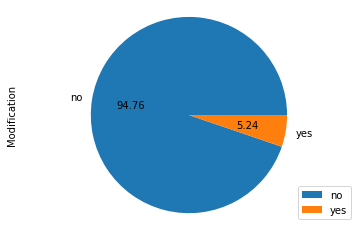

In [58]:
pro['Modification'].value_counts().plot(kind='pie',autopct='%.2f')
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()

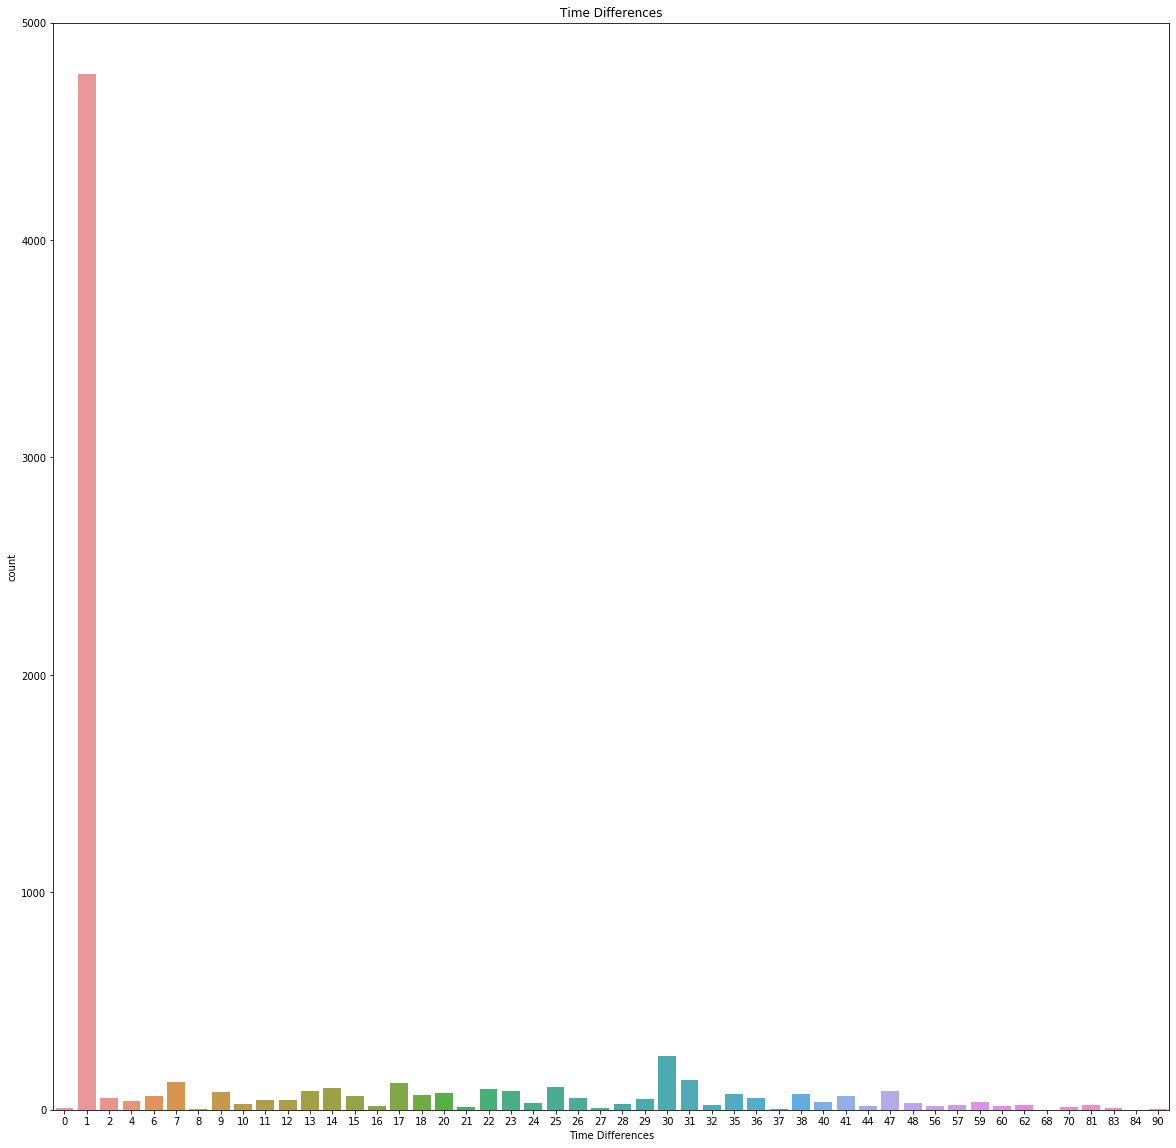

In [59]:
plt.figure(figsize = (20,20))
plt.title('Time Differences')
sns.countplot(x='Time Differences',data=pro)

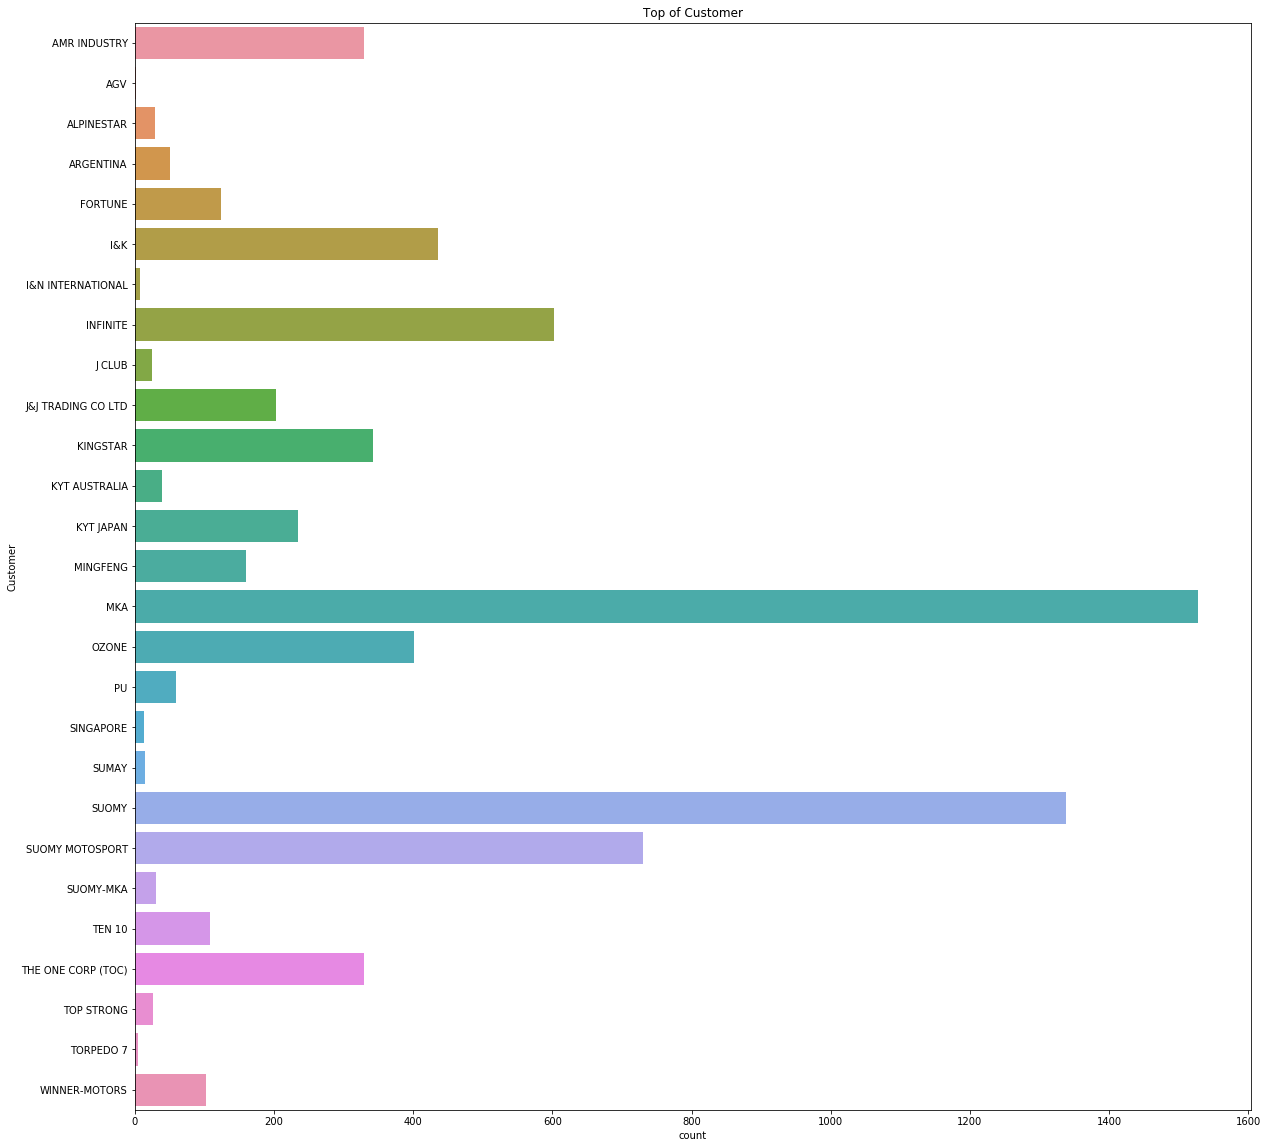

In [60]:
plt.figure(figsize=(20,20))
plt.title('Top of Customer')
sns.countplot(data = pro, y = 'Customer')

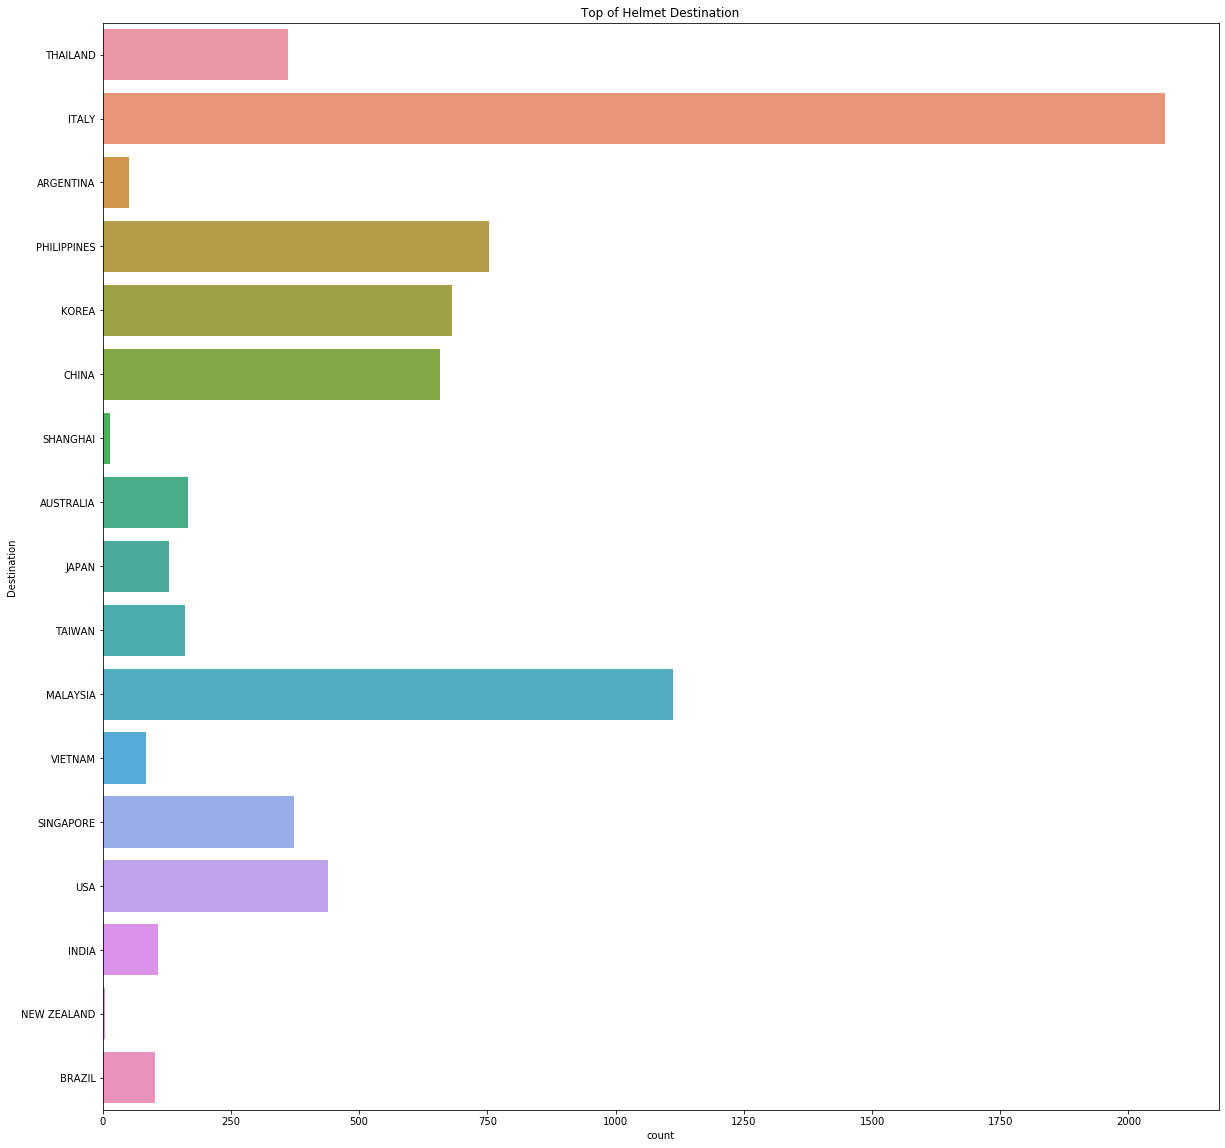

In [61]:
plt.figure(figsize=(20,20))
plt.title('Top of Helmet Destination')
sns.countplot(data = pro, y = 'Destination')

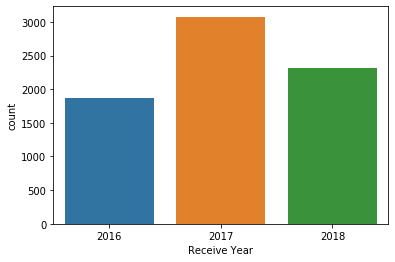

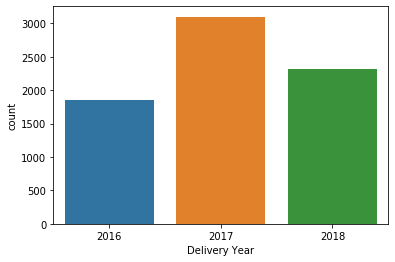

In [62]:
sns.countplot(data = pro, x = 'Receive Year')
plt.show()
sns.countplot(data = pro, x = 'Delivery Year')
plt.show()

In [63]:
pro

0           Customer Standard Destination POS Receive Date POS Delivery Date  \
0       AMR INDUSTRY      ECE    THAILAND       2016-03-30        2016-04-08   
1       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
2       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
3       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
4       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
...              ...      ...         ...              ...               ...   
10189  WINNER-MOTORS    E2205      BRAZIL       2018-02-27        2018-03-01   
10190  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10191  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10192  WINNER-MOTORS    E2205      BRAZIL       2018-10-02        2018-10-03   
10193  WINNER-MOTORS    E2205      BRAZIL       2018-02-27        2018-03-01   

0      Time Differences Model/Type Modification  XXS  XS (48)  XS/S  S(50)  \
0                     9     VANDAL           no    0        0     0      6   
1                     1       APEX           no    0        0     0      1   
2                     1       APEX           no    0        0     0      1   
3                     1      HELLO           no    0        0     0      2   
4                     1      HELLO           no    0        0     0      2   
...                 ...        ...          ...  ...      ...   ...    ...   
10189                 2   SR SPORT           no    0        0     0      2   
10190                 1   SR SPORT           no    0        0     0      4   
10191                 1   SR SPORT           no    0        0     0      2   
10192                 1   SR SPORT           no    0        0     0      4   
10193                 2   SR SPORT           no    0        0     0      0   

0      M(52)  L(54)  XL(56)  XXL  3XL  4XL  S/M  L/XL  Other  Total Helmet  \
0          8      4       0    0    0    0    0     0      0            18   
1          3      2       1    1    1    0    0     0      0             9   
2          3      2       1    1    1    0    0     0      0             9   
3          3      2       1    1    0    0    0     0      0             9   
4          3      2       1    1    0    0    0     0      0             9   
...      ...    ...     ...  ...  ...  ...  ...   ...    ...           ...   
10189      4      0       0    0    0    0    0     0      0             6   
10190      2      0       0    0    0    0    0     0      0             6   
10191      4      0       0    0    0    0    0     0      0             6   
10192      2      0       0    0    0    0    0     0      0             6   
10193      0      0       0    0    3    0    0     0      0             3   

0      Receive Year  Delivery Year  
0              2016           2016  
1              2016           2016  
2              2016           2016  
3              2016           2016  
4              2016           2016  
...             ...            ...  
10189          2018           2018  
10190          2018           2018  
10191          2018           2018  
10192          2018           2018  
10193          2018           2018  

[7270 rows x 24 columns]

In [64]:
pro.to_csv(r'C:\Users\krnjy\Documents\Final Project\helmetcsv.csv',index=False)

In [ ]:
select average (Time Differences),Customer from pro group by Customer